# 항공서비스 만족도 예측 모델
---------

- 배경   
타 항공사에 비해 급감하는 수요에 대한 원인분석을 통하여 해결책 마련   
- 목적   
현재 가지고 있는 Data를 기반으로, 고객만족도에 영향을 미치는 요소들을 분석하고,   
만족도 상승을 위하여 어떤 요소를 개선/발전시켜 나갈 지 결정   
- 방법   
XGBoost (XGBClassifier 사용)   
현재 자료에 만족도 및 고객의 기본정보를 이용하여 만족/불만족을 예측하는 모델을 생성   
- 평가   
최적의 Model을 이용하여 만족 여부 판별   
Accuracy, Roc/Auc, F1-Score 등을 이용하여 판별   
- 결론   
일반적으로 고객의 만족도를 올리기 위하여 어떤 부분을 개선/발전 시켜야 할까  
특정 고객의 만족도를 올리기 위하여 어떤 제안을 하면 좋을까   

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

### *Data 확인*

- 데이터의 Column 종류 확인

>**id**: 해당 정보의 ID   
>**Gender**: 고객의 성별 정보 (Male / Female)   
>**Customer Type**: 고객 등급 (Loyal Customer / disloyal Customer)   
>**Age**: 고객의 나이   
>**Type of Travel**: 여행의 종류 (Personal Travel / Business travel)   
>**Class**: 탑승 좌석의 등급 (Business, Eco-Plus, Eco)   
>**Flight Distance**: 비행거리 (단위 Km)   
>**Inflight wifi service**: 객실 내 WiFi 서비스 만족도 (0 / 1 / 2 / 3 / 4 / 5)   
>**Departure/Arrival time convenient**: 출/도착 시간의 편의성 (0 / 1 / 2 / 3 / 4 / 5)   
>**Ease of Online booking**: Online Booking의 편의성 (0 / 1 / 2 / 3 / 4 / 5)   
>**Gate location**: 탑승 Gate 위치 (0 / 1 / 2 / 3 / 4 / 5)   
>**Food and drink**: 기내식 만족도 (0 / 1 / 2 / 3 / 4 / 5)   
>**Online boarding**: Online 탑승수속 편의성 (0 / 1 / 2 / 3 / 4 / 5)   
>**Seat comfort**: 좌석의 편안함 (0 / 1 / 2 / 3 / 4 / 5)   
>**Inflight entertainment**: 기내 Entertainment 서비스 만족도 (0 / 1 / 2 / 3 / 4 / 5)   
>**On-board service**: 탑승수속 서비스 만족도 (0 / 1 / 2 / 3 / 4 / 5)   
>**Leg room service**: 비상구 또는 맨 앞좌석 같이 여유가 있는 좌석 할당 (0 / 1 / 2 / 3 / 4 / 5)   
>**Baggage handling**: 수하물 처리 만족도 (0 / 1 / 2 / 3 / 4 / 5)   
>**Checkin service**: Checkin 서비스 만족도 (0 / 1 / 2 / 3 / 4 / 5)   
>**Inflight service**: 객실 내 서비스 만족도 (0 / 1 / 2 / 3 / 4 / 5)   
>**Cleanliness**: 객실 내 청결도 (0 / 1 / 2 / 3 / 4 / 5)   
>**Departure Delay in Minutes**: 출발 지연시간 (단위 Min)   
>**Arrival Delay in Minutes**: 도착 지연시간 (단위 Min)   
>**satisfaction**: 만족도 (neutral or dissatisfied / satisfied) -> **Target**으로 선택   

In [2]:
# Data 불러오기

import pandas as pd

df_train = pd.read_csv('flight_satisfaction_train.csv', index_col=0)
df_test = pd.read_csv('flight_satisfaction_test.csv', index_col=0)

In [3]:
df_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
# Train Set 확인

df_train.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [5]:
# Test Set 확인

df_test.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [6]:
# Train Set / Test Set Column Match 확인

print(set(df_train.columns) - set(df_test.columns))
print(set(df_test.columns) - set(df_train.columns))

set()
set()


In [7]:
# Train Data Set Info 확인 -> 'Arrival Delay in Minutes' 결측치 확인 됨

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [8]:
# Test Data Set Info 확인 -> 'Arrival Delay in Minutes' 결측치 확인 됨

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

- Train Set / Test Set의 결측치는 평균값으로 채우기로 결정

In [9]:
# Train Data 중 결측치 비율 확인 (Arrival Delay in Minutes)

(df_train['Arrival Delay in Minutes'].isna().sum() * 100) / len(df_train)

0.29835232522328303

In [10]:
df_train['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [11]:
# Test Data 중 결측치 비율 확인 (Arrival Delay in Minutes)

(df_test['Arrival Delay in Minutes'].isna().sum() * 100) / len(df_test)

0.31952571604558055

In [12]:
df_test['Arrival Delay in Minutes'].describe()

count    25893.000000
mean        14.740857
std         37.517539
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64

- Categorical Data 확인

In [13]:
# Gender Column 확인

df_train.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [14]:
# Customer Type Column 확인

df_train['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [15]:
# Type of Travel Column 확인

df_train['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [16]:
# Class Column 확인

df_train.Class.value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [17]:
# satisfaction Column 확인

df_train.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

#### 항공사에 의해 변경/개선할 수 있는 항목과 그렇지 항목으로 나눠 볼 수 있다.


- 항공사에 의해 변경/개선할 수 있는 항목   
 - Customer Type: Loyal Customer / disloyal Customer (순서의 의미가 있는  항목)   
 - Class: Business / Eco Plus / Eco (순서의 의미가 있는  항목)   
 - Inflight wifi service: 5 / 4 / 3 / 2 / 1 / 0   
 - Food and drink: 5 / 4 / 3 / 2 / 1 / 0   
 - Online boarding: 5 / 4 / 3 / 2 / 1 / 0   
 - Seat comfort: 5 / 4 / 3 / 2 / 1 / 0   
 - Inflight entertainment: 5 / 4 / 3 / 2 / 1 / 0   
 - On-board service: 5 / 4 / 3 / 2 / 1 / 0   
 - Leg room service: 5 / 4 / 3 / 2 / 1 / 0    
 - Baggage handling: 5 / 4 / 3 / 2 / 1 / 0   
 - Checkin service: 5 / 4 / 3 / 2 / 1 / 0   
 - Inflight service: 5 / 4 / 3 / 2 / 1 / 0   
 - Cleanliness: 5 / 4 / 3 / 2 / 1 / 0   


- 항공사가 변경/개선할 수 없는 항목   
 - id   
 - Gender: Male, Female (순서의 의미가 없는  항목)   
 - Age   
 - Type of Travel: Business travel / Personal Travel (순서의 의미가 없는  항목)   
 - Flight Distance   
 - Departure/Arrival time convenient: 5 / 4 / 3 / 2 / 1 / 0   
 - Gate location: 5 / 4 / 3 / 2 / 1 / 0   
 - Departure Delay in Minutes   
 - Arrival Delay in Minutes   


- Target 항목   
 - satisfaction: neutral or dissatisfied / satisfied

#### *- 결측치: Arrival Delay in Minutes: 평균값으로 채워 넣음*
#### *- Column 이름 정리*
#### *- id 항목 제거*
#### *- Column Encoding*
#### *- Target(satistacion) 값 변경*

In [18]:
def clean_encode_data(df):
    
    # Column 이름의 '빈칸'을 '_'로 변경
    df.columns = [c.replace(' ', '_') for c in df.columns]
    
    # 결측치 Arrival Delay in Minutes 평균값으로 채워 넣음
    df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())
    
    # id 항목 제거
    df = df.drop(columns='id')
    
    # satisfaction 값 변경
    df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
    
    return df

In [19]:
df_train = clean_encode_data(df_train)
df_test = clean_encode_data(df_test)

In [20]:
df_train['satisfaction'].value_counts()[0] / len(df_train)

0.5666673082845703

## *2. Target의 Imbalance 확인*

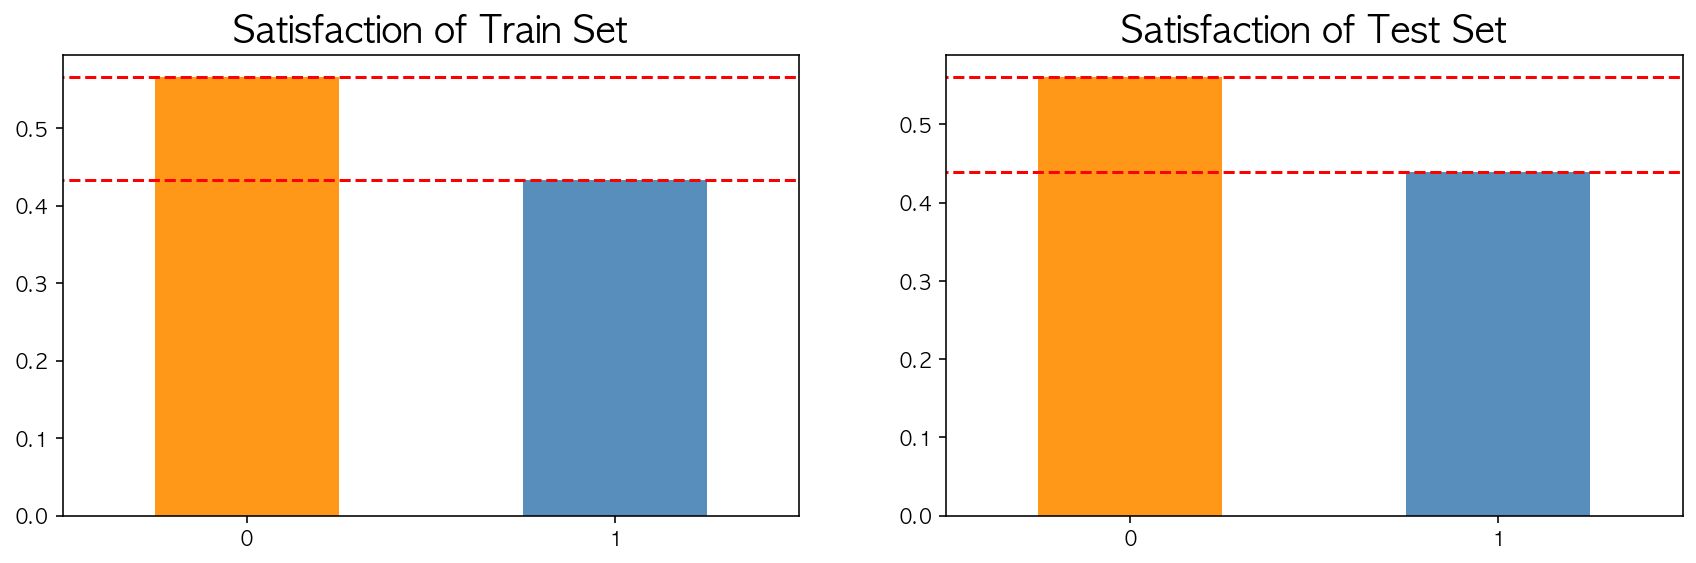

In [21]:
# Target의 Imbalance 확인

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

train_y1 = df_train['satisfaction'].value_counts()[0] / len(df_train)
train_y2 = df_train['satisfaction'].value_counts()[1] / len(df_train)

plt.subplot(1, 2, 1)
df_train['satisfaction'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.hlines(train_y1, -1, 2, colors='Red', linestyles='--')
plt.hlines(train_y2, -1, 2, colors='Red', linestyles='--')
plt.title('Satisfaction of Train Set', fontsize=18, fontweight='bold')


test_y1 = df_test['satisfaction'].value_counts()[0] / len(df_test)
test_y2 = df_test['satisfaction'].value_counts()[1] / len(df_test)

plt.subplot(1, 2, 2)
df_test['satisfaction'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.hlines(test_y1, -1, 2, colors='Red', linestyles='--')
plt.hlines(test_y2, -1, 2, colors='Red', linestyles='--')
plt.title('Satisfaction of Test Set', fontsize=18, fontweight='bold')


plt.subplots_adjust(left=0.125, bottom=0.1,  right=2.0, top=0.9, wspace=0.2, hspace=0.35)


plt.show()

In [22]:
import numpy as np

print('\t     Train Set')
print('-' * 22)
print(f'불만족\t|      {np.round(train_y1, 2)}%')
print(f'만족\t|      {np.round(train_y2, 2)}%')

	     Train Set
----------------------
불만족	|      0.57%
만족	|      0.43%


In [23]:
print('\t     Test Set')
print('-' * 21)
print(f'불만족\t|      {np.round(test_y1, 2)}%')
print(f'만족\t|      {np.round(test_y2, 2)}%')

	     Test Set
---------------------
불만족	|      0.56%
만족	|      0.44%


### *3. Feature와 Target의 상관관계 시각화*

- 성별 만족도 비율은 Target의 비율과 비슷
</br></br>
- 성별 비율은 거의 비슷한 수치로 확인
</br></br>
- Personal Travel과 Business Travel의 만족도 비율이 극명하게 차이가 남   
- Class와의 상관관계를 통해, Business Travel일 경우 Business Class를 탈 확률이 커지므로,   
  Class 영향을 받은 것으로 보임
</br></br>
- 등급이 높을 수록 만족도가 조금 더 높은 현상을 보임   
- 등급이 낮을 경우 만족 비율이 낮음
- Target과의 비율 차이는 있지만, 아주 크지 않고 경향성은 같음을 확인
</br></br>
- Class에 비례하여 만족도가 크게 상승

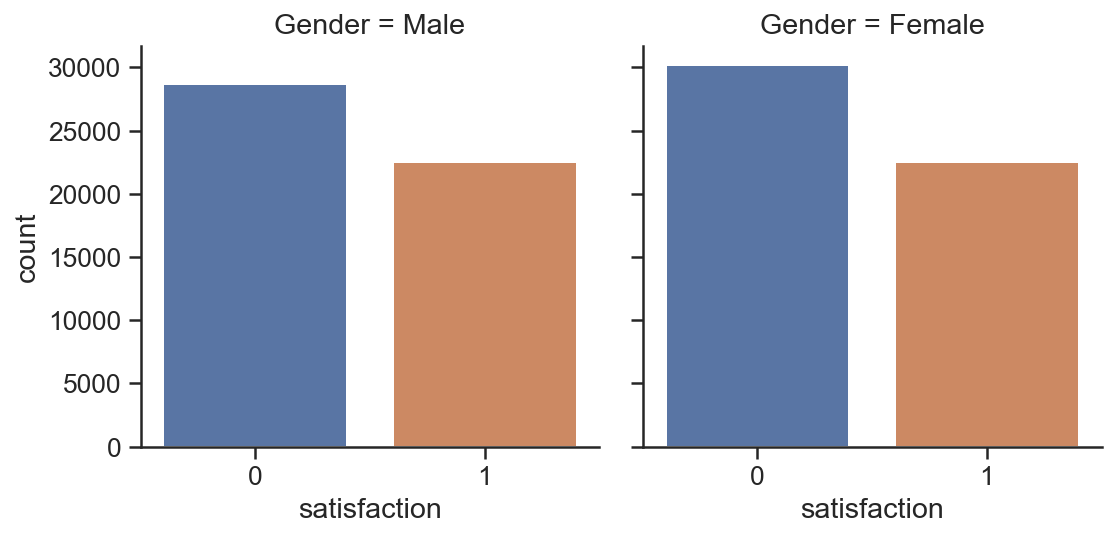

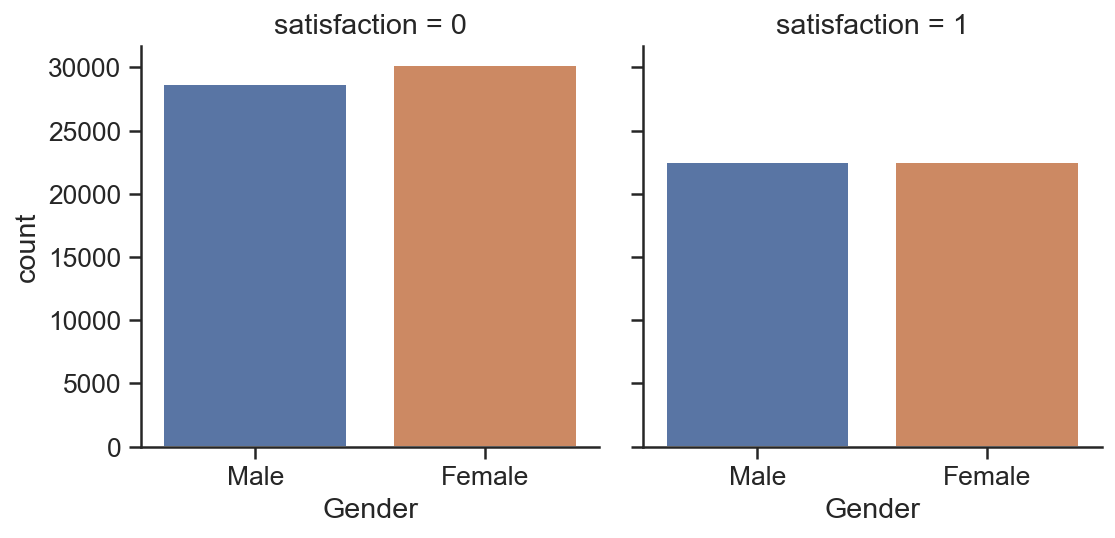

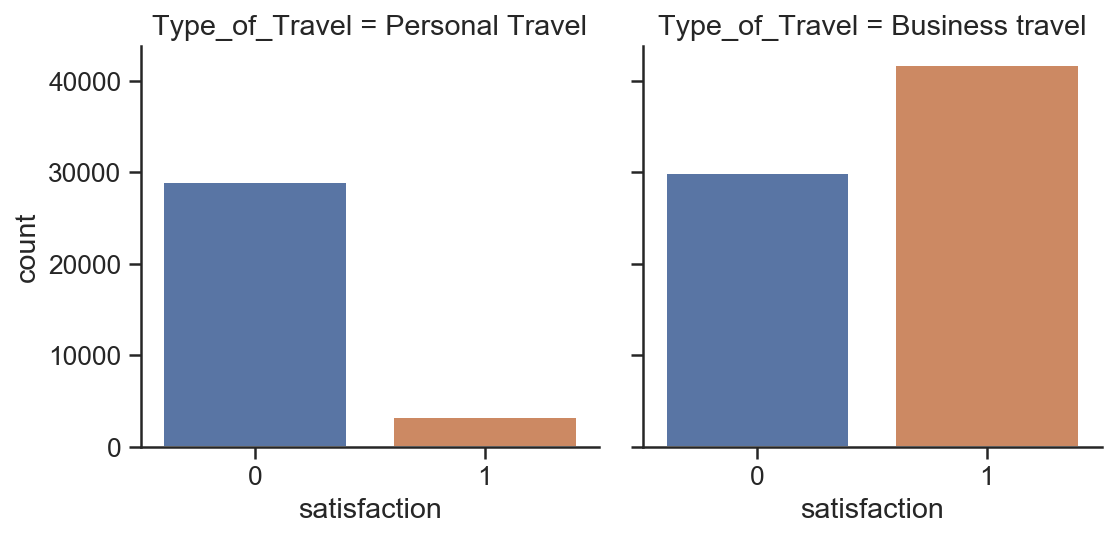

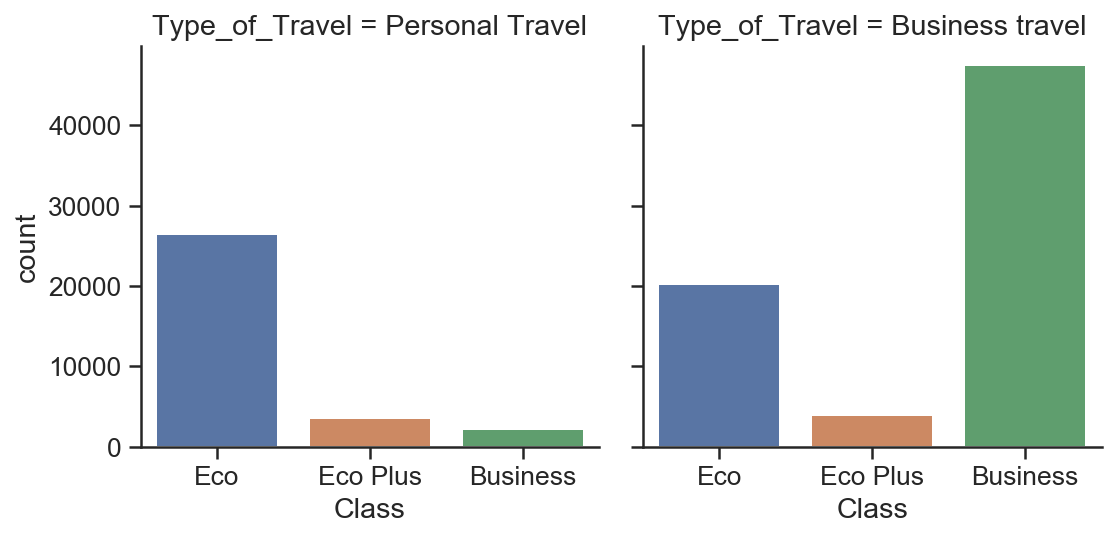

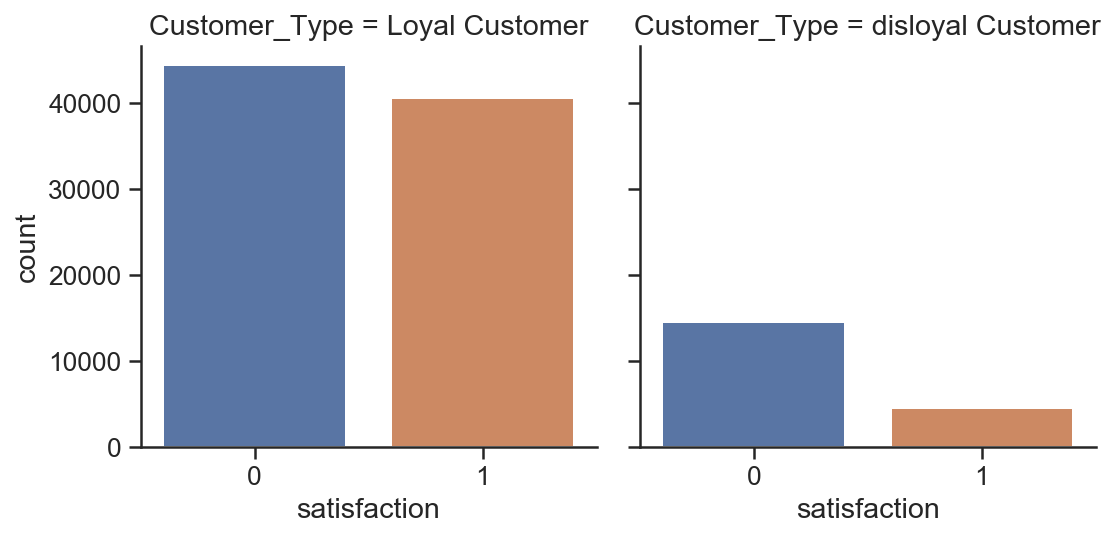

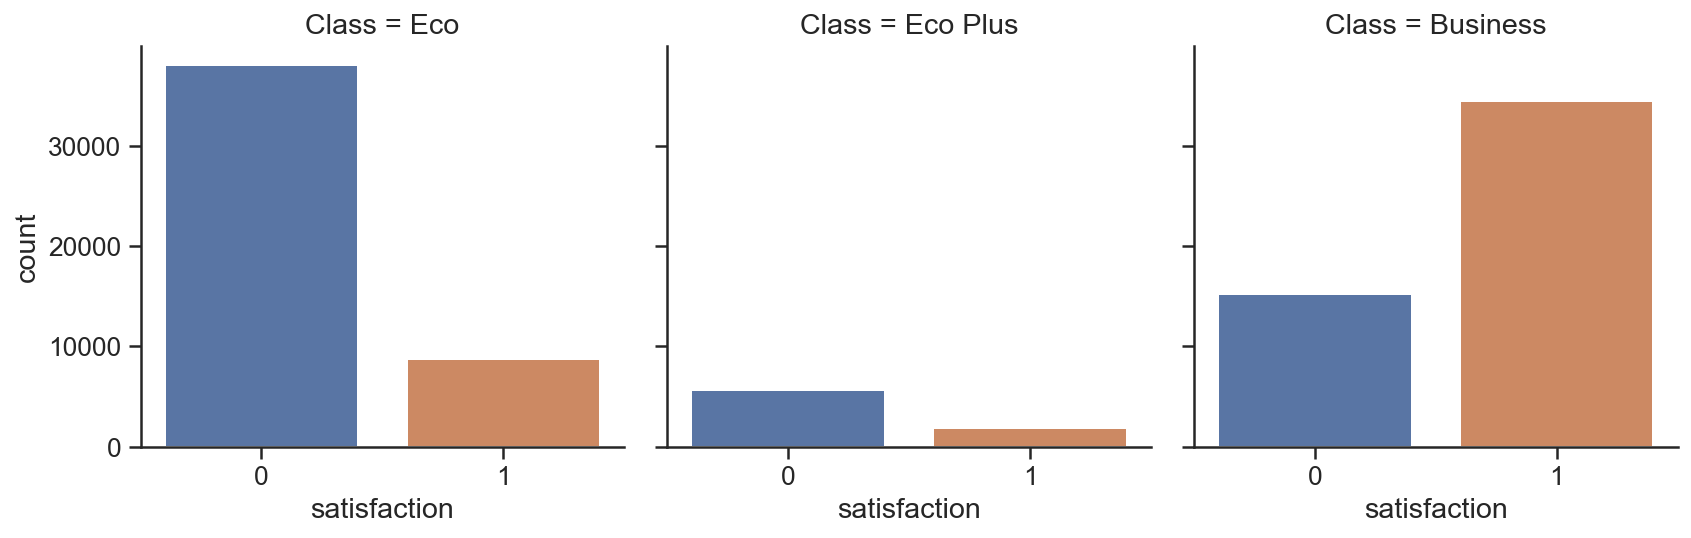

In [24]:
import seaborn as sns

sns.set(font_scale=1.2)

with sns.axes_style(style='ticks'):
    
    # Gender와 satisfaction의 상관관계
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.0)  
    g = sns.catplot("Gender", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.0)      
    
    # Type_of_Travel과 satisfaction의 상관관계
    g = sns.catplot("satisfaction", col="Type_of_Travel", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.0)
    g = sns.catplot("Class", col="Type_of_Travel", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.0, order = ['Eco', 'Eco Plus', 'Business'])    

    # Customer_Type과 satisfaction의 상관관계
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.0)
#     g = sns.catplot("Customer_Type", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.0)

    # Class와 satisfaction의 상관관계
    g = sns.catplot("satisfaction", col="Class", col_wrap=3, data=df_train, kind="count", height=4, aspect=1.0, col_order = ['Eco', 'Eco Plus', 'Business'])

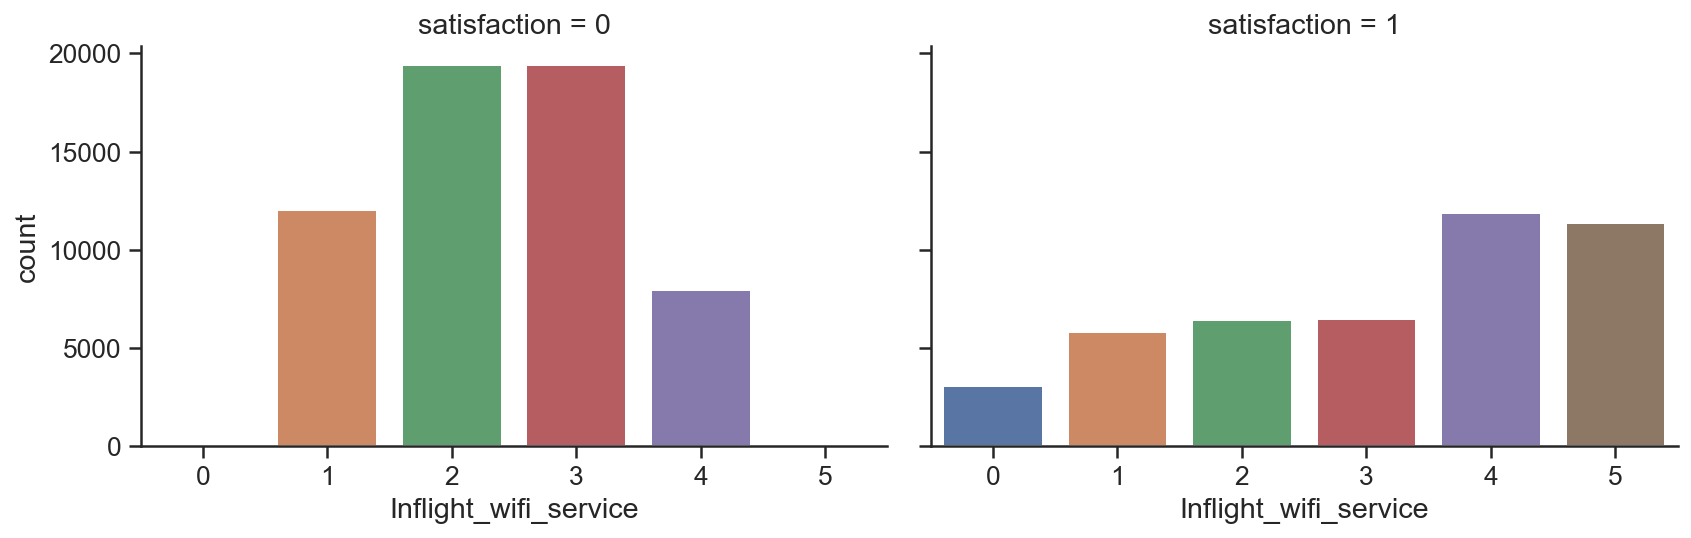

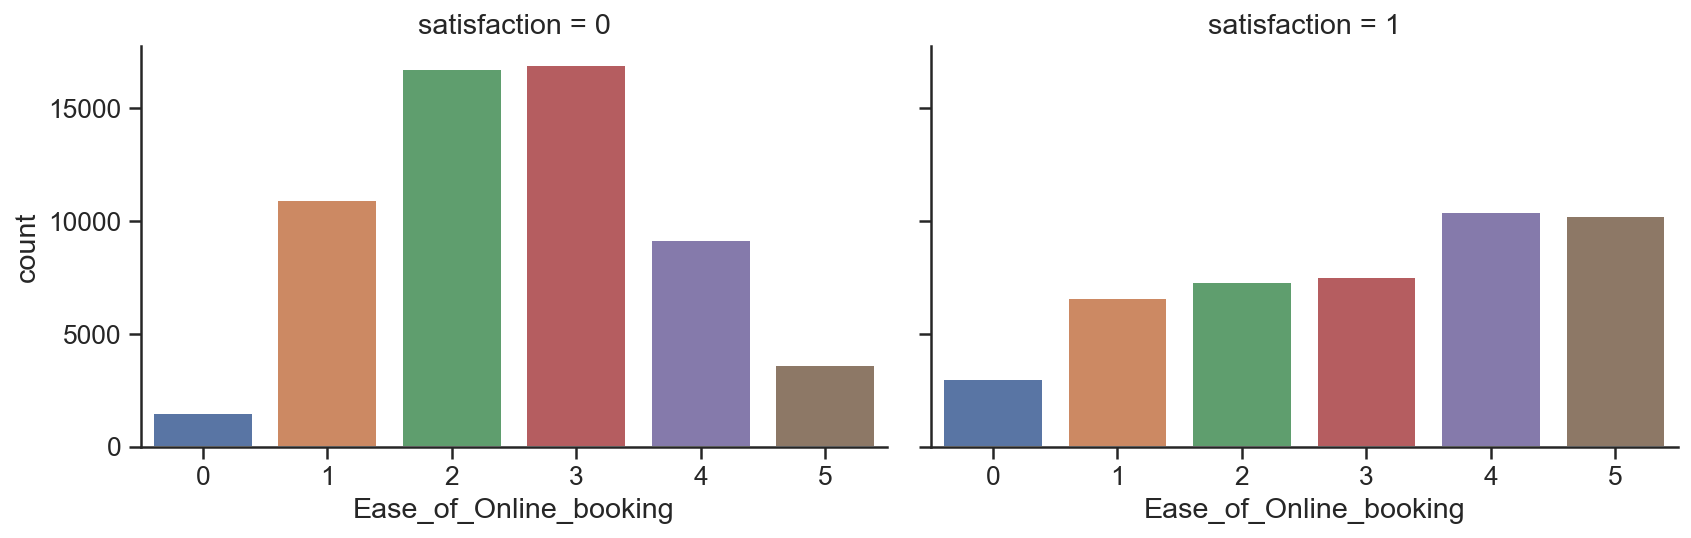

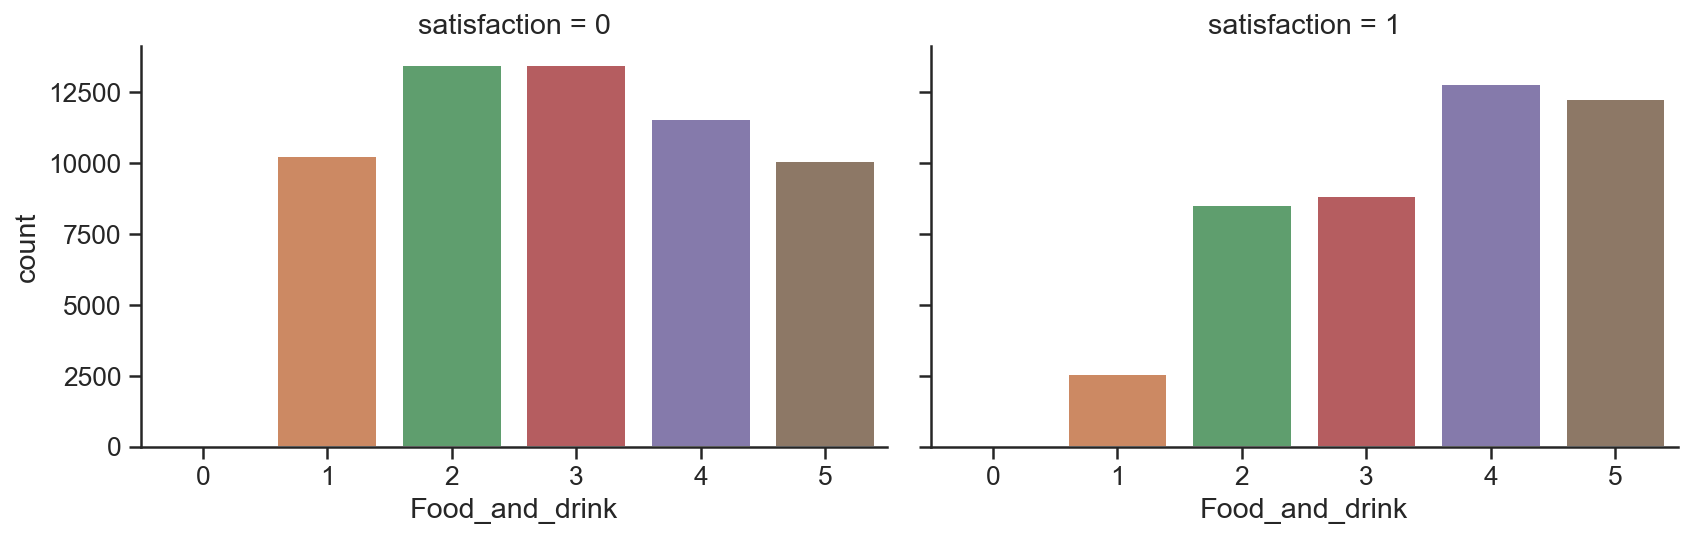

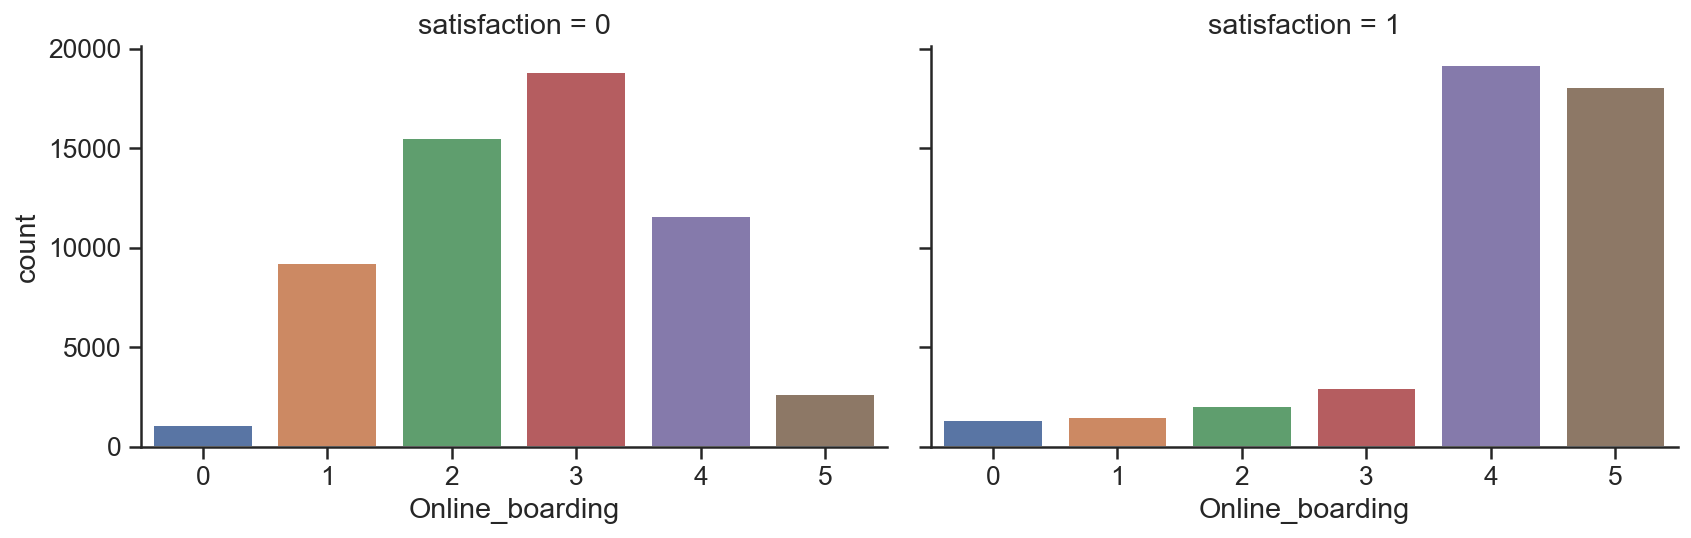

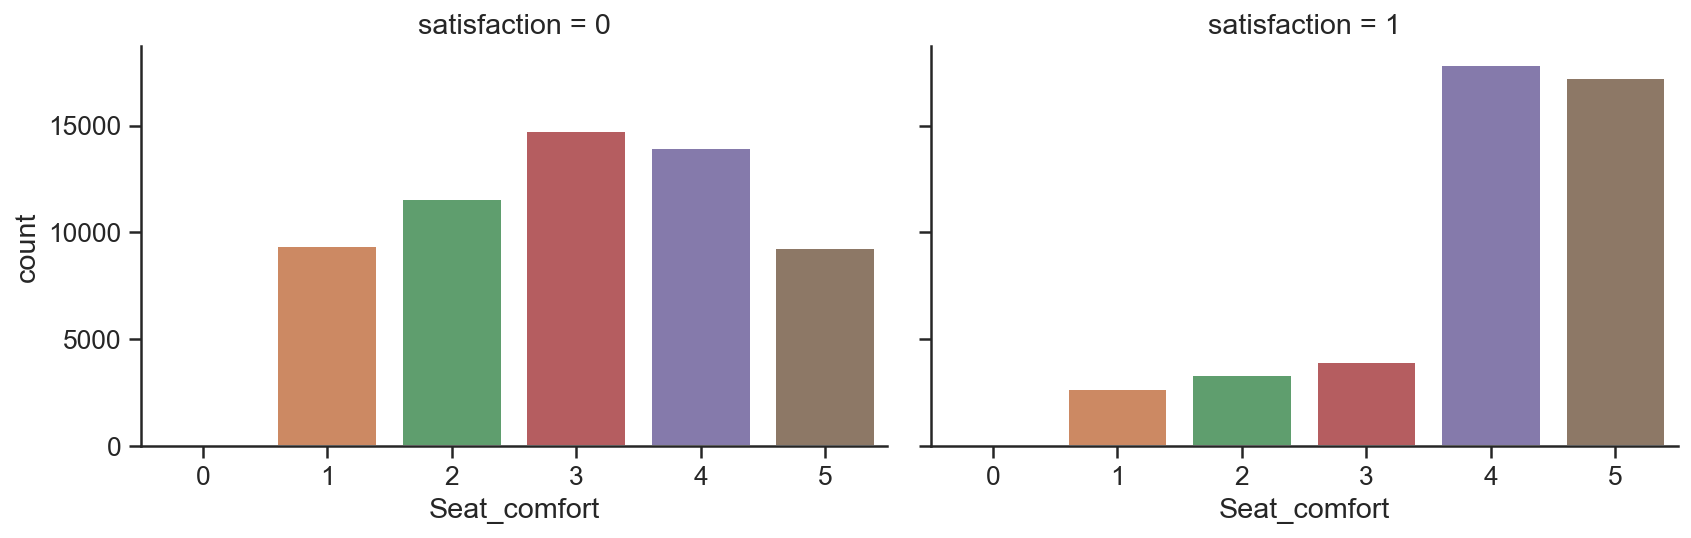

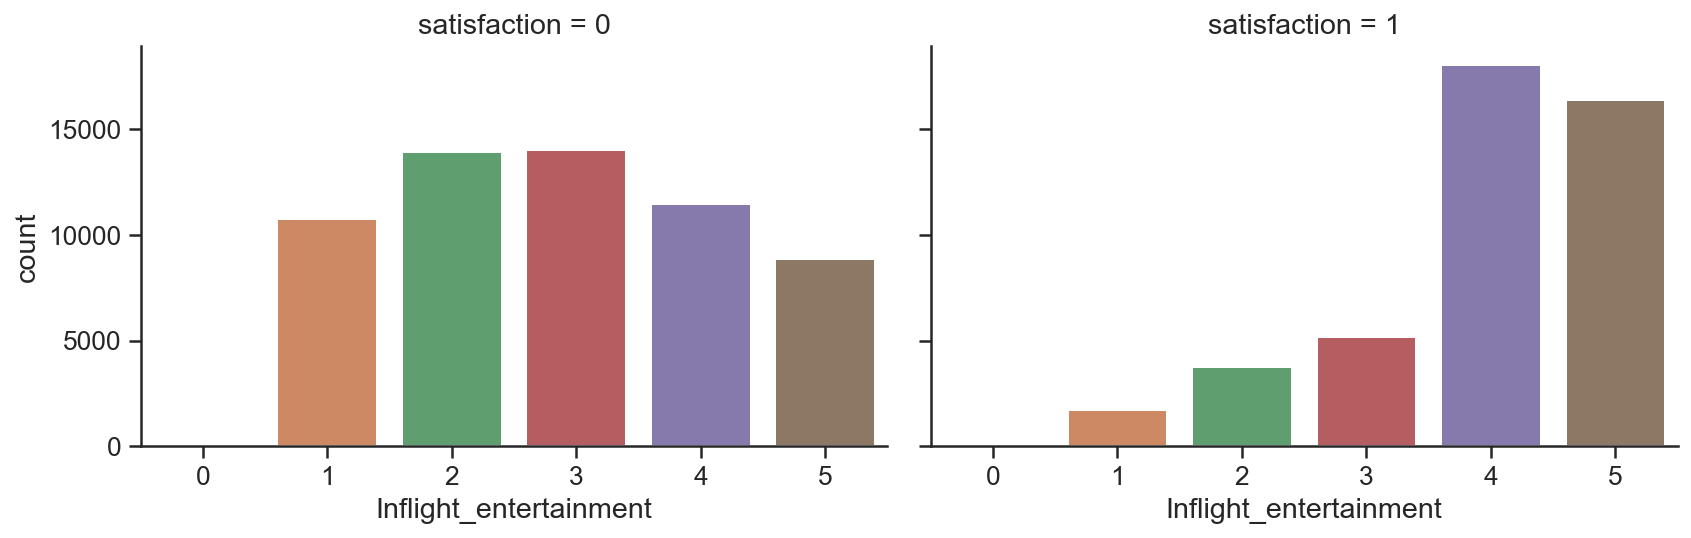

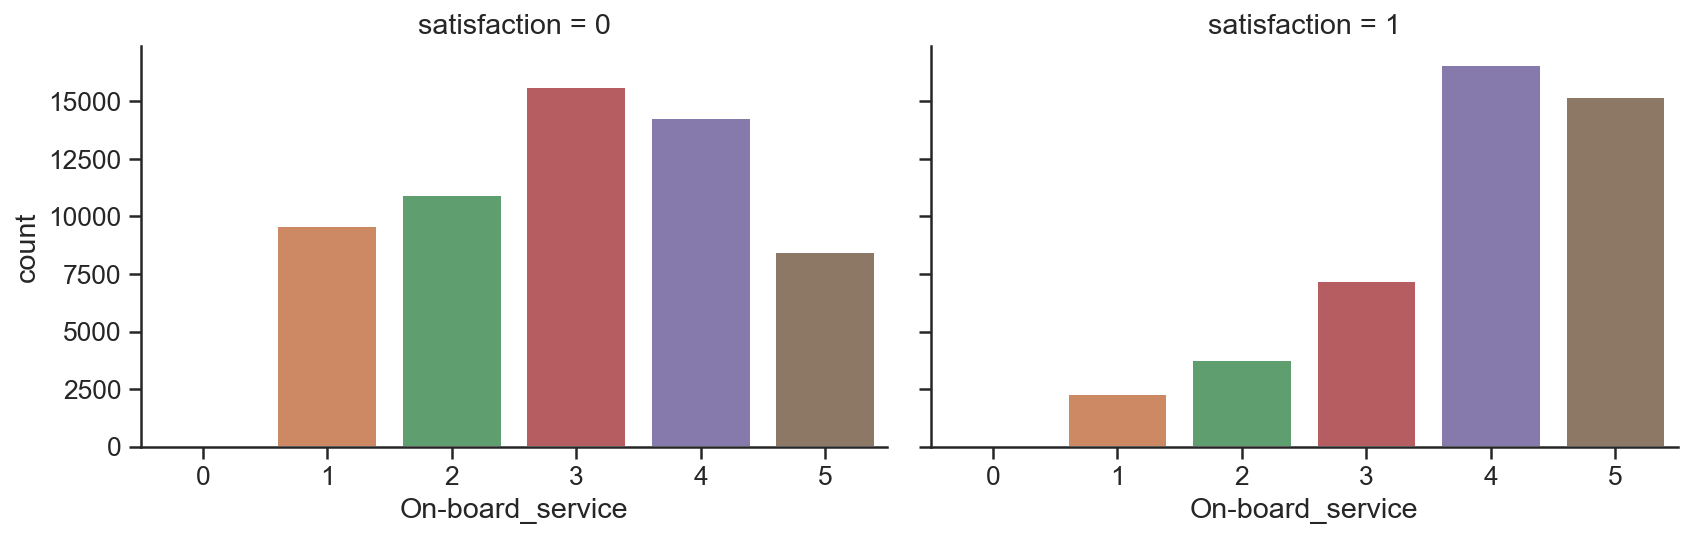

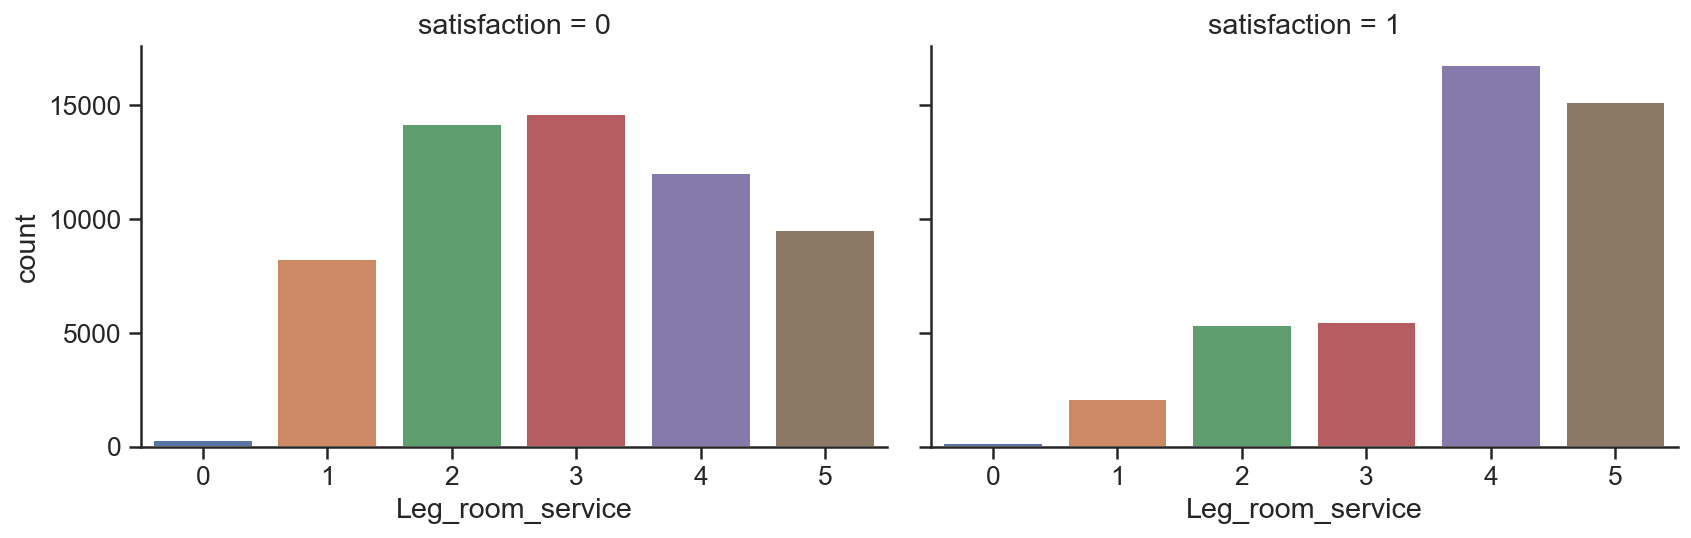

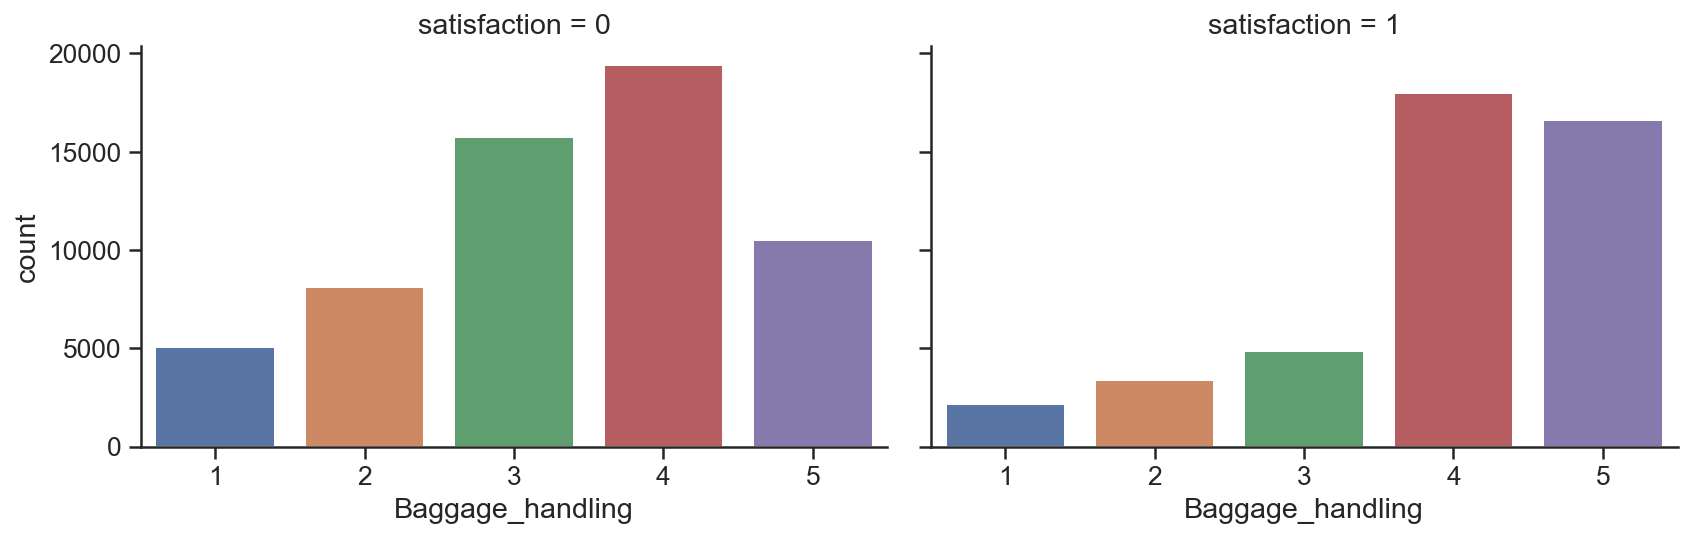

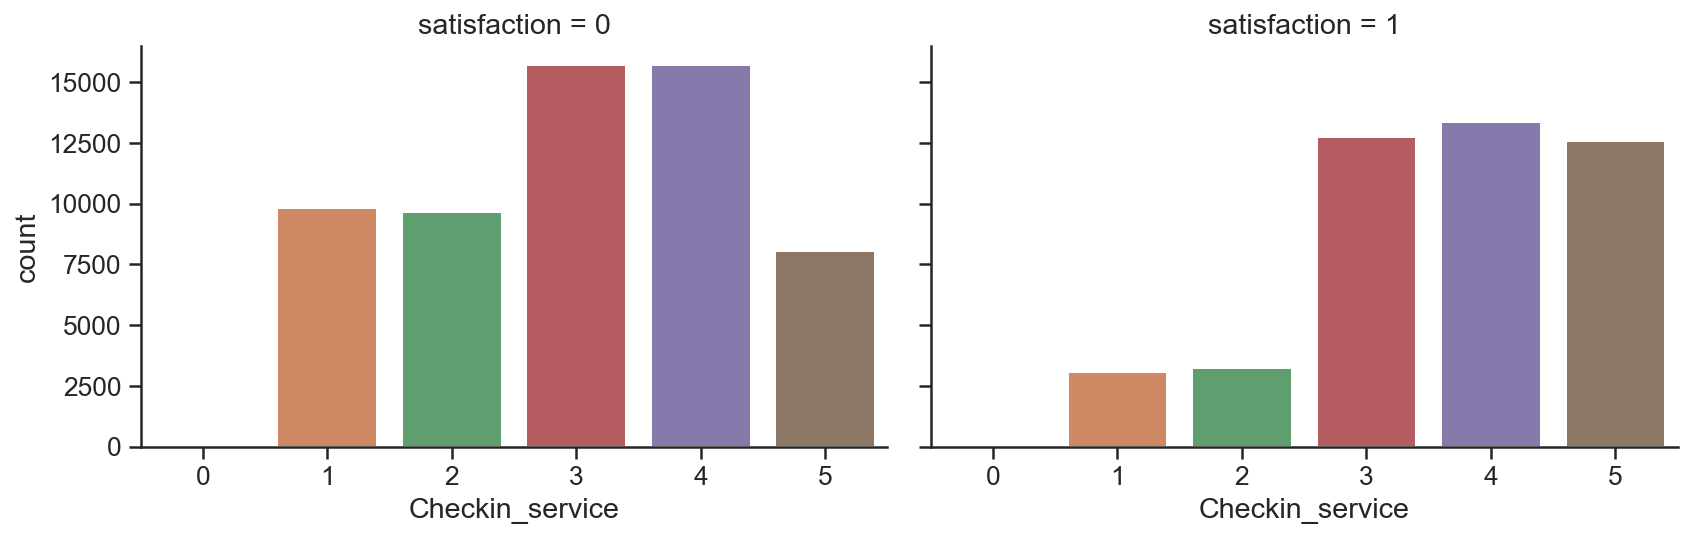

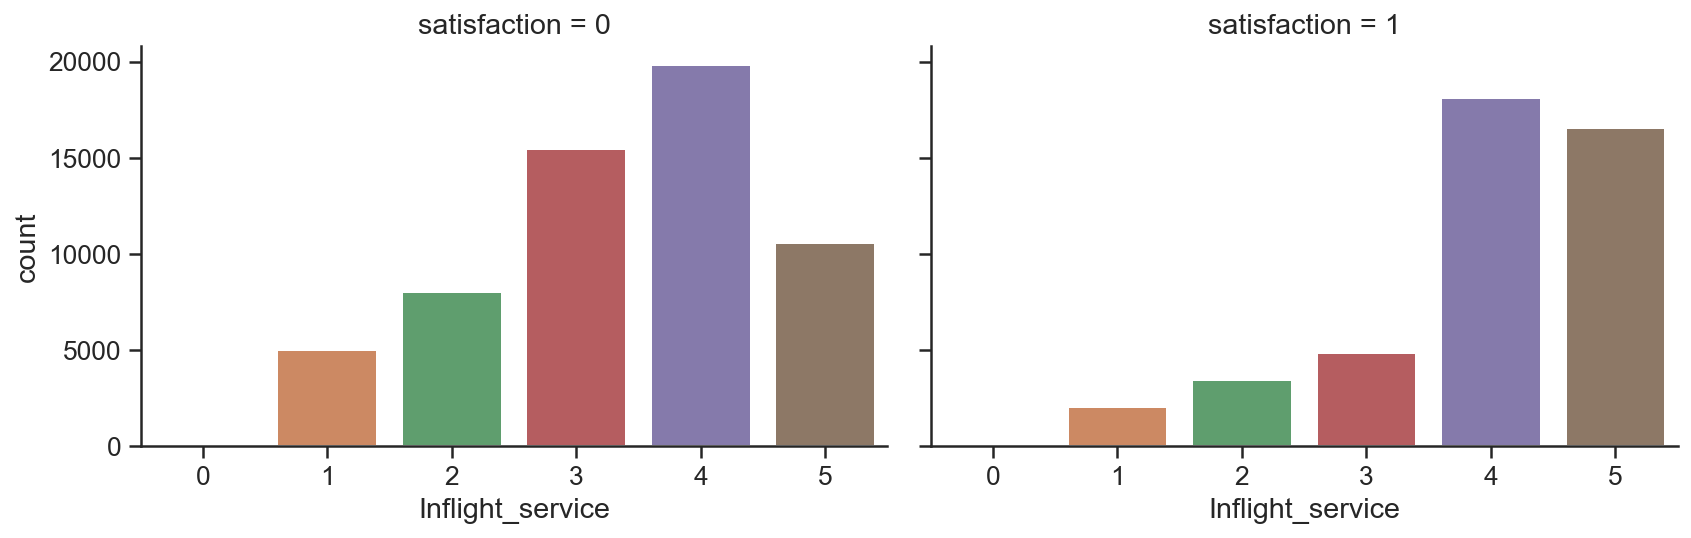

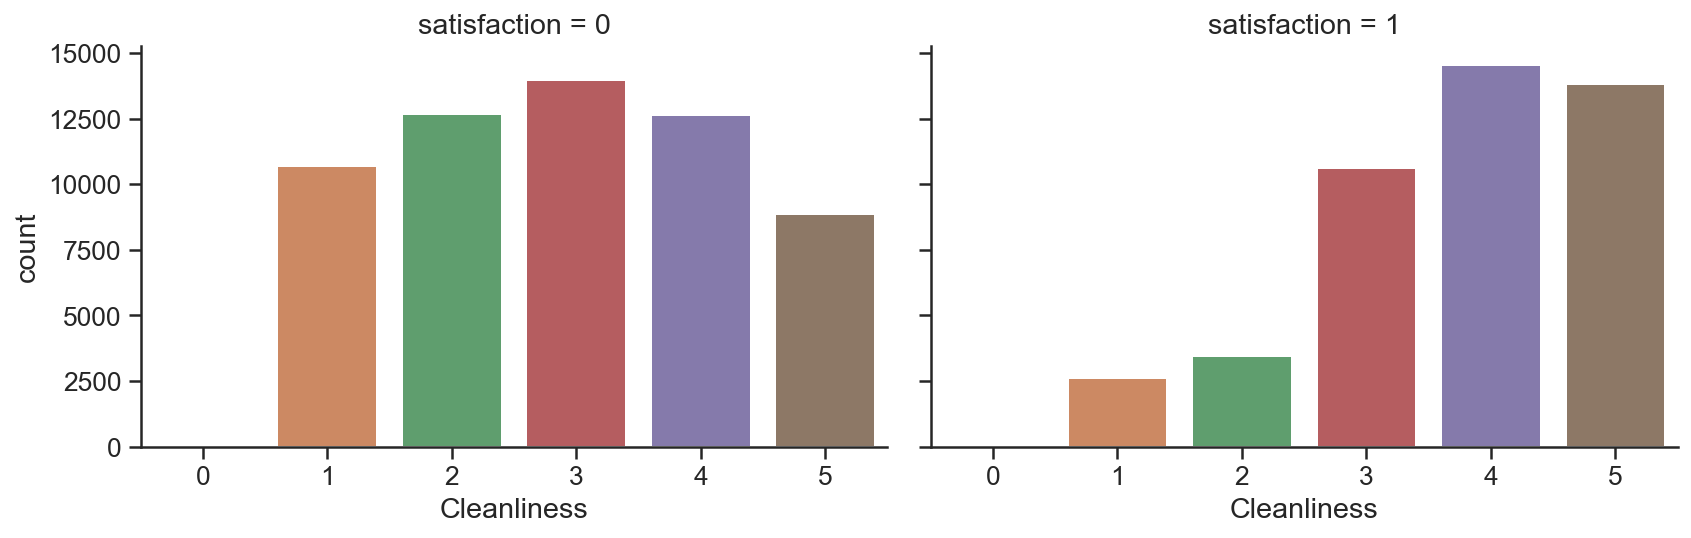

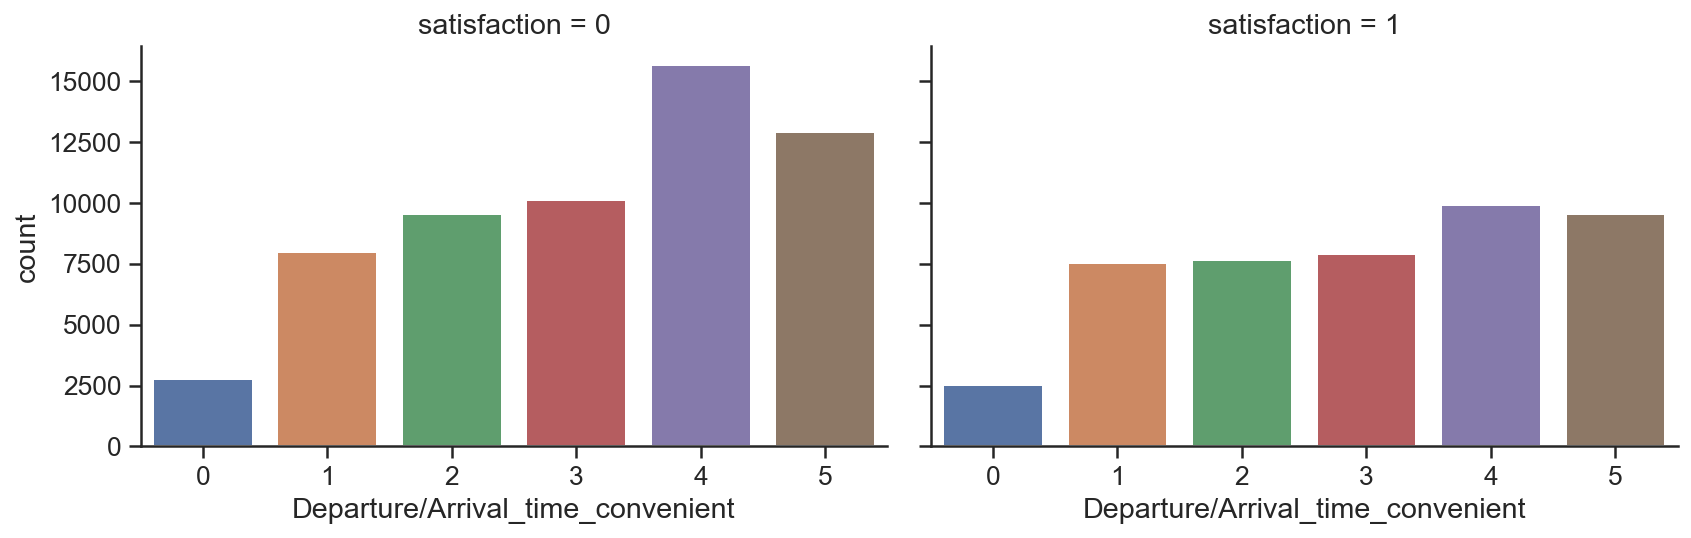

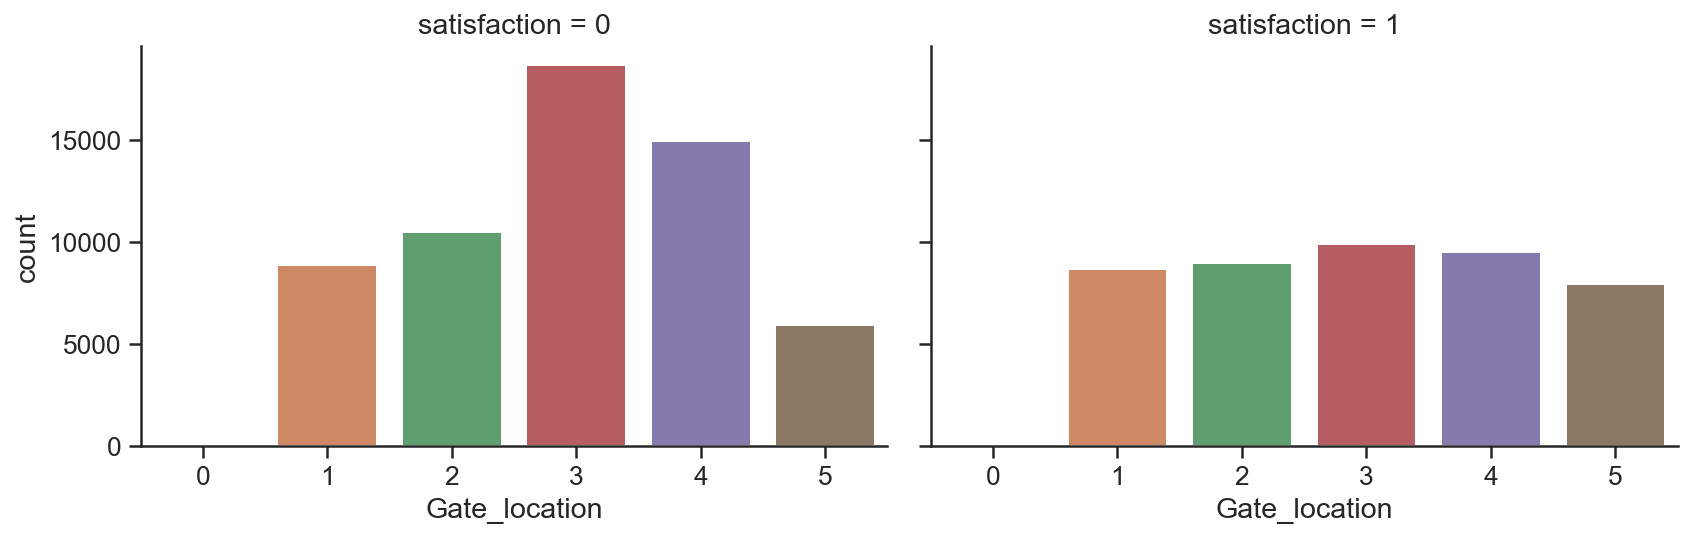

In [25]:
sns.set(font_scale=1.2)

with sns.axes_style(style='ticks'):
    g = sns.catplot("Inflight_wifi_service", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Ease_of_Online_booking", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Food_and_drink", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Online_boarding", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Seat_comfort", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Inflight_entertainment", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("On-board_service", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Leg_room_service", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Baggage_handling", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Checkin_service", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Inflight_service", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Cleanliness", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)
    g = sns.catplot("Departure/Arrival_time_convenient", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)    
    g = sns.catplot("Gate_location", col="satisfaction", col_wrap=2, data=df_train, kind="count", height=4, aspect=1.5)        
    

[Text(0, 0.5, '')]

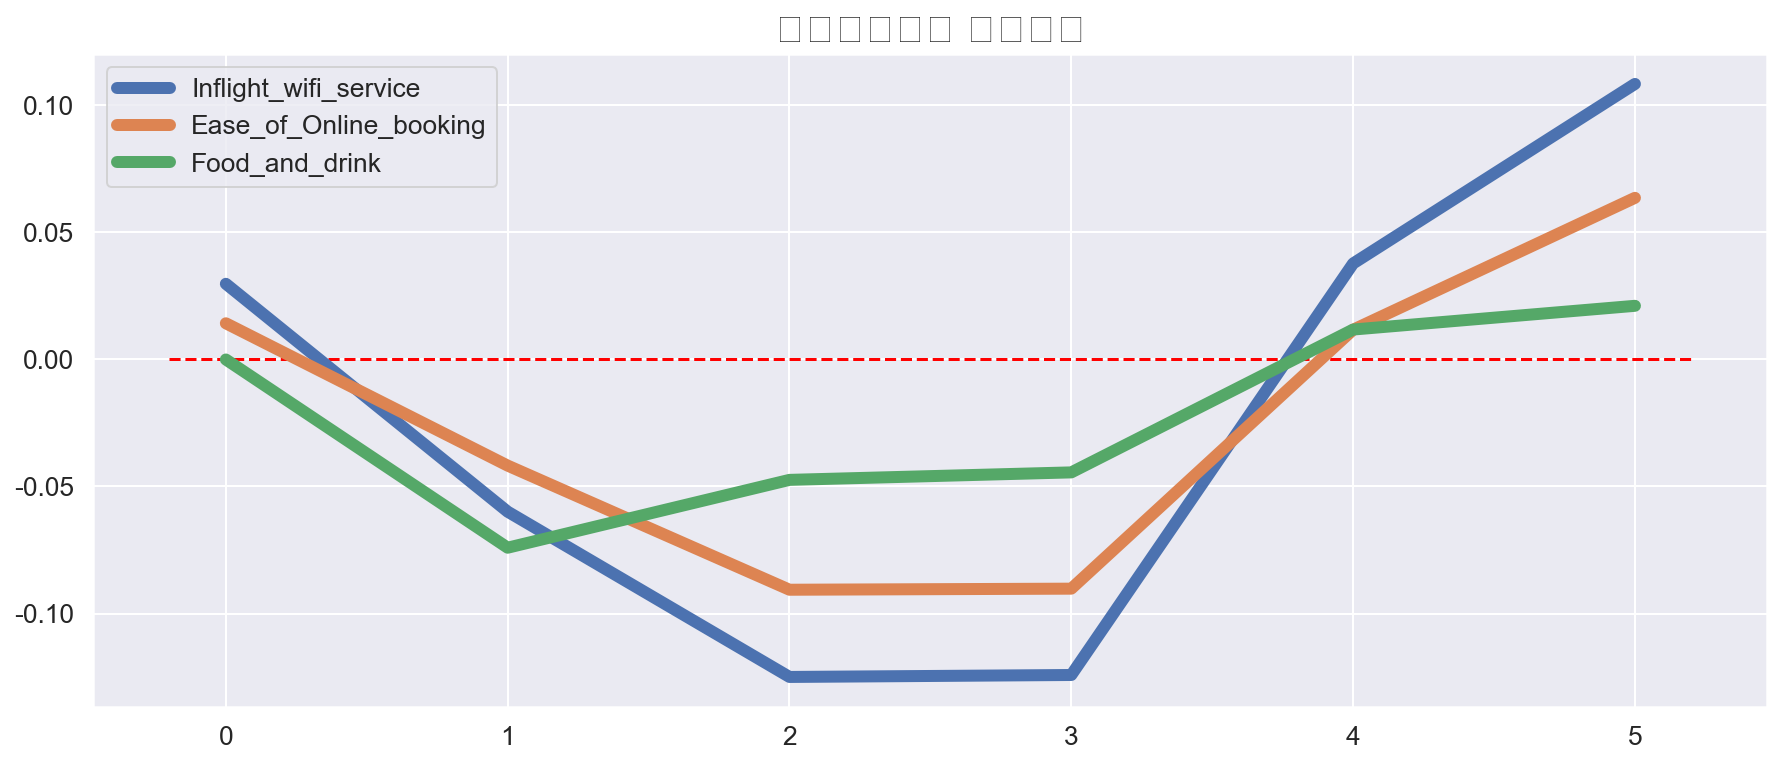

In [26]:
# Inflight_wifi_service, Ease_of_Online_booking, Food_and_drink의 Line plot


plt.rcParams['axes.unicode_minus'] = False

f0 = df_train.satisfaction == 0
f1 = df_train.satisfaction == 1
total = len(df_train)

iws = []
iws0 = df_train[f0]['Inflight_wifi_service'].value_counts().sort_values()
iws1 = df_train[f1]['Inflight_wifi_service'].value_counts().sort_values()
iws = (iws1 - iws0) / total

eob = []
eob0 = df_train[f0]['Ease_of_Online_booking'].value_counts().sort_values()
eob1 = df_train[f1]['Ease_of_Online_booking'].value_counts().sort_values()
eob = (eob1 - eob0) / total

fad = []
fad0 = df_train[f0]['Food_and_drink'].value_counts().sort_values()
fad1 = df_train[f1]['Food_and_drink'].value_counts().sort_values()
fad = (fad1 - fad0) / total

# df_iws = pd.DataFrame(iws
df_iws = pd.DataFrame(iws).reset_index(drop=True)
df_eob = pd.DataFrame(eob).reset_index(drop=True)
df_fad = pd.DataFrame(fad).reset_index(drop=True)

df_all = pd.concat([df_iws, df_eob, df_fad], axis=1)

plt.figure(figsize=(15,6))

plt.hlines(0, -0.2, 5.2, colors='Red', linestyles='--')

g = sns.lineplot(x=df_all.index.values, y='Inflight_wifi_service', linewidth=6, label='Inflight_wifi_service', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Ease_of_Online_booking', linewidth=6, label='Ease_of_Online_booking', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Food_and_drink', linewidth=6, label='Food_and_drink', data=df_all)

plt.title("만족도등급별 만족비율", fontsize=20, fontweight='bold')

g.set(ylabel=None)


- 만족도 0 ~ 2: 만족도 감소하는 경향을 보임 
- 만족도 2 ~ 5: 만족도 증가하는 경향을 보임
- 추정: 만족도를 아주 낮게(0, 1)을 주는 경우는 해당 서비스에 관심이 없는 승객일 수 있다.

[Text(0, 0.5, '')]

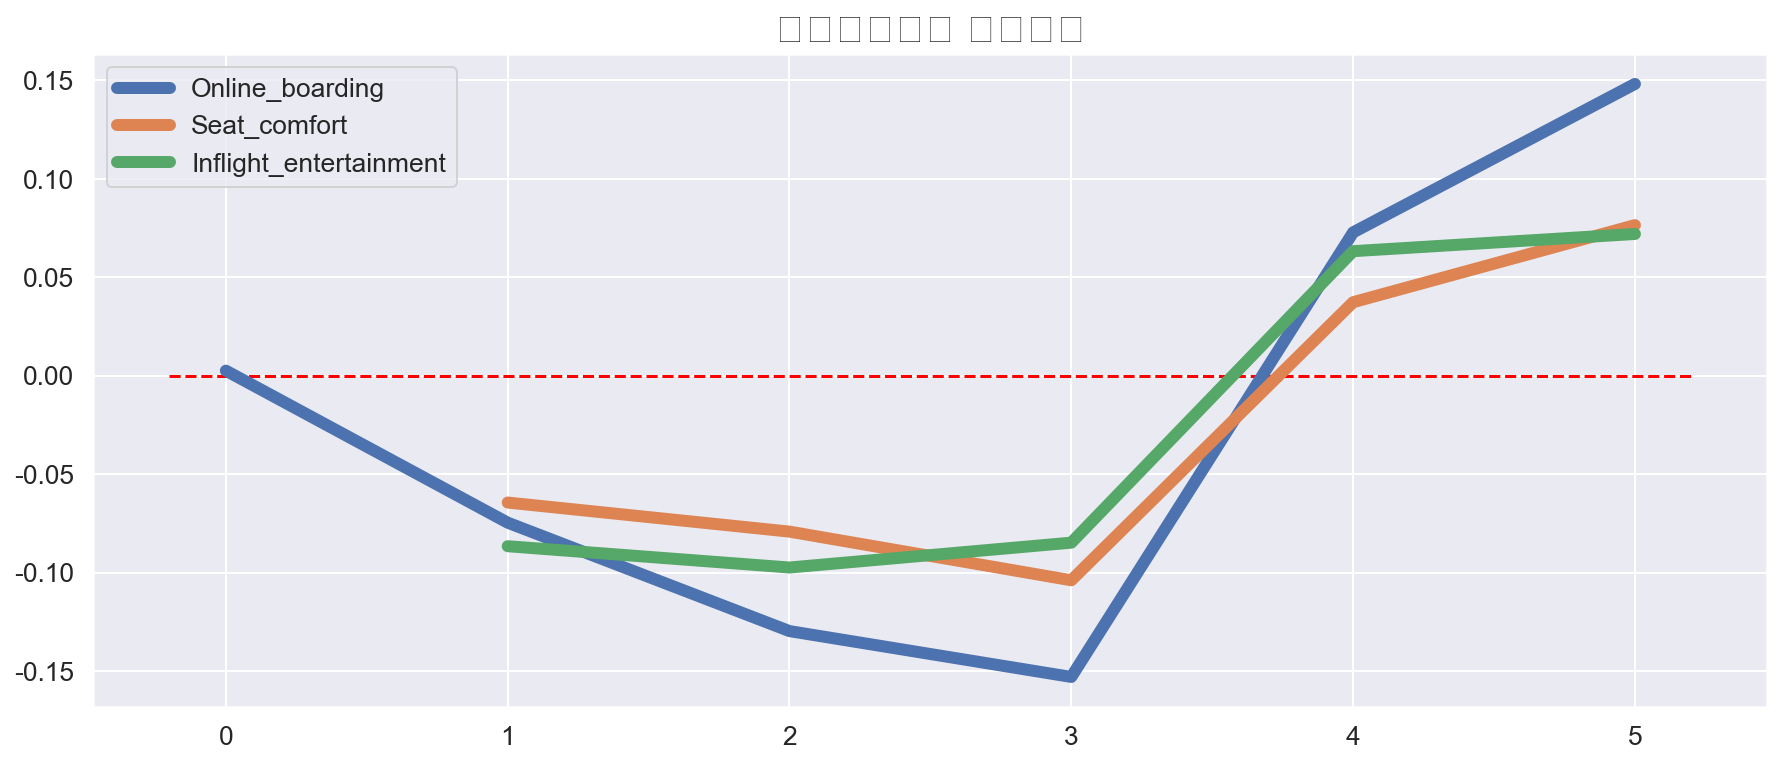

In [27]:
# Online_boarding, Seat_comfort, Infilight_entertainment Line plot


plt.rcParams['axes.unicode_minus'] = False

f0 = df_train.satisfaction == 0
f1 = df_train.satisfaction == 1
total = len(df_train)

onb = []
onb0 = df_train[f0]['Online_boarding'].value_counts().sort_values()
onb1 = df_train[f1]['Online_boarding'].value_counts().sort_values()
onb = (onb1 - onb0) / total

sco = []
sco0 = df_train[f0]['Seat_comfort'].value_counts().sort_values()
sco1 = df_train[f1]['Seat_comfort'].value_counts().sort_values()
sco = (sco1 - sco0) / total

ien = []
ien0 = df_train[f0]['Inflight_entertainment'].value_counts().sort_values()
ien1 = df_train[f1]['Inflight_entertainment'].value_counts().sort_values()
ien = (ien1 - ien0) / total


df_onb = pd.DataFrame(onb).reset_index(drop=True)
df_sco = pd.DataFrame(sco).reset_index(drop=True)
df_ien = pd.DataFrame(ien).reset_index(drop=True)

df_all = pd.concat([df_onb, df_sco, df_ien], axis=1)

plt.figure(figsize=(15,6))

plt.hlines(0, -0.2, 5.2, colors='Red', linestyles='--')

g = sns.lineplot(x=df_all.index.values, y='Online_boarding', linewidth=6, label='Online_boarding', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Seat_comfort', linewidth=6, label='Seat_comfort', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Inflight_entertainment', linewidth=6, label='Inflight_entertainment', data=df_all)

plt.title("만족도등급별 만족비율", fontsize=20, fontweight='bold')

g.set(ylabel=None)



- Online_boarding 만족도 0점을 제외하면 대체적으로 평가가 올라 갈수록 만족도가 상승한다고 볼 수 있음

[Text(0, 0.5, '')]

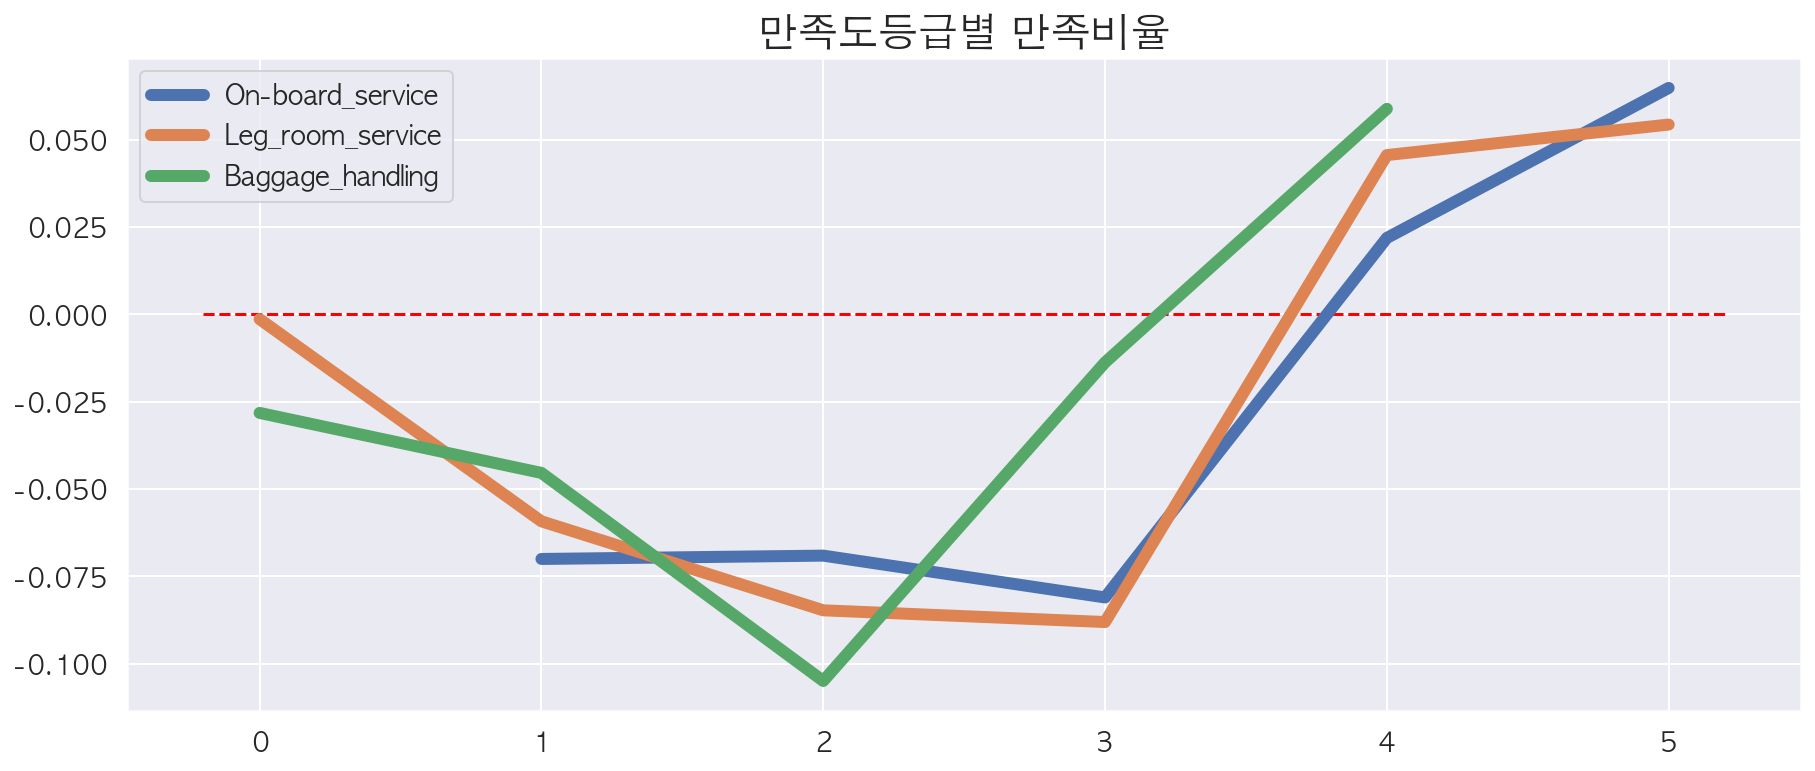

In [28]:
# On-board_service, Leg_room_service, Baggage_handling Line plot
plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False

f0 = df_train.satisfaction == 0
f1 = df_train.satisfaction == 1
total = len(df_train)

obs = []
obs0 = df_train[f0]['On-board_service'].value_counts().sort_values()
obs1 = df_train[f1]['On-board_service'].value_counts().sort_values()
obs = (obs1 - obs0) / total

lrs = []
lrs0 = df_train[f0]['Leg_room_service'].value_counts().sort_values()
lrs1 = df_train[f1]['Leg_room_service'].value_counts().sort_values()
lrs = (lrs1 - lrs0) / total

bah = []
bah0 = df_train[f0]['Baggage_handling'].value_counts().sort_values()
bah1 = df_train[f1]['Baggage_handling'].value_counts().sort_values()
bah = (bah1 - bah0) / total


df_obs = pd.DataFrame(obs).reset_index(drop=True)
df_lrs = pd.DataFrame(lrs).reset_index(drop=True)
df_bah = pd.DataFrame(bah).reset_index(drop=True)

df_all = pd.concat([df_obs, df_lrs, df_bah], axis=1)

plt.figure(figsize=(15,6))

plt.hlines(0, -0.2, 5.2, colors='Red', linestyles='--')

g = sns.lineplot(x=df_all.index.values, y='On-board_service', linewidth=6, label='On-board_service', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Leg_room_service', linewidth=6, label='Leg_room_service', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Baggage_handling', linewidth=6, label='Baggage_handling', data=df_all)

plt.title("만족도등급별 만족비율", fontsize=20, fontweight='bold')

g.set(ylabel=None)




- 만족도 0 ~ 2: 만족도 감소하는 경향을 보임 
- 만족도 2 ~ 5: 만족도 증가하는 경향을 보임
- 추정: 만족도를 아주 낮게(0, 1)을 주는 경우는 해당 서비스에 관심이 없는 승객일 수 있다.

[Text(0, 0.5, '')]

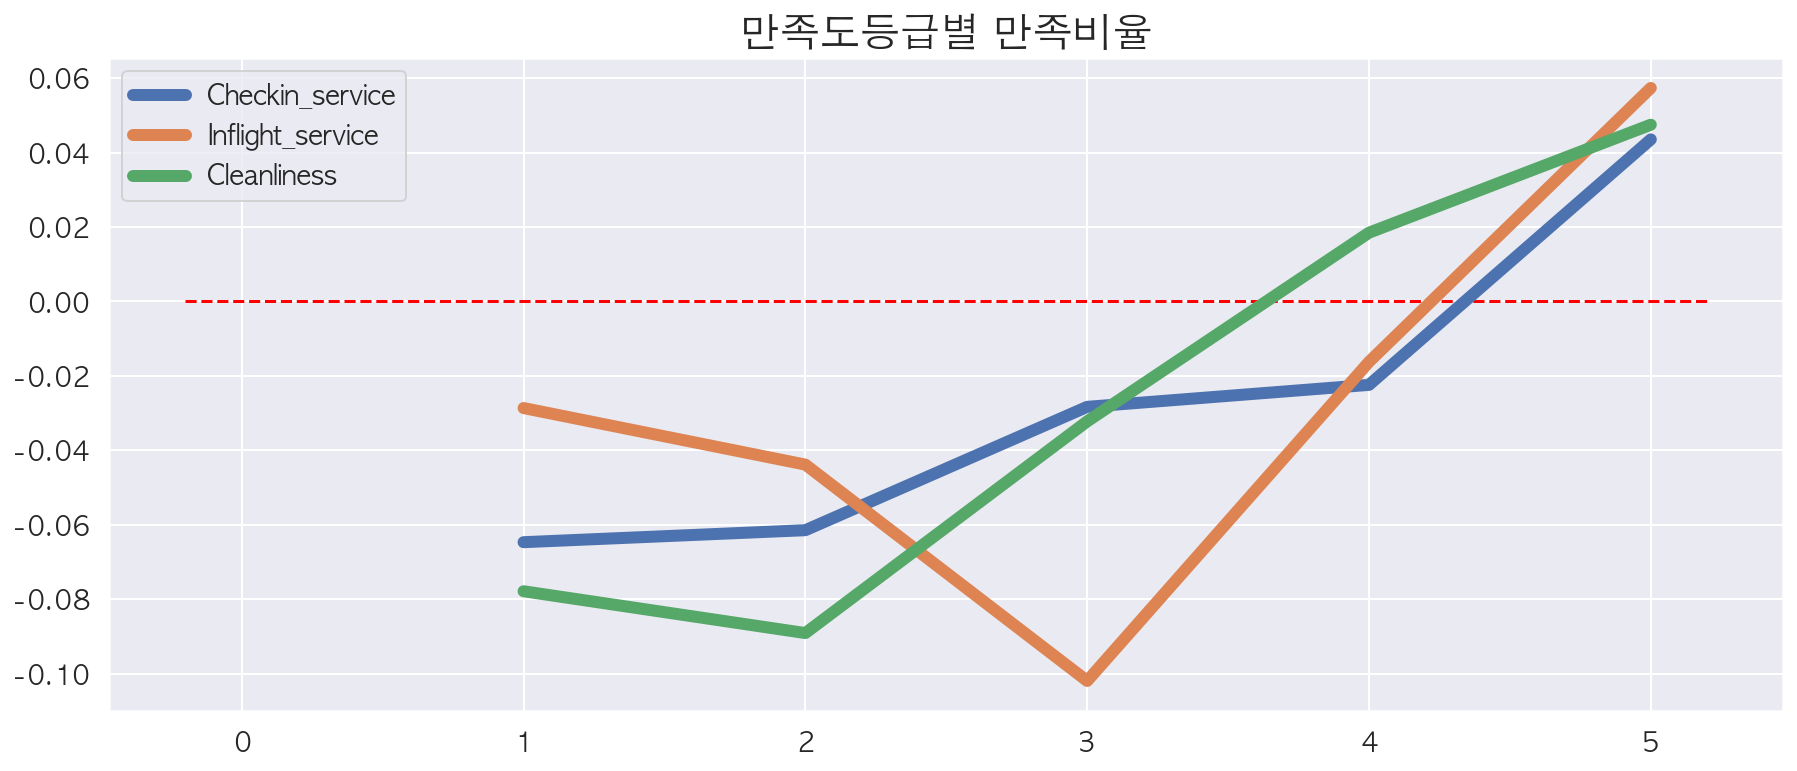

In [29]:
# Checkin_service, Inflight_service, Cleanliness Line plot
plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False

f0 = df_train.satisfaction == 0
f1 = df_train.satisfaction == 1
total = len(df_train)

chs = []
chs0 = df_train[f0]['Checkin_service'].value_counts().sort_values()
chs1 = df_train[f1]['Checkin_service'].value_counts().sort_values()
chs = (chs1 - chs0) / total

ins = []
ins0 = df_train[f0]['Inflight_service'].value_counts().sort_values()
ins1 = df_train[f1]['Inflight_service'].value_counts().sort_values()
ins = (ins1 - ins0) / total

cle = []
cle0 = df_train[f0]['Cleanliness'].value_counts().sort_values()
cle1 = df_train[f1]['Cleanliness'].value_counts().sort_values()
cle = (cle1 - cle0) / total


df_chs = pd.DataFrame(chs).reset_index(drop=True)
df_ins = pd.DataFrame(ins).reset_index(drop=True)
df_cle = pd.DataFrame(cle).reset_index(drop=True)

df_all = pd.concat([df_chs, df_ins, df_cle], axis=1)

plt.figure(figsize=(15,6))

plt.hlines(0, -0.2, 5.2, colors='Red', linestyles='--')

g = sns.lineplot(x=df_all.index.values, y='Checkin_service', linewidth=6, label='Checkin_service', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Inflight_service', linewidth=6, label='Inflight_service', data=df_all)
g = sns.lineplot(x=df_all.index.values, y='Cleanliness', linewidth=6, label='Cleanliness', data=df_all)

plt.title("만족도등급별 만족비율", fontsize=20, fontweight='bold')

g.set(ylabel=None)





- Inflight_service 만족도 3점을 제외하면 대체적으로 평가가 올라 갈수록 만족도가 상승한다고 볼 수 있음

In [30]:
df_train.shape

(103904, 23)

In [31]:
# Flight_Distance와 만족도의 상관관계
import numpy as np


satisfaction = []
dissatisfaction = []
distance = []
ratio = []

# for graph
d_distance = []

for dist in range(500, 5001, 500):
    
    feature = 'Flight_Distance'
    filter = (df_train[feature] > (dist - 500)) & (df_train[feature] <= dist)
    
    s = df_train[filter]["satisfaction"].value_counts().sort_index().values[1]
    d = df_train[filter]["satisfaction"].value_counts().sort_index().values[0]
    t = s + d
    
    distance.append(f'{"" if (dist-500) == 0 else dist-500} ~ {dist}')
    satisfaction.append(s)
    dissatisfaction.append(d)
    ratio.append(np.round(((s *100) / t), 1))
    
    # for graph
    d_distance.append(f'~ {dist}')
    
    
data_distance = pd.DataFrame({"비행거리(Km)": distance, "만족":satisfaction, "불만족":dissatisfaction, "만족도":ratio})

# for graph
disp_distance = pd.DataFrame({"비행거리(Km)": d_distance, "만족도":ratio})


disp_distance.set_index("비행거리(Km)", drop=True, inplace=True)

data_distance 

# plt.hist(df_train[])

,비행거리(Km),만족,불만족,만족도
0,~ 500,10766,21555,33.3
1,500 ~ 1000,9026,18718,32.5
2,1000 ~ 1500,4492,7876,36.3
3,1500 ~ 2000,5836,4222,58.0
4,2000 ~ 2500,4752,2832,62.7
5,2500 ~ 3000,3755,1809,67.5
6,3000 ~ 3500,3130,929,77.1
7,3500 ~ 4000,3236,912,78.0
8,4000 ~ 4500,11,7,61.1
9,4500 ~ 5000,21,19,52.5


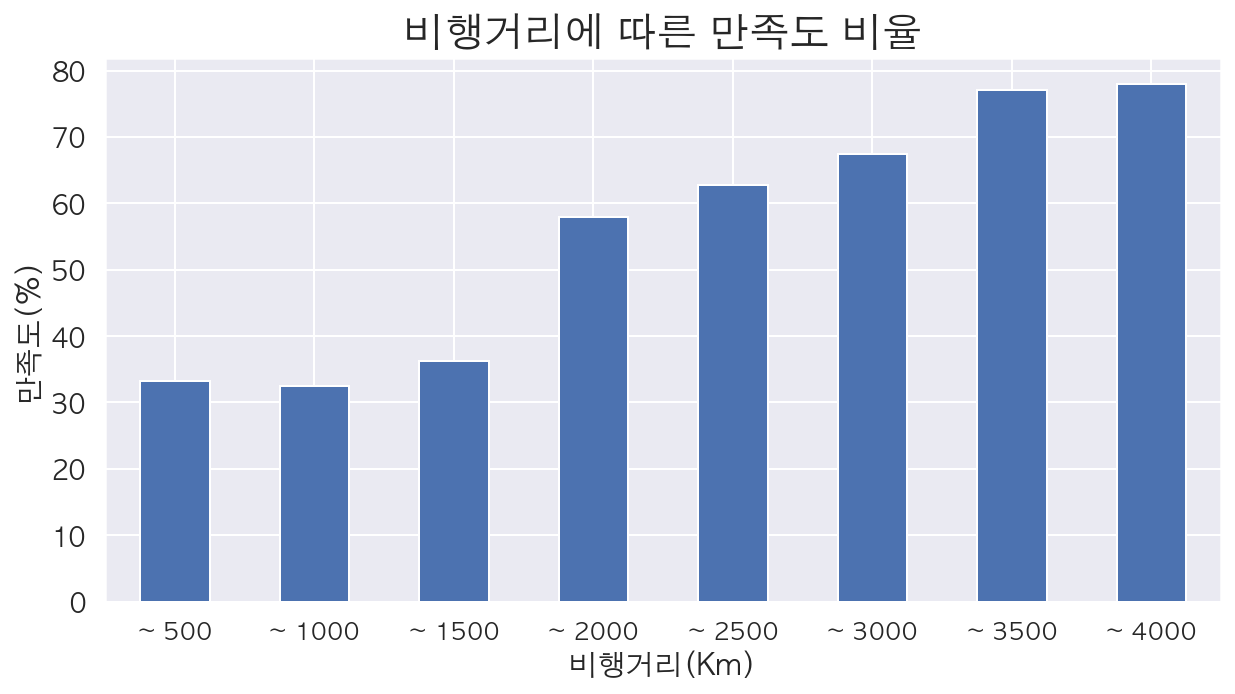

In [32]:
plt.rcParams['font.family'] = 'AppleGothic'

disp_distance[:8].plot(kind='bar', figsize=(10,5), legend=None)

plt.title("비행거리에 따른 만족도 비율", fontweight="bold", fontsize=20)
xticks = plt.xticks(rotation='horizontal', fontsize=12)
ylabel = plt.ylabel("만족도(%)")

In [33]:
# Flight_Distance와 Class의 상관관계

distance = []
business = []
ecoplus = []
eco = []

# for graph
d_distance = []
d_business_ratio = []
d_ecoplus_ratio = []
d_eco_ratio = []

for dist in range(500, 5001, 500):
    
    feature_distance = 'Flight_Distance'
    feature_class = 'Class'
    
    filter_distance = (df_train[feature_distance] > (dist - 500)) & (df_train[feature_distance] <= dist)
    filter_business = (df_train[feature_class] == "Business")
    filter_ecoplus = (df_train[feature_class] == "Eco Plus")
    filter_eco = (df_train[feature_class] == "Eco")
    
    b = df_train[filter_distance & filter_business][feature_class].value_counts().values[0]
    ep = df_train[filter_distance & filter_ecoplus][feature_class].value_counts().values[0]
    e = df_train[filter_distance & filter_eco][feature_class].value_counts().values[0]    
    
    distance.append(f'{"" if (dist-500) == 0 else dist-500} ~ {dist}')
    business.append(b)
    ecoplus.append(ep)
    eco.append(e)
    
    # for graph
    d_distance.append(f'~ {dist}')
    d_business_ratio.append((b * 100) / (b + ep + e))
    d_ecoplus_ratio.append((ep * 100) / (b + ep + e))
    d_eco_ratio.append((e * 100) / (b + ep + e))
    
data_class = pd.DataFrame({"비행거리(Km)": distance, "Business":business, "Eco_Plus":ecoplus, "Eco":eco})

# for graph
disp_class = pd.DataFrame({"비행거리(Km)": d_distance, "Business":d_business_ratio, "Eco_Plus":d_ecoplus_ratio, "Eco":d_eco_ratio})    
disp_class.set_index("비행거리(Km)", drop=True, inplace=True)

data_class 

,비행거리(Km),Business,Eco_Plus,Eco
0,~ 500,10125,3171,19025
1,500 ~ 1000,8599,2564,16581
2,1000 ~ 1500,4644,952,6772
3,1500 ~ 2000,7322,422,2314
4,2000 ~ 2500,5901,252,1431
5,2500 ~ 3000,4870,121,573
6,3000 ~ 3500,4049,3,7
7,3500 ~ 4000,4124,2,22
8,4000 ~ 4500,12,3,3
9,4500 ~ 5000,19,4,17


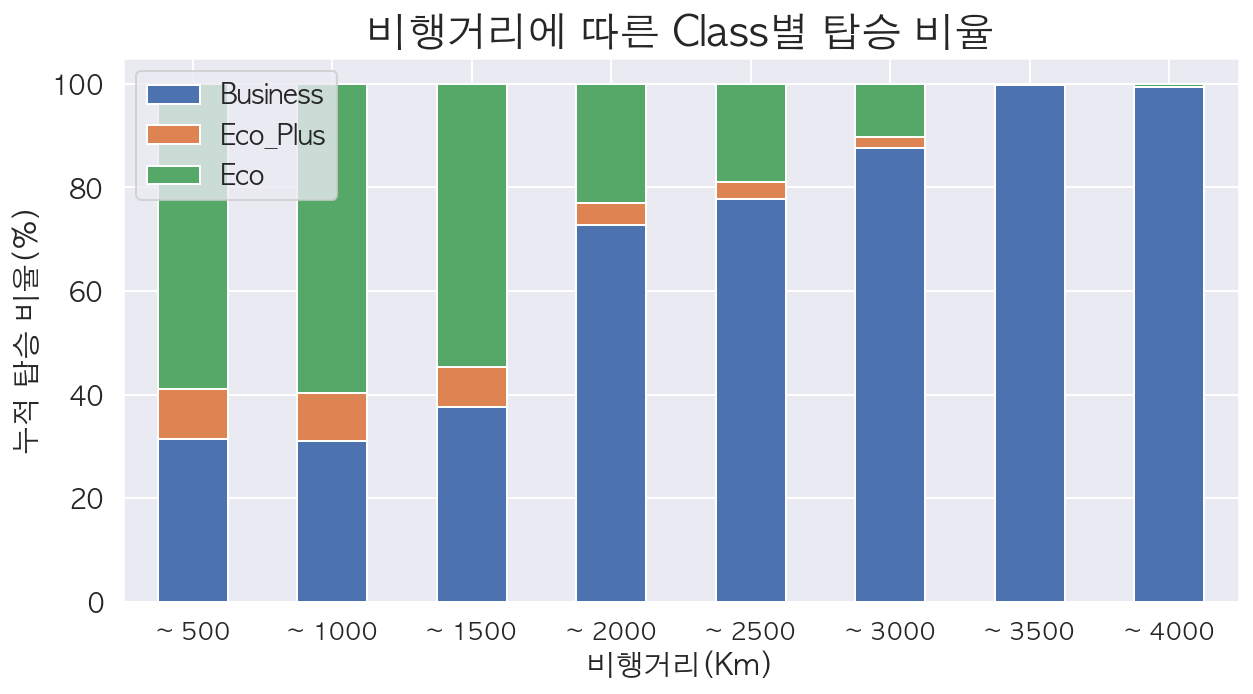

In [34]:
plt.rcParams['font.family'] = 'AppleGothic'

disp_class[:8].plot(kind='bar', figsize=(10,5), stacked=True)

plt.title("비행거리에 따른 Class별 탑승 비율", fontweight="bold", fontsize=20)
xticks = plt.xticks(rotation='horizontal', fontsize=12)
ylabel = plt.ylabel("누적 탑승 비율(%)")

- 비행거리가 길어질 수록 만족도가 떨어질   
것으로 예상되나, 결과는 반대임이 확인 됨
- 비행거리가 길 수록 Business Class    
탑승비율이 급격하게 상승하여 Class에    
따라 만족도가 상향됨을 확인

In [35]:
df_train['Departure_Delay_in_Minutes'].max()

1592

In [36]:
df_train[(df_train['Departure_Delay_in_Minutes'] > (1600 - 200)) & (df_train['Departure_Delay_in_Minutes'] <= 1600)]['satisfaction'].value_counts() #.sort_index().values[0]

0    1
Name: satisfaction, dtype: int64

In [37]:
# Departure_Delay_in_Minutes과 만족도의 상관관계

delay = []
satisfaction = []
dissatisfaction = []
ratio = []

for m in range(200, 1601, 200):
    
    feature = 'Departure_Delay_in_Minutes'
    filter1 = (df_train[feature] > (m - 200)) & (df_train[feature] <= m) & (df_train['satisfaction'] == 1)
    filter0 = (df_train[feature] > (m - 200)) & (df_train[feature] <= m) & (df_train['satisfaction'] == 0)    
    
    s = 0 if df_train[filter1]["satisfaction"].value_counts().empty else df_train[filter1]["satisfaction"].value_counts().values[0]
    d = 0 if df_train[filter0]["satisfaction"].value_counts().empty else df_train[filter0]["satisfaction"].value_counts().values[0]
    t = 1 if (s + d) == 0 else (s + d)
    
    delay.append(f'{"" if (m-200) == 0 else m-200} ~ {m}')
    satisfaction.append(s)
    dissatisfaction.append(d)
    ratio.append(np.round(((s *100) / t), 1))
    
data_departure = pd.DataFrame({"출발지연시간(분)": delay, "만족":satisfaction, "불만족":dissatisfaction, "만족도":ratio})

data_departure 

,출발지연시간(분),만족,불만족,만족도
0,~ 200,17906,26556,40.3
1,200 ~ 400,246,449,35.4
2,400 ~ 600,25,36,41.0
3,600 ~ 800,2,7,22.2
4,800 ~ 1000,2,4,33.3
5,1000 ~ 1200,1,0,100.0
6,1200 ~ 1400,1,0,100.0
7,1400 ~ 1600,0,1,0.0


In [38]:
# Arrival_Delay_in_Minutes과 만족도의 상관관계

delay = []
satisfaction = []
dissatisfaction = []
ratio = []

for m in range(200, 1601, 200):
    
    feature = 'Arrival_Delay_in_Minutes'
    filter1 = (df_train[feature] > (m - 200)) & (df_train[feature] <= m) & (df_train['satisfaction'] == 1)
    filter0 = (df_train[feature] > (m - 200)) & (df_train[feature] <= m) & (df_train['satisfaction'] == 0)    
    
    s = 0 if df_train[filter1]["satisfaction"].value_counts().empty else df_train[filter1]["satisfaction"].value_counts().values[0]
    d = 0 if df_train[filter0]["satisfaction"].value_counts().empty else df_train[filter0]["satisfaction"].value_counts().values[0]
    t = 1 if (s + d) == 0 else (s + d)
    
    delay.append(f'{"" if (m-200) == 0 else m-200} ~ {m}')
    satisfaction.append(s)
    dissatisfaction.append(d)
    ratio.append(np.round(((s *100) / t), 1))
    
data_arrival = pd.DataFrame({"도착지연시간(분)": delay, "만족":satisfaction, "불만족":dissatisfaction, "만족도":ratio})

data_arrival 

,도착지연시간(분),만족,불만족,만족도
0,~ 200,17231,27707,38.3
1,200 ~ 400,264,454,36.8
2,400 ~ 600,28,43,39.4
3,600 ~ 800,1,8,11.1
4,800 ~ 1000,2,4,33.3
5,1000 ~ 1200,1,0,100.0
6,1200 ~ 1400,1,0,100.0
7,1400 ~ 1600,0,1,0.0


- 출발지연시간/도착지연시간
 - 만족도 변화에 별다른 영향을 끼치지 못한다.
 - 전체 만족도와 비율을 조금 다르지만, 거의 비슷한 양상을 보인다.

In [39]:
df_train['Age'].max()

85

In [40]:
# Age와 만족도의 상관관계

age = []
satisfaction = []
dissatisfaction = []
ratio = []

# for graph
d_age = []
d_ratio = []

for a in range(10, 90, 10):
    
    feature = 'Age'
    filter1 = (df_train[feature] > (a - 10)) & (df_train[feature] <= a) & (df_train['satisfaction'] == 1)
    filter0 = (df_train[feature] > (a - 10)) & (df_train[feature] <= a) & (df_train['satisfaction'] == 0)    
    
    s = 0 if df_train[filter1]["satisfaction"].value_counts().empty else df_train[filter1]["satisfaction"].value_counts().values[0]
    d = 0 if df_train[filter0]["satisfaction"].value_counts().empty else df_train[filter0]["satisfaction"].value_counts().values[0]
    t = 1 if (s + d) == 0 else (s + d)
    
    age.append(f'{"" if (a-10) == 0 else a-10} ~ {a}')
    satisfaction.append(s)
    dissatisfaction.append(d)
    ratio.append(np.round(((s * 100) / t), 1))
    
    # for graph
    d_age.append(f'~ {a}')
    d_ratio.append(np.round(((s * 100) / t), 1))
    
data_age = pd.DataFrame({"나이": age, "만족":satisfaction, "불만족":dissatisfaction, "만족도":ratio})

# for graph
disp_age = pd.DataFrame({"나이": d_age, "만족도":d_ratio})
disp_age.set_index("나이", drop=True, inplace=True)

data_age 

,나이,만족,불만족,만족도
0,~ 10,310,2267,12.0
1,10 ~ 20,1914,6842,21.9
2,20 ~ 30,7760,13664,36.2
3,30 ~ 40,9184,12019,43.3
4,40 ~ 50,13456,9743,58.0
5,50 ~ 60,10739,8030,57.2
6,60 ~ 70,1448,5772,20.1
7,70 ~ 80,211,528,28.6


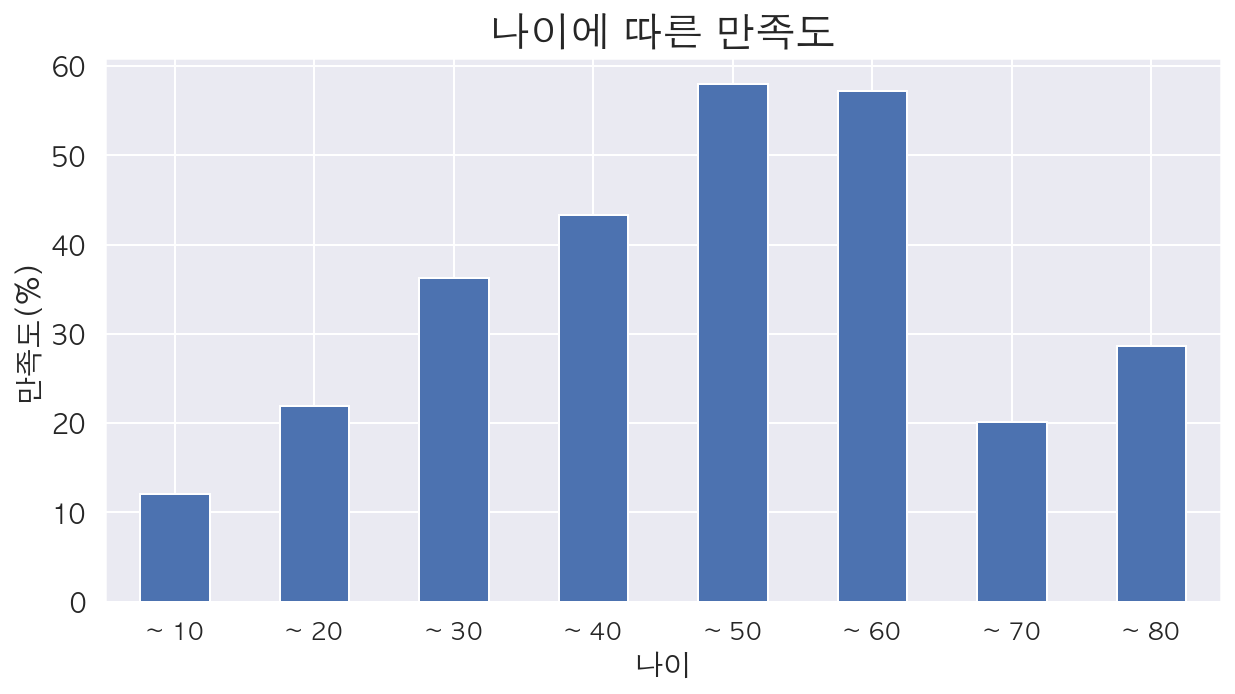

In [41]:
plt.rcParams['font.family'] = 'AppleGothic'

disp_age.plot(kind='bar', figsize=(10,5), legend=None)

plt.title("나이에 따른 만족도", fontweight="bold", fontsize=20)
xticks = plt.xticks(rotation='horizontal', fontsize=12)
ylabel = plt.ylabel("만족도(%)")

- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;~ 20대: 만족도가 아주 낮다   
- 30 ~ 60대: 만족도가 높은 편이다   
- 70 ~ 80대: 만족도가 아주 낮다

### *4. 분석에 불필요한 Column 삭제*

- 데이터 누수가 발생 할 수 있는 Column 삭제
 -  Gender, Customer_Type: 전체 satisfaction과 비율/양상이 비슷하다
 - Type_of_Travel: Business Type인 경우 Business Class 탑승률이 확연히 높다 -> Class 항목에 영향을 받는다
 - Flight_Distance: 비행거리가 길 수록 Business Class 탑승률이 확연히 높다 -> Class 항목에 영향을 받는다
 - Departure_Delay_in_Minutes: 거의 대부분의 시간에서 만족/불만족 비율이 동일하다
 - Arrival_Delay_in_Minutes: 거의 대부분의 시간에서 만족/불만족 비율이 동일하다
 - Departure/Arrival_time_convenient: 만족도와 상관관계가 크게 없다
 - Gate_locatioin: 만족도와 상관관계가 크게 없다

In [42]:
def remove_data_leakage(df):
    df = df.drop(columns='Gender')
    df = df.drop(columns='Customer_Type')
    df = df.drop(columns='Type_of_Travel')
    df = df.drop(columns='Flight_Distance')
    df = df.drop(columns='Departure_Delay_in_Minutes')
    df = df.drop(columns='Arrival_Delay_in_Minutes')
    df = df.drop(columns='Departure/Arrival_time_convenient')
    df = df.drop(columns='Gate_location')

    return df

In [43]:
df_train = remove_data_leakage(df_train)
df_test = remove_data_leakage(df_test)

In [44]:
df_train.shape, df_test.shape

((103904, 15), (25976, 15))

In [45]:
df_train

,Age,Class,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,13,Eco Plus,3,3,5,3,5,5,4,3,4,4,5,5,0
1,25,Business,3,3,1,3,1,1,1,5,3,1,4,1,0
2,26,Business,2,2,5,5,5,5,4,3,4,4,4,5,1
3,25,Business,2,5,2,2,2,2,2,5,3,1,4,2,0
4,61,Business,3,3,4,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,Eco,2,2,2,2,2,2,3,1,4,2,3,2,0
103900,49,Business,4,4,2,4,5,5,5,5,5,5,5,4,1
103901,30,Business,1,1,4,1,5,4,3,2,4,5,5,4,0
103902,22,Eco,1,1,1,1,1,1,4,5,1,5,4,1,0


### *5. Feature / Target 분리 및 Train Set / Validation Set 분리*

In [46]:
from sklearn.model_selection import train_test_split
# from category_encoders import OrdinalEncoder

def split_data_encode(train, test):

    train['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2},inplace = True)
    test['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2},inplace = True)
    
    # X, Y 분리
    X_train = train.drop(columns='satisfaction')
    y_train = train.satisfaction
    
    X_test = test.drop(columns='satisfaction')
    y_test = test.satisfaction
        
    # Train Set -> Train Set + Validation Set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, stratify=y_train, random_state=0)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [47]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data_encode(df_train.copy(), df_test.copy())

In [48]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((77928, 14), (25976, 14), (25976, 14), (77928,), (25976,), (25976,))

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77928 entries, 45449 to 61877
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     77928 non-null  int64
 1   Class                   77928 non-null  int64
 2   Inflight_wifi_service   77928 non-null  int64
 3   Ease_of_Online_booking  77928 non-null  int64
 4   Food_and_drink          77928 non-null  int64
 5   Online_boarding         77928 non-null  int64
 6   Seat_comfort            77928 non-null  int64
 7   Inflight_entertainment  77928 non-null  int64
 8   On-board_service        77928 non-null  int64
 9   Leg_room_service        77928 non-null  int64
 10  Baggage_handling        77928 non-null  int64
 11  Checkin_service         77928 non-null  int64
 12  Inflight_service        77928 non-null  int64
 13  Cleanliness             77928 non-null  int64
dtypes: int64(14)
memory usage: 8.9 MB


In [50]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 64861 to 97353
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     25976 non-null  int64
 1   Class                   25976 non-null  int64
 2   Inflight_wifi_service   25976 non-null  int64
 3   Ease_of_Online_booking  25976 non-null  int64
 4   Food_and_drink          25976 non-null  int64
 5   Online_boarding         25976 non-null  int64
 6   Seat_comfort            25976 non-null  int64
 7   Inflight_entertainment  25976 non-null  int64
 8   On-board_service        25976 non-null  int64
 9   Leg_room_service        25976 non-null  int64
 10  Baggage_handling        25976 non-null  int64
 11  Checkin_service         25976 non-null  int64
 12  Inflight_service        25976 non-null  int64
 13  Cleanliness             25976 non-null  int64
dtypes: int64(14)
memory usage: 3.0 MB


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     25976 non-null  int64
 1   Class                   25976 non-null  int64
 2   Inflight_wifi_service   25976 non-null  int64
 3   Ease_of_Online_booking  25976 non-null  int64
 4   Food_and_drink          25976 non-null  int64
 5   Online_boarding         25976 non-null  int64
 6   Seat_comfort            25976 non-null  int64
 7   Inflight_entertainment  25976 non-null  int64
 8   On-board_service        25976 non-null  int64
 9   Leg_room_service        25976 non-null  int64
 10  Baggage_handling        25976 non-null  int64
 11  Checkin_service         25976 non-null  int64
 12  Inflight_service        25976 non-null  int64
 13  Cleanliness             25976 non-null  int64
dtypes: int64(14)
memory usage: 3.0 MB


In [52]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

## *Base Model*
- 최빈값을 Base Model로 삼는다

In [53]:
from sklearn.metrics import accuracy_score

# Most Frequency Value
major = y_train.mode()[0]

y_pred_train = [major] * len(y_train)

print('Base Mode의 정확도(Train Set)', accuracy_score(y_train, y_pred_train))

Base Mode의 정확도(Train Set) 0.5666641001950519


In [54]:
y_pred_val = [major] * len(y_val)

print('Base Mode의 정확도(Validation Set)', accuracy_score(y_val, y_pred_val))

Base Mode의 정확도(Validation Set) 0.566676932553126


In [55]:
y_pred_test = [major] * len(y_test)

print('Base Mode의 정확도(Test Set)', accuracy_score(y_test, y_pred_test))

Base Mode의 정확도(Test Set) 0.5610178626424391


## *7. Model: GridSearchCV와 XGBoost*

In [56]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

- Target의 Imbalance를 해소하기 위하여 Model 학습 Ratio를 변경
 - ratio = (만족) / (불만족)

In [57]:
# Target의 값 비율 (학습을 위하여 Ratio 계산)

vc = y_train.value_counts(normalize=True)

ratio = vc[1] / vc[0]
ratio

0.7647138748612966

In [58]:
# eval_set 설정

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

In [59]:
#GridSearchCV를 이용하여 HP 찾기

xgb_model = XGBClassifier(n_estimators=200, 
                          random_state=2,
                          n_jobs=-1, 
                          max_depth=7,
                          scale_pos_weight=ratio,
                          learning_rate=0.2
                         )

params = {
    'max_depth':[6,7], 
    'min_child_weight':[1,3], 
    'colsample_bytree':[0.5,0.75]
}

gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

gridcv.fit(X_train, y_train, early_stopping_rounds=20, eval_metric='auc', eval_set=eval_set)

[0]	validation_0-auc:0.91724	validation_1-auc:0.92137
[1]	validation_0-auc:0.93395	validation_1-auc:0.93542
[2]	validation_0-auc:0.96174	validation_1-auc:0.96234
[3]	validation_0-auc:0.96080	validation_1-auc:0.96155
[4]	validation_0-auc:0.96549	validation_1-auc:0.96625
[5]	validation_0-auc:0.96822	validation_1-auc:0.96859
[6]	validation_0-auc:0.96802	validation_1-auc:0.96828
[7]	validation_0-auc:0.96830	validation_1-auc:0.96832
[8]	validation_0-auc:0.96895	validation_1-auc:0.96888
[9]	validation_0-auc:0.96929	validation_1-auc:0.96923
[10]	validation_0-auc:0.97056	validation_1-auc:0.97033
[11]	validation_0-auc:0.97321	validation_1-auc:0.97295
[12]	validation_0-auc:0.97522	validation_1-auc:0.97480
[13]	validation_0-auc:0.97665	validation_1-auc:0.97620
[14]	validation_0-auc:0.97707	validation_1-auc:0.97651
[15]	validation_0-auc:0.97784	validation_1-auc:0.97730
[16]	validation_0-auc:0.97897	validation_1-auc:0.97829
[17]	validation_0-auc:0.97926	validation_1-auc:0.97852
[18]	validation_0-au

[149]	validation_0-auc:0.99236	validation_1-auc:0.98929
[150]	validation_0-auc:0.99236	validation_1-auc:0.98929
[151]	validation_0-auc:0.99236	validation_1-auc:0.98928
[152]	validation_0-auc:0.99238	validation_1-auc:0.98927
[153]	validation_0-auc:0.99242	validation_1-auc:0.98929
[154]	validation_0-auc:0.99243	validation_1-auc:0.98930
[155]	validation_0-auc:0.99243	validation_1-auc:0.98930
[156]	validation_0-auc:0.99244	validation_1-auc:0.98930
[157]	validation_0-auc:0.99247	validation_1-auc:0.98933
[158]	validation_0-auc:0.99248	validation_1-auc:0.98934
[159]	validation_0-auc:0.99254	validation_1-auc:0.98940
[160]	validation_0-auc:0.99255	validation_1-auc:0.98941
[161]	validation_0-auc:0.99256	validation_1-auc:0.98941
[162]	validation_0-auc:0.99259	validation_1-auc:0.98941
[163]	validation_0-auc:0.99261	validation_1-auc:0.98941
[164]	validation_0-auc:0.99262	validation_1-auc:0.98943
[165]	validation_0-auc:0.99263	validation_1-auc:0.98944
[166]	validation_0-auc:0.99265	validation_1-auc:

[98]	validation_0-auc:0.99032	validation_1-auc:0.98816
[99]	validation_0-auc:0.99039	validation_1-auc:0.98818
[100]	validation_0-auc:0.99040	validation_1-auc:0.98817
[101]	validation_0-auc:0.99045	validation_1-auc:0.98821
[102]	validation_0-auc:0.99055	validation_1-auc:0.98827
[103]	validation_0-auc:0.99062	validation_1-auc:0.98829
[104]	validation_0-auc:0.99065	validation_1-auc:0.98832
[105]	validation_0-auc:0.99072	validation_1-auc:0.98836
[106]	validation_0-auc:0.99075	validation_1-auc:0.98838
[107]	validation_0-auc:0.99076	validation_1-auc:0.98838
[108]	validation_0-auc:0.99087	validation_1-auc:0.98849
[109]	validation_0-auc:0.99094	validation_1-auc:0.98851
[110]	validation_0-auc:0.99098	validation_1-auc:0.98854
[111]	validation_0-auc:0.99100	validation_1-auc:0.98855
[112]	validation_0-auc:0.99105	validation_1-auc:0.98859
[113]	validation_0-auc:0.99106	validation_1-auc:0.98860
[114]	validation_0-auc:0.99109	validation_1-auc:0.98861
[115]	validation_0-auc:0.99113	validation_1-auc:0.

[46]	validation_0-auc:0.98598	validation_1-auc:0.98486
[47]	validation_0-auc:0.98619	validation_1-auc:0.98505
[48]	validation_0-auc:0.98649	validation_1-auc:0.98529
[49]	validation_0-auc:0.98667	validation_1-auc:0.98541
[50]	validation_0-auc:0.98679	validation_1-auc:0.98545
[51]	validation_0-auc:0.98690	validation_1-auc:0.98554
[52]	validation_0-auc:0.98708	validation_1-auc:0.98566
[53]	validation_0-auc:0.98719	validation_1-auc:0.98572
[54]	validation_0-auc:0.98722	validation_1-auc:0.98574
[55]	validation_0-auc:0.98733	validation_1-auc:0.98580
[56]	validation_0-auc:0.98734	validation_1-auc:0.98581
[57]	validation_0-auc:0.98748	validation_1-auc:0.98594
[58]	validation_0-auc:0.98750	validation_1-auc:0.98594
[59]	validation_0-auc:0.98765	validation_1-auc:0.98609
[60]	validation_0-auc:0.98768	validation_1-auc:0.98612
[61]	validation_0-auc:0.98776	validation_1-auc:0.98614
[62]	validation_0-auc:0.98779	validation_1-auc:0.98616
[63]	validation_0-auc:0.98788	validation_1-auc:0.98618
[64]	valid

[194]	validation_0-auc:0.99313	validation_1-auc:0.98965
[195]	validation_0-auc:0.99315	validation_1-auc:0.98965
[196]	validation_0-auc:0.99320	validation_1-auc:0.98971
[197]	validation_0-auc:0.99321	validation_1-auc:0.98972
[198]	validation_0-auc:0.99322	validation_1-auc:0.98973
[199]	validation_0-auc:0.99326	validation_1-auc:0.98974
[0]	validation_0-auc:0.91718	validation_1-auc:0.92129
[1]	validation_0-auc:0.93393	validation_1-auc:0.93539
[2]	validation_0-auc:0.96156	validation_1-auc:0.96209
[3]	validation_0-auc:0.96050	validation_1-auc:0.96107
[4]	validation_0-auc:0.96543	validation_1-auc:0.96616
[5]	validation_0-auc:0.96812	validation_1-auc:0.96841
[6]	validation_0-auc:0.96787	validation_1-auc:0.96809
[7]	validation_0-auc:0.96831	validation_1-auc:0.96833
[8]	validation_0-auc:0.96881	validation_1-auc:0.96879
[9]	validation_0-auc:0.96911	validation_1-auc:0.96912
[10]	validation_0-auc:0.97039	validation_1-auc:0.97028
[11]	validation_0-auc:0.97305	validation_1-auc:0.97290
[12]	validatio

[143]	validation_0-auc:0.99199	validation_1-auc:0.98930
[144]	validation_0-auc:0.99203	validation_1-auc:0.98932
[145]	validation_0-auc:0.99207	validation_1-auc:0.98936
[146]	validation_0-auc:0.99209	validation_1-auc:0.98937
[147]	validation_0-auc:0.99213	validation_1-auc:0.98939
[148]	validation_0-auc:0.99214	validation_1-auc:0.98939
[149]	validation_0-auc:0.99215	validation_1-auc:0.98940
[150]	validation_0-auc:0.99217	validation_1-auc:0.98943
[151]	validation_0-auc:0.99221	validation_1-auc:0.98946
[152]	validation_0-auc:0.99223	validation_1-auc:0.98944
[153]	validation_0-auc:0.99226	validation_1-auc:0.98945
[154]	validation_0-auc:0.99227	validation_1-auc:0.98944
[155]	validation_0-auc:0.99233	validation_1-auc:0.98948
[156]	validation_0-auc:0.99235	validation_1-auc:0.98947
[157]	validation_0-auc:0.99238	validation_1-auc:0.98947
[158]	validation_0-auc:0.99240	validation_1-auc:0.98948
[159]	validation_0-auc:0.99241	validation_1-auc:0.98948
[160]	validation_0-auc:0.99246	validation_1-auc:

[92]	validation_0-auc:0.98978	validation_1-auc:0.98788
[93]	validation_0-auc:0.98986	validation_1-auc:0.98794
[94]	validation_0-auc:0.98992	validation_1-auc:0.98799
[95]	validation_0-auc:0.98995	validation_1-auc:0.98801
[96]	validation_0-auc:0.98996	validation_1-auc:0.98801
[97]	validation_0-auc:0.99001	validation_1-auc:0.98802
[98]	validation_0-auc:0.99003	validation_1-auc:0.98804
[99]	validation_0-auc:0.99006	validation_1-auc:0.98805
[100]	validation_0-auc:0.99010	validation_1-auc:0.98805
[101]	validation_0-auc:0.99014	validation_1-auc:0.98810
[102]	validation_0-auc:0.99020	validation_1-auc:0.98810
[103]	validation_0-auc:0.99025	validation_1-auc:0.98811
[104]	validation_0-auc:0.99027	validation_1-auc:0.98812
[105]	validation_0-auc:0.99034	validation_1-auc:0.98817
[106]	validation_0-auc:0.99037	validation_1-auc:0.98819
[107]	validation_0-auc:0.99040	validation_1-auc:0.98821
[108]	validation_0-auc:0.99045	validation_1-auc:0.98829
[109]	validation_0-auc:0.99059	validation_1-auc:0.98841


[40]	validation_0-auc:0.98510	validation_1-auc:0.98423
[41]	validation_0-auc:0.98529	validation_1-auc:0.98436
[42]	validation_0-auc:0.98532	validation_1-auc:0.98437
[43]	validation_0-auc:0.98539	validation_1-auc:0.98440
[44]	validation_0-auc:0.98552	validation_1-auc:0.98454
[45]	validation_0-auc:0.98564	validation_1-auc:0.98461
[46]	validation_0-auc:0.98566	validation_1-auc:0.98461
[47]	validation_0-auc:0.98584	validation_1-auc:0.98476
[48]	validation_0-auc:0.98617	validation_1-auc:0.98507
[49]	validation_0-auc:0.98632	validation_1-auc:0.98518
[50]	validation_0-auc:0.98635	validation_1-auc:0.98518
[51]	validation_0-auc:0.98647	validation_1-auc:0.98527
[52]	validation_0-auc:0.98655	validation_1-auc:0.98532
[53]	validation_0-auc:0.98669	validation_1-auc:0.98543
[54]	validation_0-auc:0.98671	validation_1-auc:0.98545
[55]	validation_0-auc:0.98695	validation_1-auc:0.98565
[56]	validation_0-auc:0.98697	validation_1-auc:0.98565
[57]	validation_0-auc:0.98715	validation_1-auc:0.98580
[58]	valid

[188]	validation_0-auc:0.99258	validation_1-auc:0.98943
[189]	validation_0-auc:0.99260	validation_1-auc:0.98946
[190]	validation_0-auc:0.99261	validation_1-auc:0.98948
[191]	validation_0-auc:0.99264	validation_1-auc:0.98949
[192]	validation_0-auc:0.99268	validation_1-auc:0.98951
[193]	validation_0-auc:0.99270	validation_1-auc:0.98950
[194]	validation_0-auc:0.99271	validation_1-auc:0.98950
[195]	validation_0-auc:0.99272	validation_1-auc:0.98950
[196]	validation_0-auc:0.99273	validation_1-auc:0.98952
[197]	validation_0-auc:0.99275	validation_1-auc:0.98954
[198]	validation_0-auc:0.99277	validation_1-auc:0.98954
[199]	validation_0-auc:0.99280	validation_1-auc:0.98955
[0]	validation_0-auc:0.92311	validation_1-auc:0.92586
[1]	validation_0-auc:0.93884	validation_1-auc:0.94012
[2]	validation_0-auc:0.96453	validation_1-auc:0.96487
[3]	validation_0-auc:0.96410	validation_1-auc:0.96450
[4]	validation_0-auc:0.96911	validation_1-auc:0.96952
[5]	validation_0-auc:0.97160	validation_1-auc:0.97165
[6]	

[137]	validation_0-auc:0.99389	validation_1-auc:0.98997
[138]	validation_0-auc:0.99392	validation_1-auc:0.98997
[139]	validation_0-auc:0.99398	validation_1-auc:0.99006
[140]	validation_0-auc:0.99401	validation_1-auc:0.99004
[141]	validation_0-auc:0.99402	validation_1-auc:0.99004
[142]	validation_0-auc:0.99403	validation_1-auc:0.99004
[143]	validation_0-auc:0.99408	validation_1-auc:0.99004
[144]	validation_0-auc:0.99410	validation_1-auc:0.99005
[145]	validation_0-auc:0.99411	validation_1-auc:0.99004
[146]	validation_0-auc:0.99412	validation_1-auc:0.99005
[147]	validation_0-auc:0.99416	validation_1-auc:0.99005
[148]	validation_0-auc:0.99420	validation_1-auc:0.99008
[149]	validation_0-auc:0.99421	validation_1-auc:0.99009
[150]	validation_0-auc:0.99423	validation_1-auc:0.99009
[151]	validation_0-auc:0.99424	validation_1-auc:0.99010
[152]	validation_0-auc:0.99426	validation_1-auc:0.99010
[153]	validation_0-auc:0.99429	validation_1-auc:0.99008
[154]	validation_0-auc:0.99429	validation_1-auc:

[85]	validation_0-auc:0.99151	validation_1-auc:0.98854
[86]	validation_0-auc:0.99159	validation_1-auc:0.98857
[87]	validation_0-auc:0.99164	validation_1-auc:0.98858
[88]	validation_0-auc:0.99167	validation_1-auc:0.98858
[89]	validation_0-auc:0.99173	validation_1-auc:0.98859
[90]	validation_0-auc:0.99175	validation_1-auc:0.98859
[91]	validation_0-auc:0.99175	validation_1-auc:0.98858
[92]	validation_0-auc:0.99181	validation_1-auc:0.98857
[93]	validation_0-auc:0.99189	validation_1-auc:0.98860
[94]	validation_0-auc:0.99193	validation_1-auc:0.98861
[95]	validation_0-auc:0.99201	validation_1-auc:0.98871
[96]	validation_0-auc:0.99206	validation_1-auc:0.98872
[97]	validation_0-auc:0.99210	validation_1-auc:0.98872
[98]	validation_0-auc:0.99224	validation_1-auc:0.98887
[99]	validation_0-auc:0.99231	validation_1-auc:0.98890
[100]	validation_0-auc:0.99236	validation_1-auc:0.98893
[101]	validation_0-auc:0.99238	validation_1-auc:0.98893
[102]	validation_0-auc:0.99240	validation_1-auc:0.98893
[103]	v

[33]	validation_0-auc:0.98699	validation_1-auc:0.98543
[34]	validation_0-auc:0.98722	validation_1-auc:0.98558
[35]	validation_0-auc:0.98742	validation_1-auc:0.98582
[36]	validation_0-auc:0.98749	validation_1-auc:0.98595
[37]	validation_0-auc:0.98754	validation_1-auc:0.98599
[38]	validation_0-auc:0.98767	validation_1-auc:0.98612
[39]	validation_0-auc:0.98770	validation_1-auc:0.98616
[40]	validation_0-auc:0.98773	validation_1-auc:0.98617
[41]	validation_0-auc:0.98789	validation_1-auc:0.98624
[42]	validation_0-auc:0.98792	validation_1-auc:0.98626
[43]	validation_0-auc:0.98799	validation_1-auc:0.98623
[44]	validation_0-auc:0.98811	validation_1-auc:0.98635
[45]	validation_0-auc:0.98824	validation_1-auc:0.98641
[46]	validation_0-auc:0.98835	validation_1-auc:0.98649
[47]	validation_0-auc:0.98857	validation_1-auc:0.98665
[48]	validation_0-auc:0.98873	validation_1-auc:0.98675
[49]	validation_0-auc:0.98891	validation_1-auc:0.98687
[50]	validation_0-auc:0.98906	validation_1-auc:0.98693
[51]	valid

[181]	validation_0-auc:0.99433	validation_1-auc:0.98973
[182]	validation_0-auc:0.99436	validation_1-auc:0.98975
[183]	validation_0-auc:0.99437	validation_1-auc:0.98974
[184]	validation_0-auc:0.99440	validation_1-auc:0.98976
[185]	validation_0-auc:0.99440	validation_1-auc:0.98976
[186]	validation_0-auc:0.99441	validation_1-auc:0.98976
[187]	validation_0-auc:0.99444	validation_1-auc:0.98974
[188]	validation_0-auc:0.99446	validation_1-auc:0.98974
[189]	validation_0-auc:0.99446	validation_1-auc:0.98974
[190]	validation_0-auc:0.99446	validation_1-auc:0.98975
[191]	validation_0-auc:0.99449	validation_1-auc:0.98974
[192]	validation_0-auc:0.99450	validation_1-auc:0.98974
[193]	validation_0-auc:0.99452	validation_1-auc:0.98975
[194]	validation_0-auc:0.99455	validation_1-auc:0.98976
[195]	validation_0-auc:0.99456	validation_1-auc:0.98976
[196]	validation_0-auc:0.99458	validation_1-auc:0.98979
[197]	validation_0-auc:0.99459	validation_1-auc:0.98979
[198]	validation_0-auc:0.99459	validation_1-auc:

[130]	validation_0-auc:0.99314	validation_1-auc:0.98979
[131]	validation_0-auc:0.99320	validation_1-auc:0.98982
[132]	validation_0-auc:0.99320	validation_1-auc:0.98982
[133]	validation_0-auc:0.99323	validation_1-auc:0.98984
[134]	validation_0-auc:0.99326	validation_1-auc:0.98985
[135]	validation_0-auc:0.99327	validation_1-auc:0.98985
[136]	validation_0-auc:0.99329	validation_1-auc:0.98984
[137]	validation_0-auc:0.99332	validation_1-auc:0.98985
[138]	validation_0-auc:0.99335	validation_1-auc:0.98986
[139]	validation_0-auc:0.99336	validation_1-auc:0.98987
[140]	validation_0-auc:0.99340	validation_1-auc:0.98985
[141]	validation_0-auc:0.99341	validation_1-auc:0.98985
[142]	validation_0-auc:0.99343	validation_1-auc:0.98986
[143]	validation_0-auc:0.99347	validation_1-auc:0.98986
[144]	validation_0-auc:0.99348	validation_1-auc:0.98986
[145]	validation_0-auc:0.99350	validation_1-auc:0.98988
[146]	validation_0-auc:0.99353	validation_1-auc:0.98987
[147]	validation_0-auc:0.99357	validation_1-auc:

[78]	validation_0-auc:0.99072	validation_1-auc:0.98835
[79]	validation_0-auc:0.99080	validation_1-auc:0.98837
[80]	validation_0-auc:0.99089	validation_1-auc:0.98841
[81]	validation_0-auc:0.99090	validation_1-auc:0.98841
[82]	validation_0-auc:0.99102	validation_1-auc:0.98850
[83]	validation_0-auc:0.99108	validation_1-auc:0.98853
[84]	validation_0-auc:0.99114	validation_1-auc:0.98856
[85]	validation_0-auc:0.99119	validation_1-auc:0.98859
[86]	validation_0-auc:0.99121	validation_1-auc:0.98861
[87]	validation_0-auc:0.99124	validation_1-auc:0.98862
[88]	validation_0-auc:0.99130	validation_1-auc:0.98867
[89]	validation_0-auc:0.99137	validation_1-auc:0.98870
[90]	validation_0-auc:0.99138	validation_1-auc:0.98870
[91]	validation_0-auc:0.99143	validation_1-auc:0.98874
[92]	validation_0-auc:0.99150	validation_1-auc:0.98871
[93]	validation_0-auc:0.99155	validation_1-auc:0.98874
[94]	validation_0-auc:0.99165	validation_1-auc:0.98879
[95]	validation_0-auc:0.99167	validation_1-auc:0.98883
[96]	valid

[28]	validation_0-auc:0.98560	validation_1-auc:0.98430
[29]	validation_0-auc:0.98591	validation_1-auc:0.98456
[30]	validation_0-auc:0.98624	validation_1-auc:0.98492
[31]	validation_0-auc:0.98648	validation_1-auc:0.98519
[32]	validation_0-auc:0.98665	validation_1-auc:0.98528
[33]	validation_0-auc:0.98670	validation_1-auc:0.98532
[34]	validation_0-auc:0.98693	validation_1-auc:0.98548
[35]	validation_0-auc:0.98713	validation_1-auc:0.98573
[36]	validation_0-auc:0.98736	validation_1-auc:0.98602
[37]	validation_0-auc:0.98740	validation_1-auc:0.98605
[38]	validation_0-auc:0.98750	validation_1-auc:0.98618
[39]	validation_0-auc:0.98753	validation_1-auc:0.98620
[40]	validation_0-auc:0.98757	validation_1-auc:0.98623
[41]	validation_0-auc:0.98771	validation_1-auc:0.98632
[42]	validation_0-auc:0.98776	validation_1-auc:0.98636
[43]	validation_0-auc:0.98786	validation_1-auc:0.98640
[44]	validation_0-auc:0.98797	validation_1-auc:0.98651
[45]	validation_0-auc:0.98809	validation_1-auc:0.98658
[46]	valid

[176]	validation_0-auc:0.99384	validation_1-auc:0.98988
[177]	validation_0-auc:0.99388	validation_1-auc:0.98992
[178]	validation_0-auc:0.99389	validation_1-auc:0.98994
[179]	validation_0-auc:0.99391	validation_1-auc:0.98993
[180]	validation_0-auc:0.99393	validation_1-auc:0.98992
[181]	validation_0-auc:0.99393	validation_1-auc:0.98992
[182]	validation_0-auc:0.99393	validation_1-auc:0.98991
[183]	validation_0-auc:0.99393	validation_1-auc:0.98991
[184]	validation_0-auc:0.99394	validation_1-auc:0.98992
[185]	validation_0-auc:0.99397	validation_1-auc:0.98992
[186]	validation_0-auc:0.99398	validation_1-auc:0.98993
[187]	validation_0-auc:0.99398	validation_1-auc:0.98992
[188]	validation_0-auc:0.99399	validation_1-auc:0.98993
[189]	validation_0-auc:0.99402	validation_1-auc:0.98995
[190]	validation_0-auc:0.99404	validation_1-auc:0.98996
[191]	validation_0-auc:0.99406	validation_1-auc:0.98998
[192]	validation_0-auc:0.99406	validation_1-auc:0.98998
[193]	validation_0-auc:0.99408	validation_1-auc:

[125]	validation_0-auc:0.99243	validation_1-auc:0.98967
[126]	validation_0-auc:0.99248	validation_1-auc:0.98972
[127]	validation_0-auc:0.99251	validation_1-auc:0.98974
[128]	validation_0-auc:0.99256	validation_1-auc:0.98979
[129]	validation_0-auc:0.99258	validation_1-auc:0.98979
[130]	validation_0-auc:0.99261	validation_1-auc:0.98981
[131]	validation_0-auc:0.99263	validation_1-auc:0.98982
[132]	validation_0-auc:0.99265	validation_1-auc:0.98983
[133]	validation_0-auc:0.99267	validation_1-auc:0.98983
[134]	validation_0-auc:0.99267	validation_1-auc:0.98983
[135]	validation_0-auc:0.99271	validation_1-auc:0.98986
[136]	validation_0-auc:0.99275	validation_1-auc:0.98987
[137]	validation_0-auc:0.99277	validation_1-auc:0.98987
[138]	validation_0-auc:0.99281	validation_1-auc:0.98989
[139]	validation_0-auc:0.99286	validation_1-auc:0.98995
[140]	validation_0-auc:0.99291	validation_1-auc:0.98996
[141]	validation_0-auc:0.99293	validation_1-auc:0.98996
[142]	validation_0-auc:0.99296	validation_1-auc:

[83]	validation_0-auc:0.99117	validation_1-auc:0.98929
[84]	validation_0-auc:0.99127	validation_1-auc:0.98935
[85]	validation_0-auc:0.99128	validation_1-auc:0.98936
[86]	validation_0-auc:0.99129	validation_1-auc:0.98935
[87]	validation_0-auc:0.99134	validation_1-auc:0.98939
[88]	validation_0-auc:0.99135	validation_1-auc:0.98939
[89]	validation_0-auc:0.99143	validation_1-auc:0.98944
[90]	validation_0-auc:0.99146	validation_1-auc:0.98945
[91]	validation_0-auc:0.99150	validation_1-auc:0.98948
[92]	validation_0-auc:0.99150	validation_1-auc:0.98948
[93]	validation_0-auc:0.99155	validation_1-auc:0.98950
[94]	validation_0-auc:0.99156	validation_1-auc:0.98950
[95]	validation_0-auc:0.99159	validation_1-auc:0.98952
[96]	validation_0-auc:0.99160	validation_1-auc:0.98952
[97]	validation_0-auc:0.99163	validation_1-auc:0.98950
[98]	validation_0-auc:0.99168	validation_1-auc:0.98954
[99]	validation_0-auc:0.99171	validation_1-auc:0.98956
[100]	validation_0-auc:0.99172	validation_1-auc:0.98956
[101]	val

[31]	validation_0-auc:0.98565	validation_1-auc:0.98474
[32]	validation_0-auc:0.98598	validation_1-auc:0.98504
[33]	validation_0-auc:0.98606	validation_1-auc:0.98514
[34]	validation_0-auc:0.98611	validation_1-auc:0.98516
[35]	validation_0-auc:0.98631	validation_1-auc:0.98530
[36]	validation_0-auc:0.98672	validation_1-auc:0.98567
[37]	validation_0-auc:0.98697	validation_1-auc:0.98586
[38]	validation_0-auc:0.98703	validation_1-auc:0.98591
[39]	validation_0-auc:0.98724	validation_1-auc:0.98611
[40]	validation_0-auc:0.98732	validation_1-auc:0.98620
[41]	validation_0-auc:0.98744	validation_1-auc:0.98624
[42]	validation_0-auc:0.98750	validation_1-auc:0.98630
[43]	validation_0-auc:0.98755	validation_1-auc:0.98632
[44]	validation_0-auc:0.98767	validation_1-auc:0.98642
[45]	validation_0-auc:0.98785	validation_1-auc:0.98659
[46]	validation_0-auc:0.98788	validation_1-auc:0.98663
[47]	validation_0-auc:0.98807	validation_1-auc:0.98681
[48]	validation_0-auc:0.98808	validation_1-auc:0.98681
[49]	valid

[179]	validation_0-auc:0.99356	validation_1-auc:0.99007
[180]	validation_0-auc:0.99358	validation_1-auc:0.99006
[181]	validation_0-auc:0.99359	validation_1-auc:0.99006
[182]	validation_0-auc:0.99363	validation_1-auc:0.99012
[183]	validation_0-auc:0.99365	validation_1-auc:0.99012
[184]	validation_0-auc:0.99366	validation_1-auc:0.99012
[185]	validation_0-auc:0.99367	validation_1-auc:0.99012
[186]	validation_0-auc:0.99369	validation_1-auc:0.99012
[187]	validation_0-auc:0.99372	validation_1-auc:0.99014
[188]	validation_0-auc:0.99373	validation_1-auc:0.99014
[189]	validation_0-auc:0.99374	validation_1-auc:0.99014
[190]	validation_0-auc:0.99374	validation_1-auc:0.99014
[191]	validation_0-auc:0.99374	validation_1-auc:0.99015
[192]	validation_0-auc:0.99377	validation_1-auc:0.99011
[193]	validation_0-auc:0.99380	validation_1-auc:0.99013
[194]	validation_0-auc:0.99382	validation_1-auc:0.99012
[195]	validation_0-auc:0.99382	validation_1-auc:0.99011
[196]	validation_0-auc:0.99383	validation_1-auc:

[128]	validation_0-auc:0.99222	validation_1-auc:0.98960
[129]	validation_0-auc:0.99227	validation_1-auc:0.98967
[130]	validation_0-auc:0.99229	validation_1-auc:0.98966
[131]	validation_0-auc:0.99230	validation_1-auc:0.98967
[132]	validation_0-auc:0.99233	validation_1-auc:0.98968
[133]	validation_0-auc:0.99238	validation_1-auc:0.98972
[134]	validation_0-auc:0.99239	validation_1-auc:0.98971
[135]	validation_0-auc:0.99240	validation_1-auc:0.98971
[136]	validation_0-auc:0.99241	validation_1-auc:0.98971
[137]	validation_0-auc:0.99242	validation_1-auc:0.98970
[138]	validation_0-auc:0.99243	validation_1-auc:0.98970
[139]	validation_0-auc:0.99244	validation_1-auc:0.98970
[140]	validation_0-auc:0.99244	validation_1-auc:0.98970
[141]	validation_0-auc:0.99248	validation_1-auc:0.98972
[142]	validation_0-auc:0.99248	validation_1-auc:0.98972
[143]	validation_0-auc:0.99249	validation_1-auc:0.98972
[144]	validation_0-auc:0.99249	validation_1-auc:0.98973
[145]	validation_0-auc:0.99250	validation_1-auc:

[76]	validation_0-auc:0.99025	validation_1-auc:0.98868
[77]	validation_0-auc:0.99037	validation_1-auc:0.98879
[78]	validation_0-auc:0.99040	validation_1-auc:0.98880
[79]	validation_0-auc:0.99044	validation_1-auc:0.98884
[80]	validation_0-auc:0.99055	validation_1-auc:0.98893
[81]	validation_0-auc:0.99057	validation_1-auc:0.98892
[82]	validation_0-auc:0.99057	validation_1-auc:0.98892
[83]	validation_0-auc:0.99063	validation_1-auc:0.98898
[84]	validation_0-auc:0.99072	validation_1-auc:0.98905
[85]	validation_0-auc:0.99073	validation_1-auc:0.98907
[86]	validation_0-auc:0.99079	validation_1-auc:0.98910
[87]	validation_0-auc:0.99082	validation_1-auc:0.98912
[88]	validation_0-auc:0.99084	validation_1-auc:0.98912
[89]	validation_0-auc:0.99092	validation_1-auc:0.98918
[90]	validation_0-auc:0.99093	validation_1-auc:0.98919
[91]	validation_0-auc:0.99100	validation_1-auc:0.98926
[92]	validation_0-auc:0.99107	validation_1-auc:0.98930
[93]	validation_0-auc:0.99113	validation_1-auc:0.98937
[94]	valid

[24]	validation_0-auc:0.98397	validation_1-auc:0.98343
[25]	validation_0-auc:0.98441	validation_1-auc:0.98384
[26]	validation_0-auc:0.98463	validation_1-auc:0.98401
[27]	validation_0-auc:0.98468	validation_1-auc:0.98405
[28]	validation_0-auc:0.98472	validation_1-auc:0.98412
[29]	validation_0-auc:0.98489	validation_1-auc:0.98423
[30]	validation_0-auc:0.98494	validation_1-auc:0.98428
[31]	validation_0-auc:0.98514	validation_1-auc:0.98446
[32]	validation_0-auc:0.98550	validation_1-auc:0.98476
[33]	validation_0-auc:0.98553	validation_1-auc:0.98478
[34]	validation_0-auc:0.98562	validation_1-auc:0.98486
[35]	validation_0-auc:0.98587	validation_1-auc:0.98505
[36]	validation_0-auc:0.98599	validation_1-auc:0.98519
[37]	validation_0-auc:0.98617	validation_1-auc:0.98533
[38]	validation_0-auc:0.98621	validation_1-auc:0.98535
[39]	validation_0-auc:0.98651	validation_1-auc:0.98563
[40]	validation_0-auc:0.98669	validation_1-auc:0.98576
[41]	validation_0-auc:0.98686	validation_1-auc:0.98584
[42]	valid

[172]	validation_0-auc:0.99298	validation_1-auc:0.98986
[173]	validation_0-auc:0.99299	validation_1-auc:0.98986
[174]	validation_0-auc:0.99301	validation_1-auc:0.98986
[175]	validation_0-auc:0.99302	validation_1-auc:0.98985
[176]	validation_0-auc:0.99305	validation_1-auc:0.98987
[177]	validation_0-auc:0.99307	validation_1-auc:0.98990
[178]	validation_0-auc:0.99308	validation_1-auc:0.98991
[179]	validation_0-auc:0.99312	validation_1-auc:0.98992
[180]	validation_0-auc:0.99313	validation_1-auc:0.98992
[181]	validation_0-auc:0.99314	validation_1-auc:0.98993
[182]	validation_0-auc:0.99316	validation_1-auc:0.98994
[183]	validation_0-auc:0.99316	validation_1-auc:0.98994
[184]	validation_0-auc:0.99317	validation_1-auc:0.98996
[185]	validation_0-auc:0.99320	validation_1-auc:0.98996
[186]	validation_0-auc:0.99322	validation_1-auc:0.98997
[187]	validation_0-auc:0.99324	validation_1-auc:0.98995
[188]	validation_0-auc:0.99325	validation_1-auc:0.98994
[189]	validation_0-auc:0.99327	validation_1-auc:

[121]	validation_0-auc:0.99386	validation_1-auc:0.99006
[122]	validation_0-auc:0.99391	validation_1-auc:0.99012
[123]	validation_0-auc:0.99394	validation_1-auc:0.99013
[124]	validation_0-auc:0.99398	validation_1-auc:0.99013
[125]	validation_0-auc:0.99400	validation_1-auc:0.99013
[126]	validation_0-auc:0.99402	validation_1-auc:0.99014
[127]	validation_0-auc:0.99404	validation_1-auc:0.99013
[128]	validation_0-auc:0.99405	validation_1-auc:0.99012
[129]	validation_0-auc:0.99407	validation_1-auc:0.99012
[130]	validation_0-auc:0.99409	validation_1-auc:0.99012
[131]	validation_0-auc:0.99414	validation_1-auc:0.99012
[132]	validation_0-auc:0.99414	validation_1-auc:0.99011
[133]	validation_0-auc:0.99416	validation_1-auc:0.99011
[134]	validation_0-auc:0.99417	validation_1-auc:0.99011
[135]	validation_0-auc:0.99418	validation_1-auc:0.99011
[136]	validation_0-auc:0.99422	validation_1-auc:0.99011
[137]	validation_0-auc:0.99427	validation_1-auc:0.99011
[138]	validation_0-auc:0.99429	validation_1-auc:

[69]	validation_0-auc:0.99187	validation_1-auc:0.98940
[70]	validation_0-auc:0.99196	validation_1-auc:0.98946
[71]	validation_0-auc:0.99200	validation_1-auc:0.98949
[72]	validation_0-auc:0.99212	validation_1-auc:0.98953
[73]	validation_0-auc:0.99222	validation_1-auc:0.98957
[74]	validation_0-auc:0.99236	validation_1-auc:0.98965
[75]	validation_0-auc:0.99243	validation_1-auc:0.98973
[76]	validation_0-auc:0.99246	validation_1-auc:0.98974
[77]	validation_0-auc:0.99253	validation_1-auc:0.98977
[78]	validation_0-auc:0.99257	validation_1-auc:0.98978
[79]	validation_0-auc:0.99259	validation_1-auc:0.98980
[80]	validation_0-auc:0.99262	validation_1-auc:0.98980
[81]	validation_0-auc:0.99266	validation_1-auc:0.98981
[82]	validation_0-auc:0.99267	validation_1-auc:0.98980
[83]	validation_0-auc:0.99270	validation_1-auc:0.98981
[84]	validation_0-auc:0.99272	validation_1-auc:0.98980
[85]	validation_0-auc:0.99274	validation_1-auc:0.98980
[86]	validation_0-auc:0.99275	validation_1-auc:0.98980
[87]	valid

[76]	validation_0-auc:0.99216	validation_1-auc:0.98938
[77]	validation_0-auc:0.99222	validation_1-auc:0.98947
[78]	validation_0-auc:0.99232	validation_1-auc:0.98950
[79]	validation_0-auc:0.99236	validation_1-auc:0.98952
[80]	validation_0-auc:0.99240	validation_1-auc:0.98955
[81]	validation_0-auc:0.99241	validation_1-auc:0.98955
[82]	validation_0-auc:0.99242	validation_1-auc:0.98955
[83]	validation_0-auc:0.99243	validation_1-auc:0.98954
[84]	validation_0-auc:0.99256	validation_1-auc:0.98963
[85]	validation_0-auc:0.99258	validation_1-auc:0.98962
[86]	validation_0-auc:0.99262	validation_1-auc:0.98964
[87]	validation_0-auc:0.99270	validation_1-auc:0.98965
[88]	validation_0-auc:0.99273	validation_1-auc:0.98968
[89]	validation_0-auc:0.99284	validation_1-auc:0.98978
[90]	validation_0-auc:0.99286	validation_1-auc:0.98979
[91]	validation_0-auc:0.99287	validation_1-auc:0.98978
[92]	validation_0-auc:0.99292	validation_1-auc:0.98980
[93]	validation_0-auc:0.99300	validation_1-auc:0.98985
[94]	valid

[24]	validation_0-auc:0.98678	validation_1-auc:0.98575
[25]	validation_0-auc:0.98686	validation_1-auc:0.98581
[26]	validation_0-auc:0.98691	validation_1-auc:0.98587
[27]	validation_0-auc:0.98699	validation_1-auc:0.98591
[28]	validation_0-auc:0.98714	validation_1-auc:0.98601
[29]	validation_0-auc:0.98735	validation_1-auc:0.98614
[30]	validation_0-auc:0.98738	validation_1-auc:0.98617
[31]	validation_0-auc:0.98745	validation_1-auc:0.98622
[32]	validation_0-auc:0.98780	validation_1-auc:0.98647
[33]	validation_0-auc:0.98799	validation_1-auc:0.98668
[34]	validation_0-auc:0.98811	validation_1-auc:0.98679
[35]	validation_0-auc:0.98826	validation_1-auc:0.98692
[36]	validation_0-auc:0.98848	validation_1-auc:0.98709
[37]	validation_0-auc:0.98855	validation_1-auc:0.98714
[38]	validation_0-auc:0.98862	validation_1-auc:0.98721
[39]	validation_0-auc:0.98886	validation_1-auc:0.98737
[40]	validation_0-auc:0.98900	validation_1-auc:0.98746
[41]	validation_0-auc:0.98908	validation_1-auc:0.98751
[42]	valid

[172]	validation_0-auc:0.99441	validation_1-auc:0.99025
[173]	validation_0-auc:0.99443	validation_1-auc:0.99024
[174]	validation_0-auc:0.99446	validation_1-auc:0.99027
[175]	validation_0-auc:0.99448	validation_1-auc:0.99027
[176]	validation_0-auc:0.99449	validation_1-auc:0.99027
[177]	validation_0-auc:0.99451	validation_1-auc:0.99028
[178]	validation_0-auc:0.99453	validation_1-auc:0.99029
[179]	validation_0-auc:0.99455	validation_1-auc:0.99031
[180]	validation_0-auc:0.99456	validation_1-auc:0.99032
[181]	validation_0-auc:0.99456	validation_1-auc:0.99031
[182]	validation_0-auc:0.99458	validation_1-auc:0.99029
[183]	validation_0-auc:0.99458	validation_1-auc:0.99029
[184]	validation_0-auc:0.99459	validation_1-auc:0.99029
[185]	validation_0-auc:0.99461	validation_1-auc:0.99031
[186]	validation_0-auc:0.99462	validation_1-auc:0.99030
[187]	validation_0-auc:0.99464	validation_1-auc:0.99030
[188]	validation_0-auc:0.99466	validation_1-auc:0.99032
[189]	validation_0-auc:0.99468	validation_1-auc:

[121]	validation_0-auc:0.99341	validation_1-auc:0.99027
[122]	validation_0-auc:0.99341	validation_1-auc:0.99028
[123]	validation_0-auc:0.99343	validation_1-auc:0.99028
[124]	validation_0-auc:0.99349	validation_1-auc:0.99028
[125]	validation_0-auc:0.99350	validation_1-auc:0.99028
[126]	validation_0-auc:0.99352	validation_1-auc:0.99028
[127]	validation_0-auc:0.99354	validation_1-auc:0.99027
[128]	validation_0-auc:0.99357	validation_1-auc:0.99024
[129]	validation_0-auc:0.99358	validation_1-auc:0.99024
[130]	validation_0-auc:0.99359	validation_1-auc:0.99024
[131]	validation_0-auc:0.99360	validation_1-auc:0.99024
[132]	validation_0-auc:0.99363	validation_1-auc:0.99023
[133]	validation_0-auc:0.99367	validation_1-auc:0.99022
[134]	validation_0-auc:0.99370	validation_1-auc:0.99023
[135]	validation_0-auc:0.99371	validation_1-auc:0.99022
[136]	validation_0-auc:0.99373	validation_1-auc:0.99022
[137]	validation_0-auc:0.99376	validation_1-auc:0.99021
[138]	validation_0-auc:0.99379	validation_1-auc:

[131]	validation_0-auc:0.99372	validation_1-auc:0.99022
[132]	validation_0-auc:0.99376	validation_1-auc:0.99023
[133]	validation_0-auc:0.99377	validation_1-auc:0.99023
[134]	validation_0-auc:0.99378	validation_1-auc:0.99023
[135]	validation_0-auc:0.99379	validation_1-auc:0.99023
[136]	validation_0-auc:0.99380	validation_1-auc:0.99020
[137]	validation_0-auc:0.99382	validation_1-auc:0.99019
[138]	validation_0-auc:0.99385	validation_1-auc:0.99020
[139]	validation_0-auc:0.99387	validation_1-auc:0.99021
[140]	validation_0-auc:0.99387	validation_1-auc:0.99021
[141]	validation_0-auc:0.99387	validation_1-auc:0.99021
[142]	validation_0-auc:0.99389	validation_1-auc:0.99022
[143]	validation_0-auc:0.99390	validation_1-auc:0.99023
[144]	validation_0-auc:0.99393	validation_1-auc:0.99023
[145]	validation_0-auc:0.99396	validation_1-auc:0.99024
[146]	validation_0-auc:0.99399	validation_1-auc:0.99024
[147]	validation_0-auc:0.99400	validation_1-auc:0.99023
[148]	validation_0-auc:0.99404	validation_1-auc:

[114]	validation_0-auc:0.99450	validation_1-auc:0.99057
[115]	validation_0-auc:0.99454	validation_1-auc:0.99058
[116]	validation_0-auc:0.99457	validation_1-auc:0.99061
[117]	validation_0-auc:0.99461	validation_1-auc:0.99062
[118]	validation_0-auc:0.99464	validation_1-auc:0.99062
[119]	validation_0-auc:0.99470	validation_1-auc:0.99064
[120]	validation_0-auc:0.99473	validation_1-auc:0.99064
[121]	validation_0-auc:0.99476	validation_1-auc:0.99065
[122]	validation_0-auc:0.99481	validation_1-auc:0.99067
[123]	validation_0-auc:0.99484	validation_1-auc:0.99067
[124]	validation_0-auc:0.99486	validation_1-auc:0.99068
[125]	validation_0-auc:0.99490	validation_1-auc:0.99068
[126]	validation_0-auc:0.99494	validation_1-auc:0.99070
[127]	validation_0-auc:0.99496	validation_1-auc:0.99071
[128]	validation_0-auc:0.99499	validation_1-auc:0.99071
[129]	validation_0-auc:0.99500	validation_1-auc:0.99072
[130]	validation_0-auc:0.99503	validation_1-auc:0.99073
[131]	validation_0-auc:0.99509	validation_1-auc:

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [6, 7],
                         'min_child_weight': [1, 3]})

- GridSearchCV를 통하여 최적의 HP 확인

In [60]:
print(gridcv.best_params_)

{'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}


In [61]:
model = gridcv.best_estimator_

- 만들어진 Model을 이용하여 Test Set의 AUC 확인

In [62]:
from sklearn.metrics import roc_auc_score
class_index = 1
y_pred_proba = model.predict_proba(X_test)[:, class_index]
print(f'Test AUC for class "{model.classes_[class_index]}": {roc_auc_score(y_test, y_pred_proba)}')

Test AUC for class "1": 0.9907430600699733


- Classification Report 확인

In [63]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14573
           1       0.96      0.92      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [64]:
# Feature Importance 확인

feature_names = X_test.columns.tolist()
pd.Series(model.feature_importances_, feature_names).sort_values(ascending=False)

Online_boarding           0.290150
Inflight_wifi_service     0.196077
Class                     0.170919
Inflight_entertainment    0.086549
Leg_room_service          0.038257
Ease_of_Online_booking    0.037823
On-board_service          0.032794
Seat_comfort              0.026293
Cleanliness               0.022391
Food_and_drink            0.021635
Age                       0.020204
Inflight_service          0.020041
Baggage_handling          0.019108
Checkin_service           0.017760
dtype: float32

## *8. 생성된 모델에서, 순서형 항목(Online_boarding 등)과 결과와의 관계 비교*

## *PDP를 통한 분석*

In [65]:
from pdpbox.pdp import pdp_isolate, pdp_plot

def draw_pdp_plot(feature, df, model):
    isolated = pdp_isolate(
        model=model, 
        dataset=df, 
        model_features=df.columns, 
        feature=feature,
        grid_type='percentile',
        num_grid_points=10
    )

    fig, axes = pdp_plot(isolated, feature_name=feature, ncols=4, figsize=(10,6));

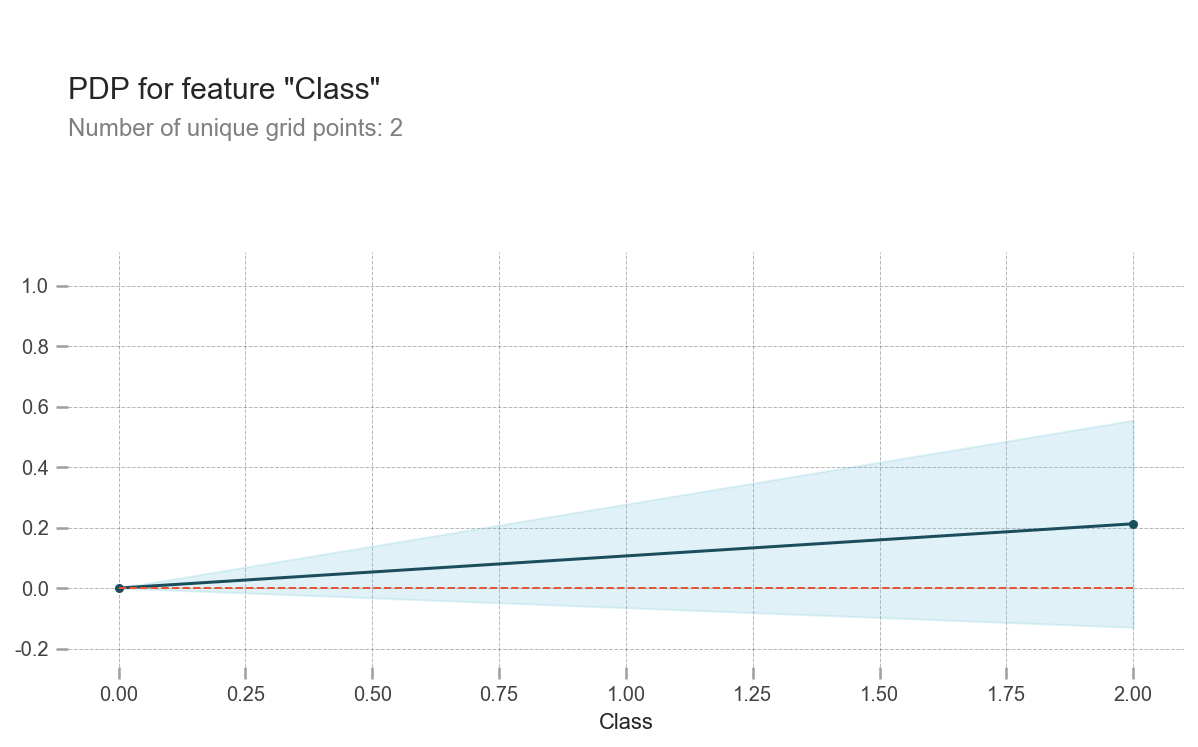

In [66]:
draw_pdp_plot('Class', X_val, model)

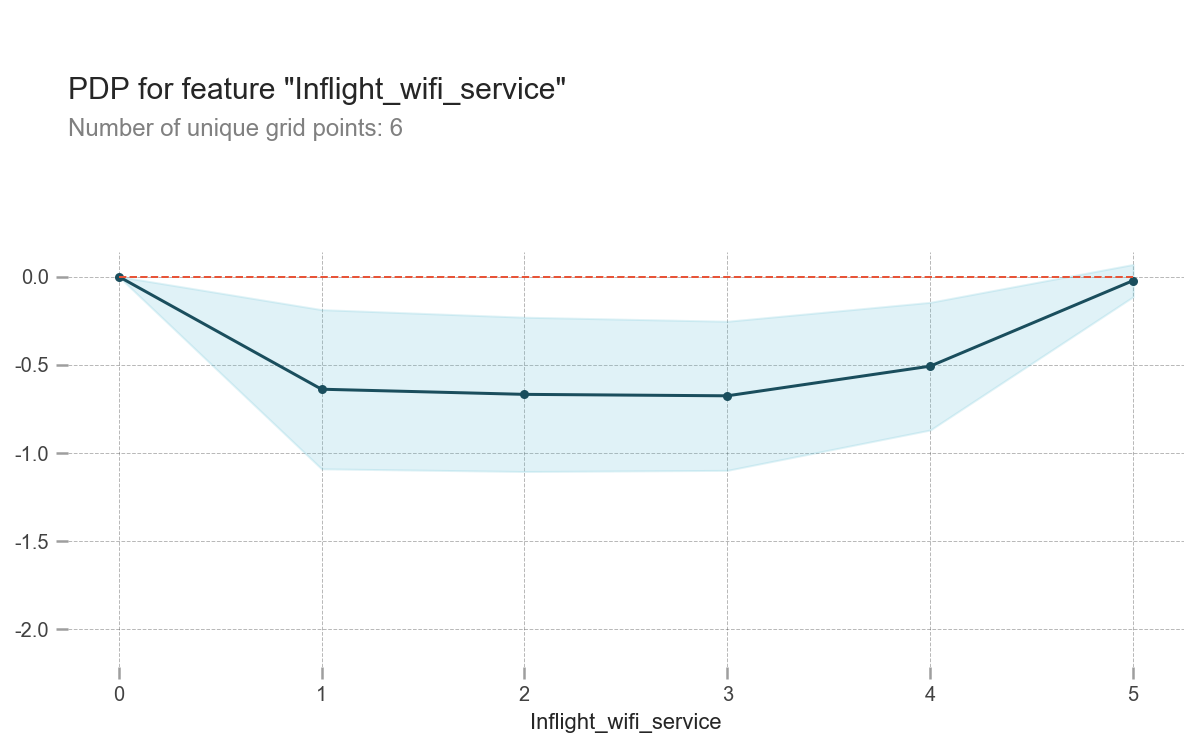

In [67]:
draw_pdp_plot('Inflight_wifi_service', X_val, model)

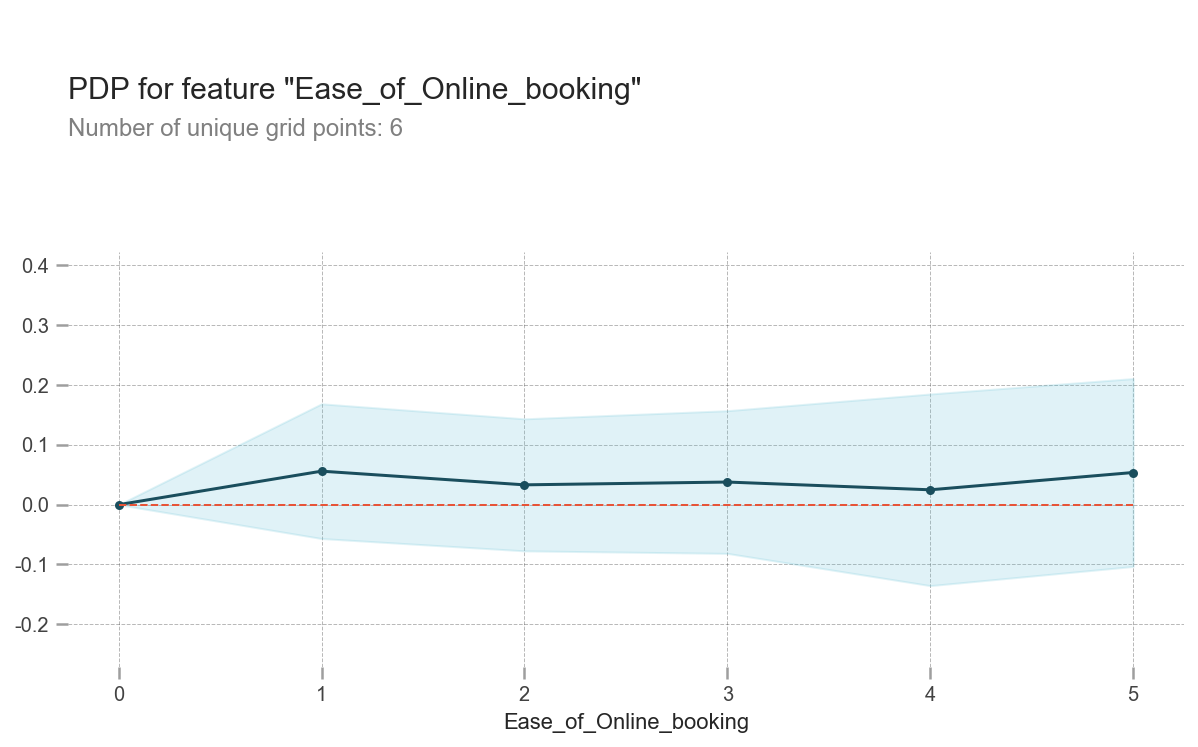

In [68]:
draw_pdp_plot('Ease_of_Online_booking', X_val, model)

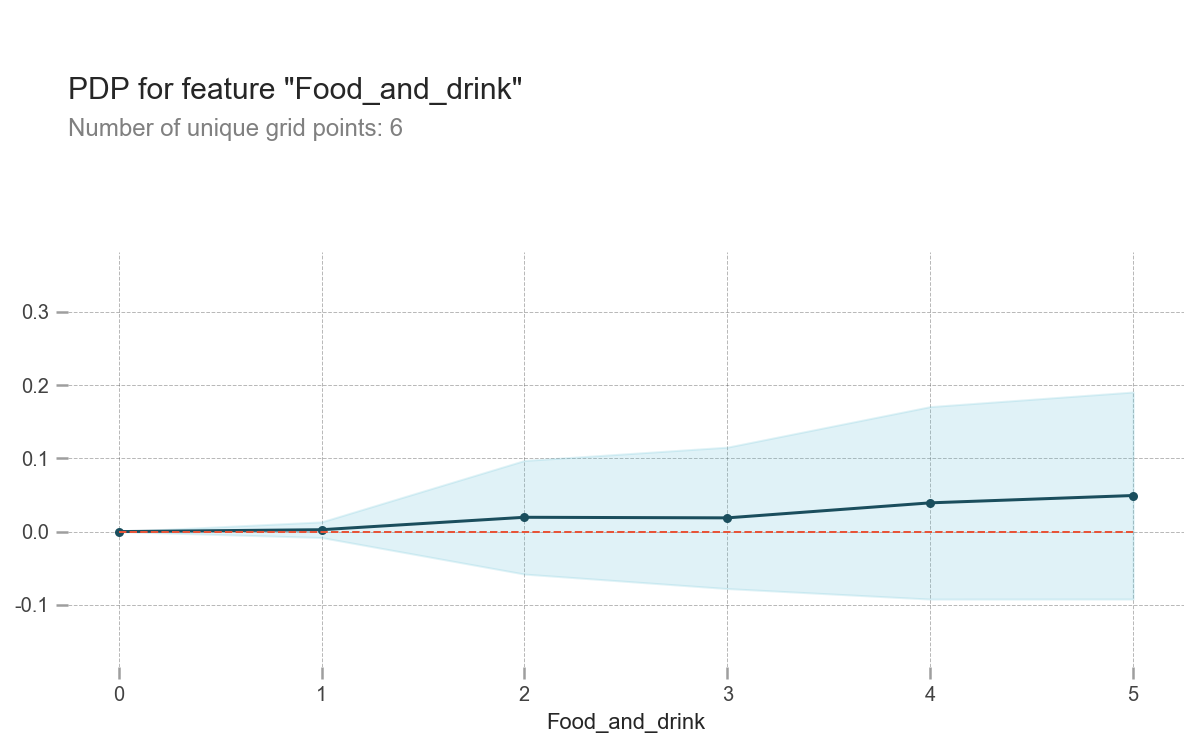

In [69]:
draw_pdp_plot('Food_and_drink', X_val, model)

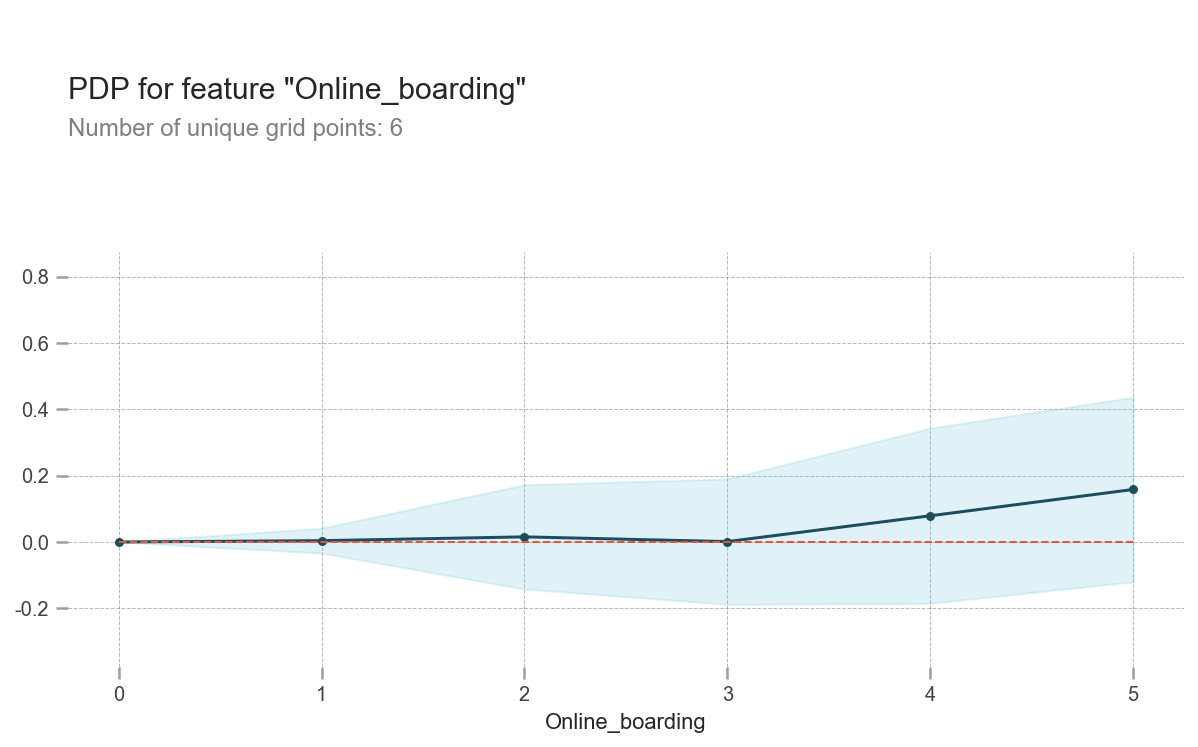

In [70]:
draw_pdp_plot('Online_boarding', X_val, model)

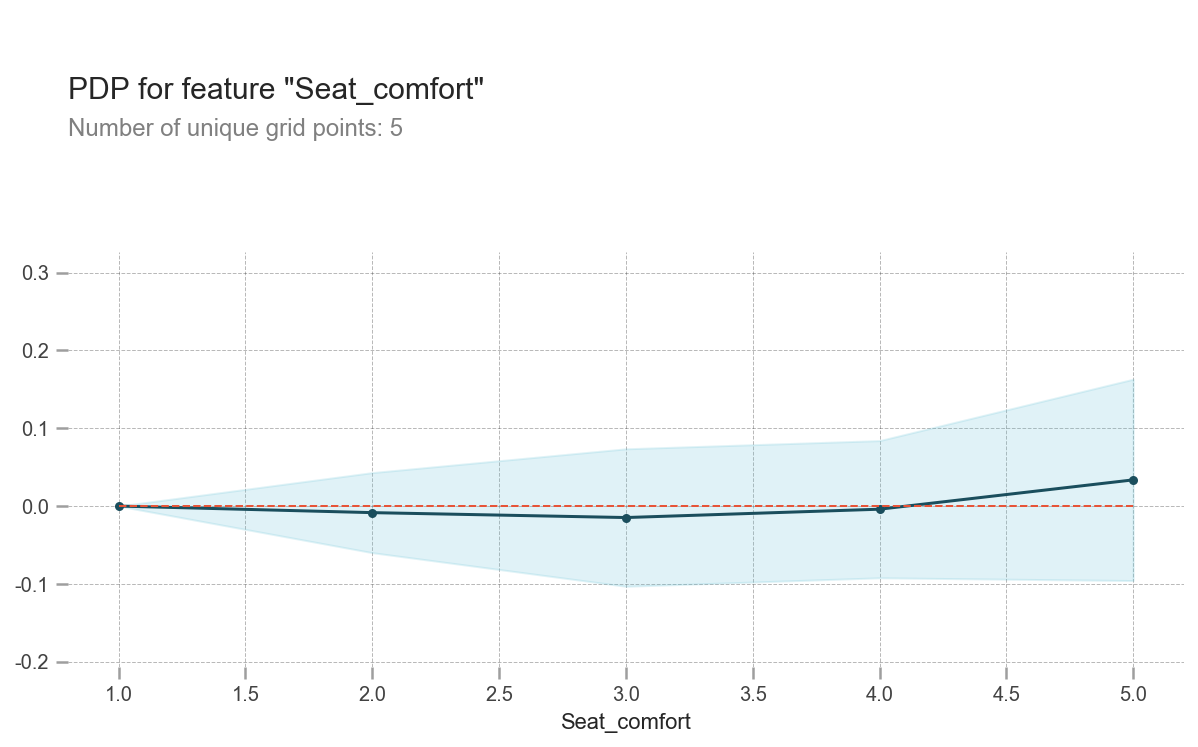

In [71]:
draw_pdp_plot('Seat_comfort', X_val, model)

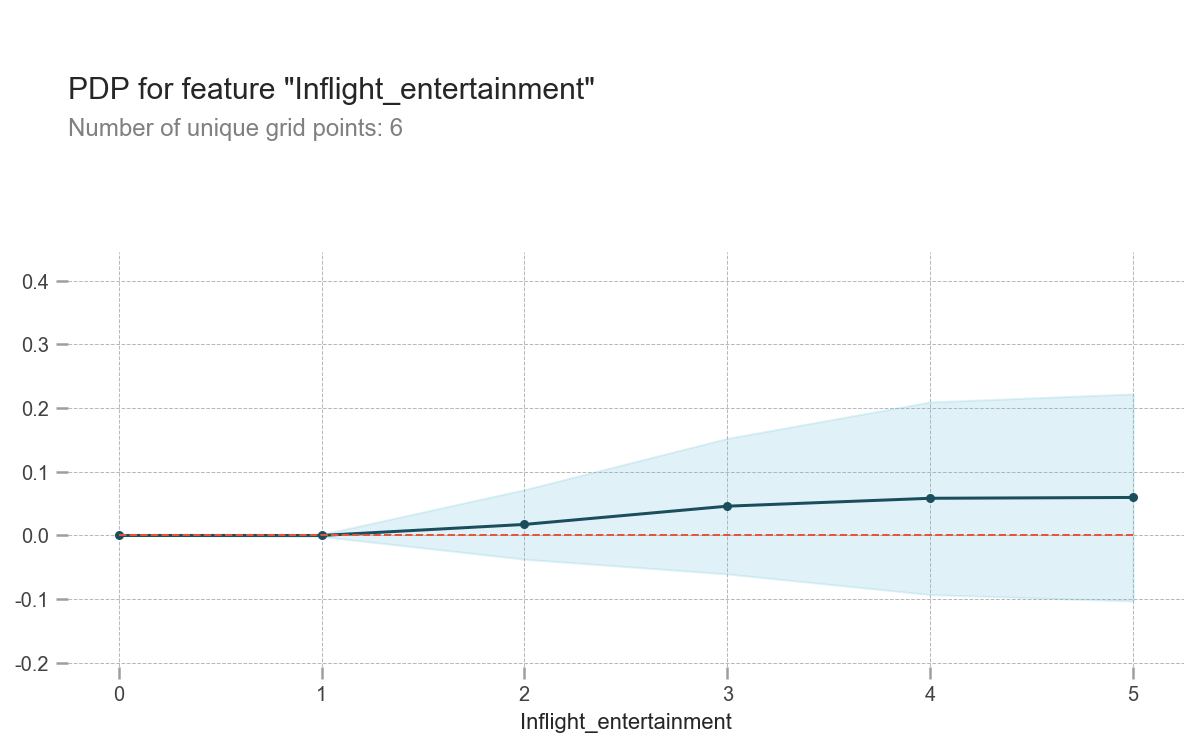

In [72]:
draw_pdp_plot('Inflight_entertainment', X_val, model)

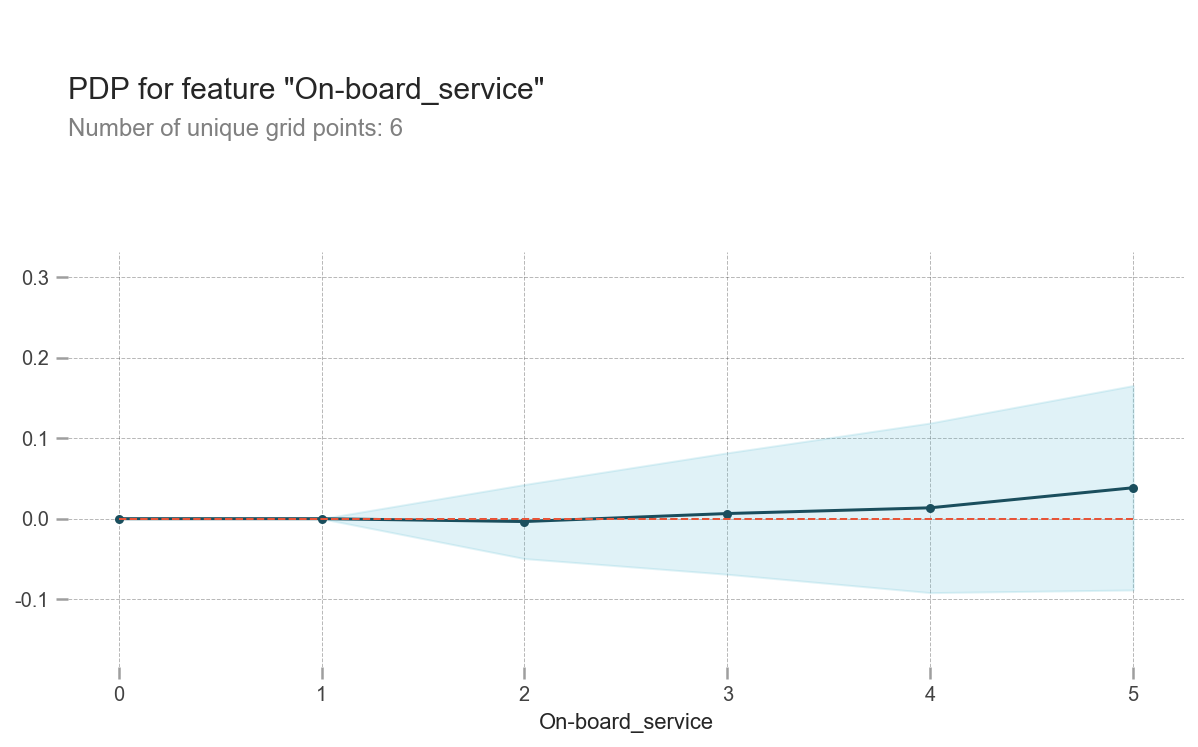

In [73]:
draw_pdp_plot('On-board_service', X_val, model)

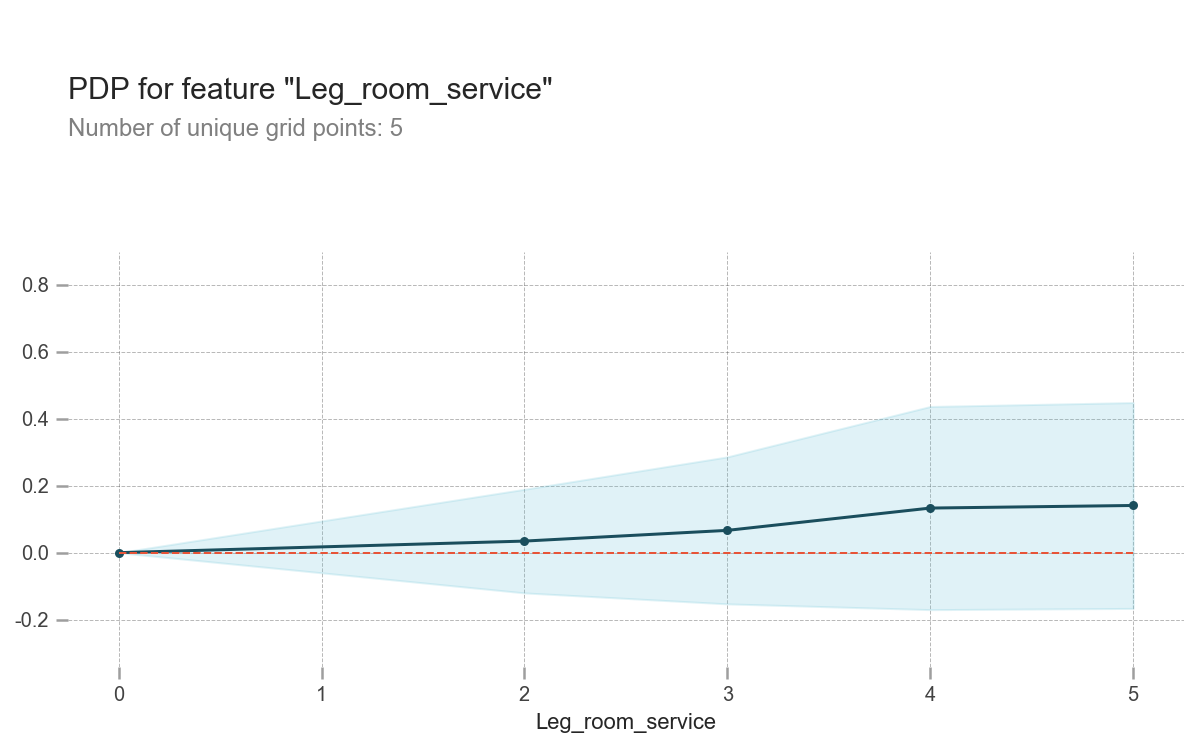

In [74]:
draw_pdp_plot('Leg_room_service', X_val, model)

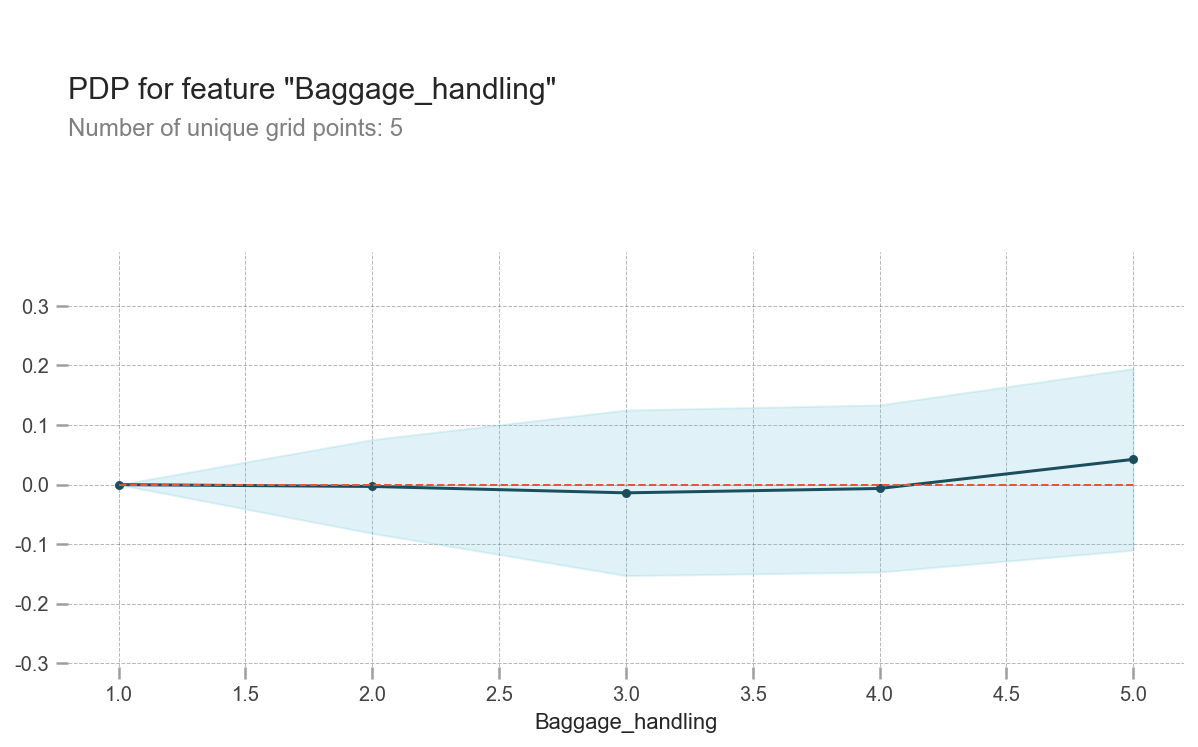

In [75]:
draw_pdp_plot('Baggage_handling', X_val, model)

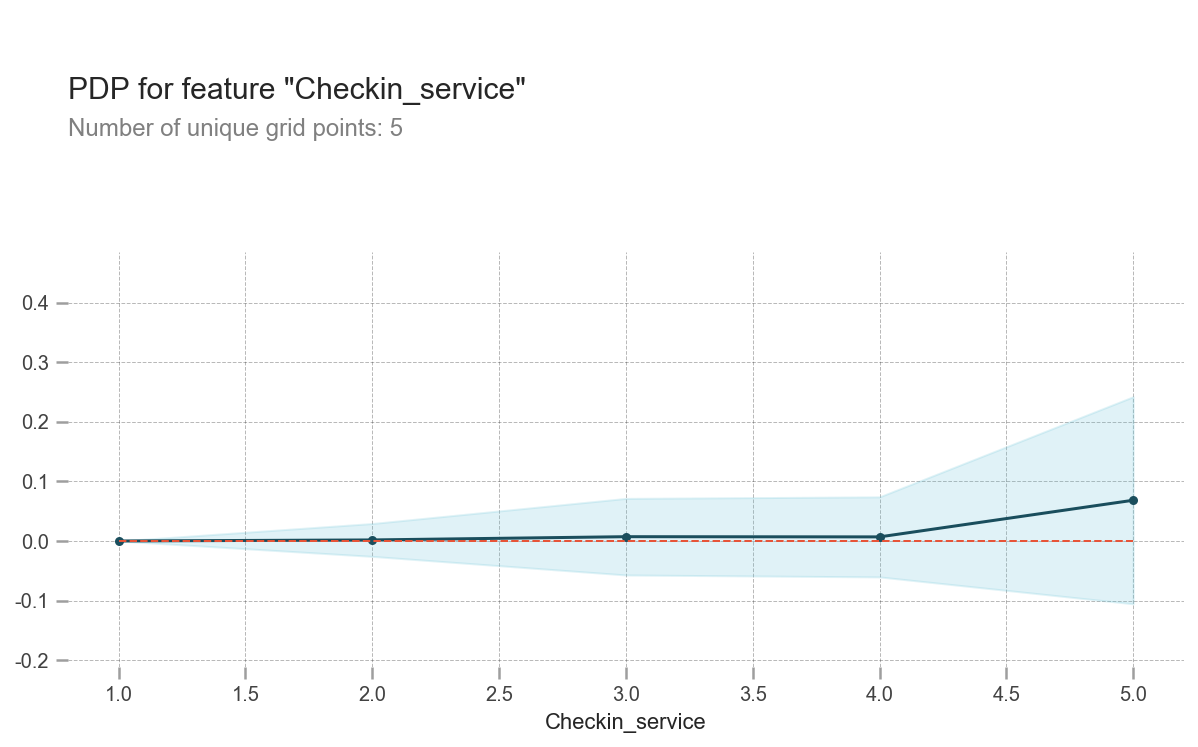

In [76]:
draw_pdp_plot('Checkin_service', X_val, model)

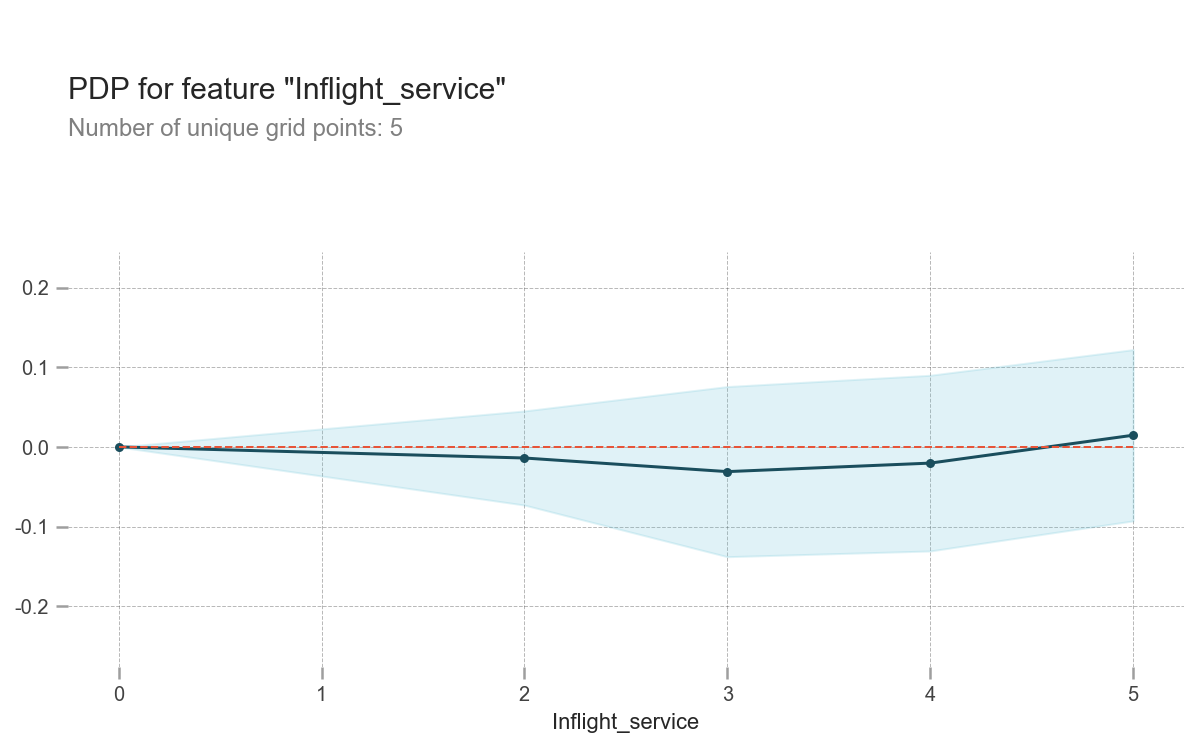

In [77]:
draw_pdp_plot('Inflight_service', X_val, model)

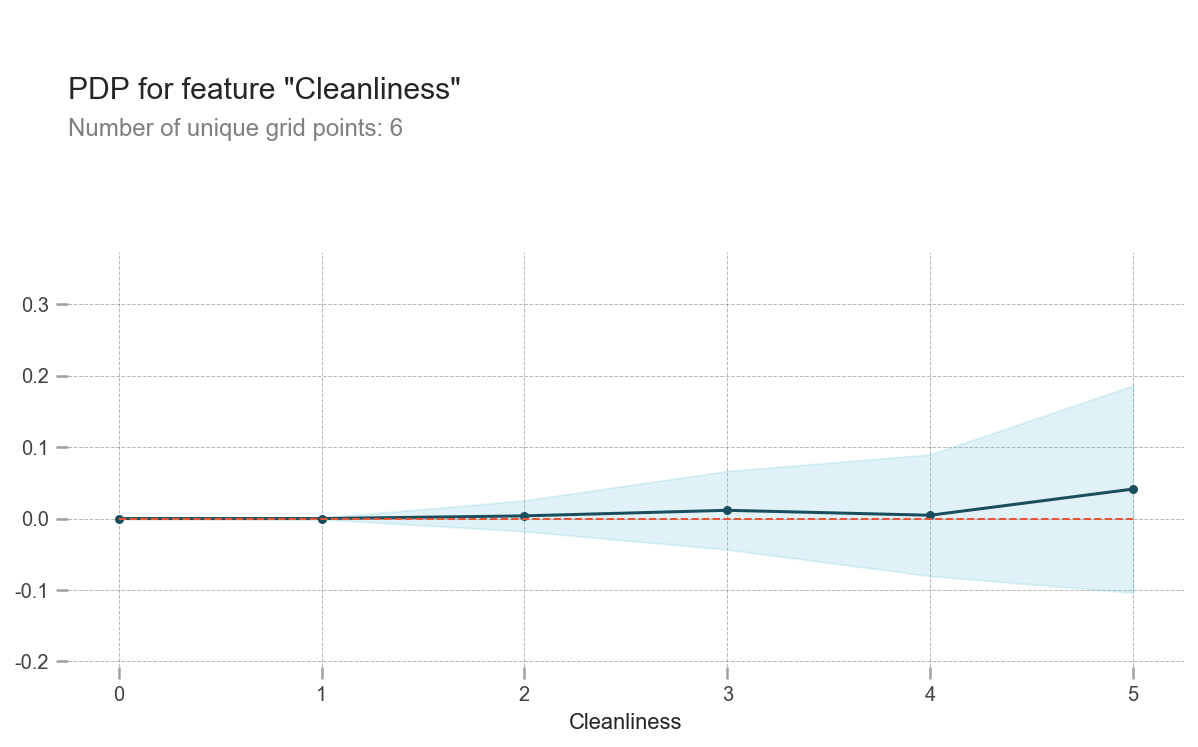

In [78]:
draw_pdp_plot('Cleanliness', X_val, model)

- PDP를 통한 분석 종합
 - 상관관계 큰 항목
   - Class, Leg-Room Service, Online 탑승수속, 기내 엔터테인먼트
 - 상관관계가 조금이라도 있는 항목
   - 식음료, 청결도, 탑승수속, 기내 WiFi 서비스, 좌석편안도, 체크인 서비스
 - 상관관계가 없는 항목
   - Online Booking의 편리함, 기내서비스
   
   
- 고객만족도를 높이기 위해 개선/발전 시켜야 할 항목
  - Online 탑승수속: 편리함을 위하여 사이트/앱의 불편한 요소를 찾고 개선
  - 기내 엔터테인먼트: 영화, 음악 등 다채롭고 최신의 즐길거리 확보에 신경을 써야 함
  - 식음료 서비스: 어떤 부분이 부족한지 확인하고, 납품업체 변경도 고려 해 보아야 함
  - 체크인, 탑승수속: 담당하는 직원의 교육을 통하여 프로세스 개선
  - 기내 WiFi 서비스: 비용이 문제라면 가격대 조정이 필요하거나 쿠폰등의 행사 필요   
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;속도/연결상황의 문제라면 기내 WiFi 기기 및 Internet 서비스 점검 및 교체 필요
  - 청결도: 아주 기본인 서비스이므로, 부족한 부분을 개선하기 위해 점검이 필요


## *9. 임의의 고객 만족도 확인 (test)*

## *Shap을 통한 분석*

- 임의의 고객 샘플 추출후 확인

In [79]:
# 임의의 샘플 추출

idx = np.random.choice(range(len(X_test)), 1)[0]
# idx = 9328

row = X_test.iloc[[idx]]
row_t = row.T
row_t.reset_index(inplace=True)   

In [80]:
print(f'만족 여부: {"만족" if y_test.iloc[idx] else "불만족"} , 만족할 확률: {np.round(model.predict_proba(row)[0][1] * 100, 2)}')

만족 여부: 불만족 , 만족할 확률: 0.11


In [81]:
print(f'Test Set의 {row.index[0]}번째 고객은 서비스에 대해 {"만족" if model.predict(row)[0] == 1 else "만족하지 못"} 하였습니다')

Test Set의 20654번째 고객은 서비스에 대해 만족하지 못 하였습니다


In [82]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit'
)

In [83]:
# Feature별 

disp = pd.DataFrame(shap_values[0], index=row.columns.values, columns=['Shap_values'])
disp.reset_index(inplace=True)
disp = pd.merge(disp, row_t)
disp.sort_values(by='Shap_values')

,index,Shap_values,20654
5,Online_boarding,-1.812903,2
1,Class,-1.594286,0
2,Inflight_wifi_service,-1.523480,2
0,Age,-1.169913,11
13,Cleanliness,-0.266163,4
3,Ease_of_Online_booking,-0.122028,2
6,Seat_comfort,-0.118693,3
11,Checkin_service,-0.108630,3
10,Baggage_handling,-0.054839,4
8,On-board_service,0.041187,4


- Shap으로 만족에 영향을 주는 요소와 불만족에 영향을 주는 요소 파악이 가능
 - Class, Leg_room_service 등이 좋은 인상을 주었음
 - Online_boarding, Inflight_wifi_service, Inflight_entertainment 등이 안 좋은 인상을 주었음

- 그러나, 위의 정보만으로 어떤 제안을 하였을 때, 만족할지 알기 어려움
- 어떻게 하면 쉽게 제안할 내용을 알 수 있을까????   
<span style="color:red">- 현 고객의 조건과 비슷하면서도 만족하는 조건을 자동으로 제안 해 줄 수 있을까?</span>    


## *10. 고객이 불만족일 경우 만족할 수 있도록 어떤 서비스를 보강해야 할까?*

## *고객만족을 위한 자동제안서비스*

- 아이디어
 - 모델에서 사용한 각 Feature의 Value와 Feature Name을 조합하여 문자열로 만듦
 - 만들어진 문자열을 TfidfVectorizer를 이용하여 분류
 - 만족하지 못한 고객의 조건과 Cosine 유사도가 비슷하고, 만족확률이 0.5에 가까운 정보를 추출
 - 고객의 조건과 다른 항목을 제안

In [84]:
# 추후 고객에게 제안 할 서비스 확인을 위한 Dataset
df_vector = X_test.copy()
# df_vector = pd.concat([X_train, X_val, X_test])
df_vector.reset_index(drop=True, inplace=True)

In [85]:
df_vector.shape

(25976, 14)

In [86]:
df_proba = model.predict_proba(df_vector)[:, 1]
df_predict = model.predict(df_vector)

In [87]:
df_vector['proba'] = df_proba
df_vector['predict'] = df_predict

In [88]:
# df_vector.drop(df_vector[df_vector['predict'] == 0].index, inplace=True)
df_vector.reset_index(drop=True, inplace=True)

In [89]:
df_vector.head()

,Age,Class,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,proba,predict
0,52,0,5,3,3,4,3,5,5,5,5,2,5,5,0.999585,1
1,36,2,1,3,5,4,5,4,4,4,4,3,4,5,0.998144,1
2,20,0,2,2,2,2,2,2,4,1,3,2,2,2,0.002502,0
3,44,2,0,0,3,4,4,1,1,1,1,3,1,4,0.999132,1
4,49,0,2,4,4,1,2,2,2,2,2,4,2,4,0.134365,0


In [90]:
def make_one_string(df, drop_features):
    df_tmp = df.drop(columns=drop_features)
    df_tmp.rename(columns = {'On-board_service':'On_board_service'}, inplace = True)
    
    d = pd.DataFrame({col: col + "_" + df_tmp[col].astype(str) for col in df_tmp.columns})
    
    df_one_string = pd.DataFrame()
    df_one_string['string'] = d['Class'] + ' ' + d['Inflight_wifi_service'] + ' ' \
                            + d['Ease_of_Online_booking'] + ' ' + d['Food_and_drink'] + ' ' \
                            + d['Online_boarding'] + ' ' + d['Seat_comfort'] + ' ' \
                            + d['Inflight_entertainment'] + ' ' + d['On_board_service'] + ' ' \
                            + d['Leg_room_service'] + ' ' + d['Baggage_handling'] + ' ' \
                            + d['Checkin_service'] + ' ' + d['Inflight_service'] + ' ' + d['Cleanliness']
    
    return df_one_string

In [91]:
drop_features = ['Age', 'proba', 'predict']
df_vector_data = make_one_string(df_vector, drop_features)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [93]:
def get_recomendation(df, cosine_sim, idx):
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    indices = [i[0] for i in sim_scores ]
    
    return indices[1:500]

In [94]:
from sklearn.metrics.pairwise import linear_kernel

tfidf_matrix = tfidf.fit_transform(df_vector_data['string'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(25976, 25976)

- tfidf.vocabulary_
 - baggage_handling_1, baggage_handling_2, 
 baggage_handling_3, baggage_handling_4, baggage_handling_5
 - checkin_service_1, checkin_service_2, 
 checkin_service_3, checkin_service_4, checkin_service_5
 - class_0, class_1, class_2
 - cleanliness_0, cleanliness_1, cleanliness_2, cleanliness_3, cleanliness_4, cleanliness_5
 - ease_of_online_booking_0, ease_of_online_booking_1, ease_of_online_booking_2,   
 ease_of_online_booking_3, ease_of_online_booking_4, ease_of_online_booking_5
 - food_and_drink_0, food_and_drink_1, food_and_drink_2, 
 food_and_drink_3, food_and_drink_4, food_and_drink_5
 - inflight_entertainment_0, inflight_entertainment_1, inflight_entertainment_2,
 inflight_entertainment_3, inflight_entertainment_4, inflight_entertainment_5
 - inflight_service_0, inflight_service_1, inflight_service_2, 
 inflight_service_3, inflight_service_4, inflight_service_5
 - inflight_wifi_service_0, inflight_wifi_service_1, inflight_wifi_service_2,
 inflight_wifi_service_3, inflight_wifi_service_4, inflight_wifi_service_5
 - leg_room_service_0, leg_room_service_1, leg_room_service_2,
 leg_room_service_3, leg_room_service_4, leg_room_service_5
 - on_board_service_0, on_board_service_1, on_board_service_2,
 on_board_service_3, on_board_service_4, on_board_service_5
 - online_boarding_0, online_boarding_1, online_boarding_2,
 online_boarding_3, online_boarding_4, online_boarding_5
 - seat_comfort_1, seat_comfort_2, seat_comfort_3, seat_comfort_4, seat_comfort_5


In [95]:
sorted(tfidf.vocabulary_)

['baggage_handling_1',
 'baggage_handling_2',
 'baggage_handling_3',
 'baggage_handling_4',
 'baggage_handling_5',
 'checkin_service_1',
 'checkin_service_2',
 'checkin_service_3',
 'checkin_service_4',
 'checkin_service_5',
 'class_0',
 'class_1',
 'class_2',
 'cleanliness_0',
 'cleanliness_1',
 'cleanliness_2',
 'cleanliness_3',
 'cleanliness_4',
 'cleanliness_5',
 'ease_of_online_booking_0',
 'ease_of_online_booking_1',
 'ease_of_online_booking_2',
 'ease_of_online_booking_3',
 'ease_of_online_booking_4',
 'ease_of_online_booking_5',
 'food_and_drink_0',
 'food_and_drink_1',
 'food_and_drink_2',
 'food_and_drink_3',
 'food_and_drink_4',
 'food_and_drink_5',
 'inflight_entertainment_0',
 'inflight_entertainment_1',
 'inflight_entertainment_2',
 'inflight_entertainment_3',
 'inflight_entertainment_4',
 'inflight_entertainment_5',
 'inflight_service_0',
 'inflight_service_1',
 'inflight_service_2',
 'inflight_service_3',
 'inflight_service_4',
 'inflight_service_5',
 'inflight_wifi_ser

In [111]:
# 임의의 샘플 추출

idx = np.random.choice(range(len(X_test)), 1)[0]

row = X_test.iloc[[idx]] 

pred = model.predict(row)[0]
proba = np.round(model.predict_proba(row)[0][1] * 100, 2)

print(f'{row.index[0]}번째 고객은 서비스에 대해 {"만족" if pred == 1 else "만족하지 못"}하였습니다')
print(f'만족 여부: {"만족" if pred else "불만족"} , 만족할 확률: {proba}')

#  Shap 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit'
)    

13324번째 고객은 서비스에 대해 만족하지 못하였습니다
만족 여부: 불만족 , 만족할 확률: 13.22


- 추천하는 제안
</br></br>
- 고객 정보

In [97]:
if pred == 0:
    drop_features = ['Age']
    test_vector = make_one_string(row, drop_features)
    
    indices = get_recomendation(df_vector_data['string'], cosine_sim, idx)
    
    df_scores = []
    
    for index in indices:
        if df_vector.iloc[[index]]['predict'].values[0] == 1:
            df_scores.append([index, df_vector.iloc[[index]]['proba'].values[0]])
            
    df_scores = sorted(df_scores, key=lambda x: x[1], reverse=False)
    
    index = df_scores[0][0]
    
    print('=' * 40)
    print('고객을 만족시키기 위하여 변경해야 할 항목')
    print('-' * 40)   
            
    if row['Class'].values[0] < df_vector.iloc[[index]]['Class'].values[0]:
        print(f'* Class: {row["Class"].values[0]}에서 {df_vector.iloc[[index]]["Class"].values[0]}로 상향')
    if row['Inflight_wifi_service'].values[0] < df_vector.iloc[[index]]['Inflight_wifi_service'].values[0]:
        print(f'* Inflight_wifi_service: {row["Class"].values[0]}에서 {df_vector.iloc[[index]]["Inflight_wifi_service"].values[0]}로 상향')
    if row['Ease_of_Online_booking'].values[0] < df_vector.iloc[[index]]['Ease_of_Online_booking'].values[0]:
        print(f'* Ease_of_Online_booking: {row["Ease_of_Online_booking"].values[0]}에서 {df_vector.iloc[[index]]["Ease_of_Online_booking"].values[0]}로 상향')
    if row['Food_and_drink'].values[0] < df_vector.iloc[[index]]['Food_and_drink'].values[0]:
        print(f'* Food_and_drink: {row["Food_and_drink"].values[0]}에서 {df_vector.iloc[[index]]["Food_and_drink"].values[0]}로 상향')
    if row['Online_boarding'].values[0] < df_vector.iloc[[index]]['Online_boarding'].values[0]:
        print(f'* Online_boarding: {row["Online_boarding"].values[0]}에서 {df_vector.iloc[[index]]["Online_boarding"].values[0]}로 상향')
    if row['Seat_comfort'].values[0] < df_vector.iloc[[index]]['Seat_comfort'].values[0]:
        print(f'* Seat_comfort: {row["Seat_comfort"].values[0]}에서 {df_vector.iloc[[index]]["Seat_comfort"].values[0]}로 상향')
    if row['Inflight_entertainment'].values[0] < df_vector.iloc[[index]]['Inflight_entertainment'].values[0]:
        print(f'* Inflight_entertainment: {row["Inflight_entertainment"].values[0]}에서 {df_vector.iloc[[index]]["Inflight_entertainment"].values[0]}로 상향')
    if row['On-board_service'].values[0] < df_vector.iloc[[index]]['On-board_service'].values[0]:
        print(f'* On-board_service: {row["On-board_service"].values[0]}에서 {df_vector.iloc[[index]]["On-board_service"].values[0]}로 상향')
    if row['Leg_room_service'].values[0] < df_vector.iloc[[index]]['Leg_room_service'].values[0]:
        print(f'* Leg_room_service: {row["Leg_room_service"].values[0]}에서 {df_vector.iloc[[index]]["Leg_room_service"].values[0]}로 상향')
    if row['Baggage_handling'].values[0] < df_vector.iloc[[index]]['Baggage_handling'].values[0]:
        print(f'* Baggage_handling: {row["Baggage_handling"].values[0]}에서 {df_vector.iloc[[index]]["Baggage_handling"].values[0]}로 상향')
    if row['Checkin_service'].values[0] < df_vector.iloc[[index]]['Checkin_service'].values[0]:
        print(f'* Checkin_service: {row["Checkin_service"].values[0]}에서 {df_vector.iloc[[index]]["Checkin_service"].values[0]}로 상향')
    if row['Inflight_service'].values[0] < df_vector.iloc[[index]]['Inflight_service'].values[0]:
        print(f'* Inflight_service: {row["Inflight_service"].values[0]}에서 {df_vector.iloc[[index]]["Inflight_service"].values[0]}로 상향')        
    if row['Cleanliness'].values[0] < df_vector.iloc[[index]]['Cleanliness'].values[0]:
        print(f'* Cleanliness: {row["Cleanliness"].values[0]}에서 {df_vector.iloc[[index]]["Cleanliness"].values[0]}로 상향')
     
    print('-' * 40)       
    print(f'현재 상태 만족할 확률: {proba}%')
    print(f'상향 조정시 만족 확률: {np.round(df_vector.iloc[[index]]["proba"].values[0] * 100, 2)}%')     

    print('=' * 40)
    print(row.T)

고객을 만족시키기 위하여 변경해야 할 항목
----------------------------------------
* Class: 0에서 2로 상향
* Inflight_entertainment: 3에서 4로 상향
* Baggage_handling: 2에서 5로 상향
* Checkin_service: 1에서 3로 상향
* Inflight_service: 2에서 5로 상향
----------------------------------------
현재 상태 만족할 확률: 1.08%
상향 조정시 만족 확률: 50.62%
                        9500
Age                       29
Class                      0
Inflight_wifi_service      3
Ease_of_Online_booking     3
Food_and_drink             3
Online_boarding            3
Seat_comfort               3
Inflight_entertainment     3
On-board_service           3
Leg_room_service           5
Baggage_handling           2
Checkin_service            1
Inflight_service           2
Cleanliness                3
